### __Abalone Data Set__

The data we'll be using comes from the [UCI Machine Learning Repository](http://archive.ics.uci.edu/ml/datasets/Abalone), and contains the following attributes about abalone:

- Sex
- Length
- Diameter
- Height
- Whole weight
- Shucked weight
- Viscera weight
- Shell weight

### __Context__
The age of abalone is determined by cutting the shell through the cone, staining it, and counting the number of rings through a microscope -- a boring and time-consuming task. Other measurements, which are easier to obtain, are used to predict the age. Further information, such as weather patterns and location (hence food availability) may be required to solve the problem.

 ### __Importing Libraries__

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [2]:
import tensorflow as tf
from tensorflow.keras import regularizers
from tensorflow import keras
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier

In [2]:
from matplotlib import rcParams
rcParams['figure.figsize'] = 15, 5
sns.set_style('darkgrid')

In [3]:
abalone_df = pd.read_csv("abalone.csv")
abalone_df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


# Data Exploration

In [5]:
abalone_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


- There are 4177 rows and 9 columns. The columns include 1 categorical predictor (sex), 7 continuous predictors (Length, Diameter, Height, Whole weight, Shucked weight, Viscera weight, Shell weight), and an integer response variable (number of rings)

In [6]:
abalone_df.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


- Start exploring the data by plotting some histograms of different quantities. Once we do that, we'll get a better idea of how they are distributed amongst the population of abalones sampled for this data set.

<Axes: xlabel='Rings', ylabel='Count'>

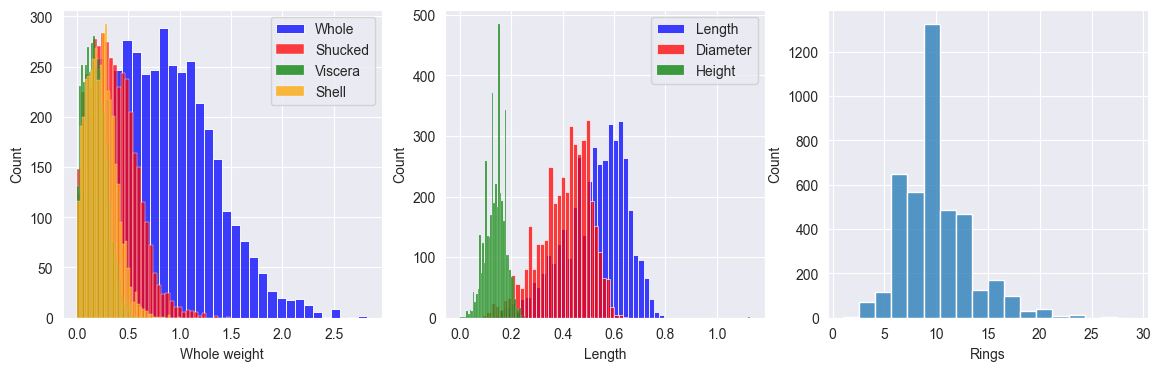

In [7]:
fig = plt.figure(figsize=(14,4))
ax1 = fig.add_subplot(131)
ax2 = fig.add_subplot(132)
ax3 = fig.add_subplot(133)

sns.histplot(abalone_df['Whole weight'],   label='Whole',   ax=ax1, color='blue')
sns.histplot(abalone_df['Shucked weight'], label='Shucked', ax=ax1, color='red')
sns.histplot(abalone_df['Viscera weight'], label='Viscera', ax=ax1, color='green')
sns.histplot(abalone_df['Shell weight'],   label='Shell',   ax=ax1, color='orange')
ax1.legend()

sns.histplot(abalone_df['Length'],   label='Length', ax=ax2, color='blue')
sns.histplot(abalone_df['Diameter'], label='Diameter', ax=ax2, color='red')
sns.histplot(abalone_df['Height'],   label='Height', ax=ax2, color='green')
ax2.legend()

sns.histplot(abalone_df['Rings'], bins=18, ax=ax3)

In [8]:
abalone_df[abalone_df['Height'] == 0]

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
1257,I,0.430,0.34,0.0,0.428,0.2065,0.0860,0.1150,8
3996,I,0.315,0.23,0.0,0.134,0.0575,0.0285,0.3505,6


- Notice that there are 2 instance with 'Height' = 0 so we decided to drop those 2 rows

In [4]:
abalone_df = abalone_df[abalone_df['Height'] > 0]
abalone_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4175 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4175 non-null   object 
 1   Length          4175 non-null   float64
 2   Diameter        4175 non-null   float64
 3   Height          4175 non-null   float64
 4   Whole weight    4175 non-null   float64
 5   Shucked weight  4175 non-null   float64
 6   Viscera weight  4175 non-null   float64
 7   Shell weight    4175 non-null   float64
 8   Rings           4175 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 326.2+ KB


<Axes: >

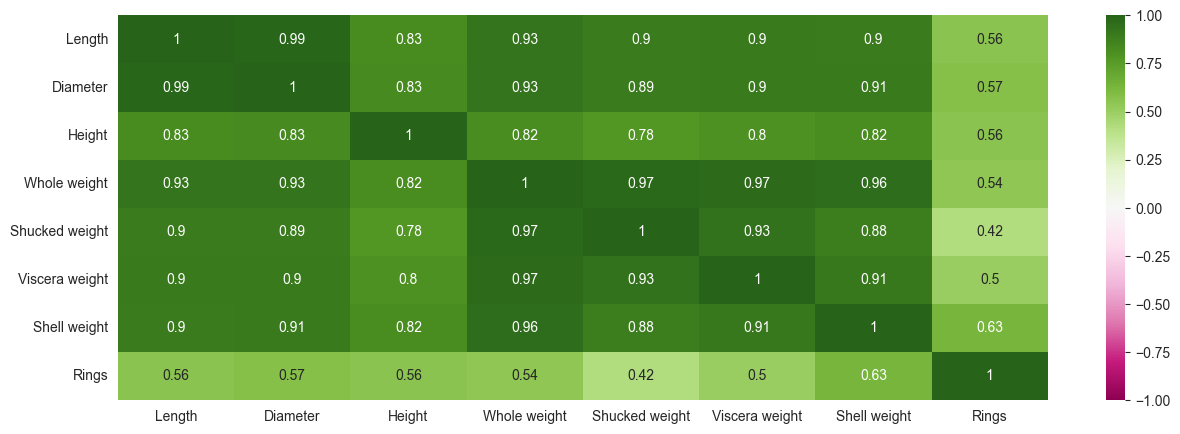

In [10]:
correlationMatrix = abalone_df.drop(['Sex'], axis = 1).corr()
sns.heatmap(correlationMatrix, cmap="PiYG", annot=True, vmin=-1, vmax=1)

- We noticed that there is multiple high independent attribute correlations (0.93, 0.83, etc). On the other hand, the correlation between the independent attributes and the dependent variable is average at (0.57, 0.63, etc). Thus, we will need to apply some method to eliminate correlation in independent attibutes in our models.

<Axes: xlabel='Rings', ylabel='count'>

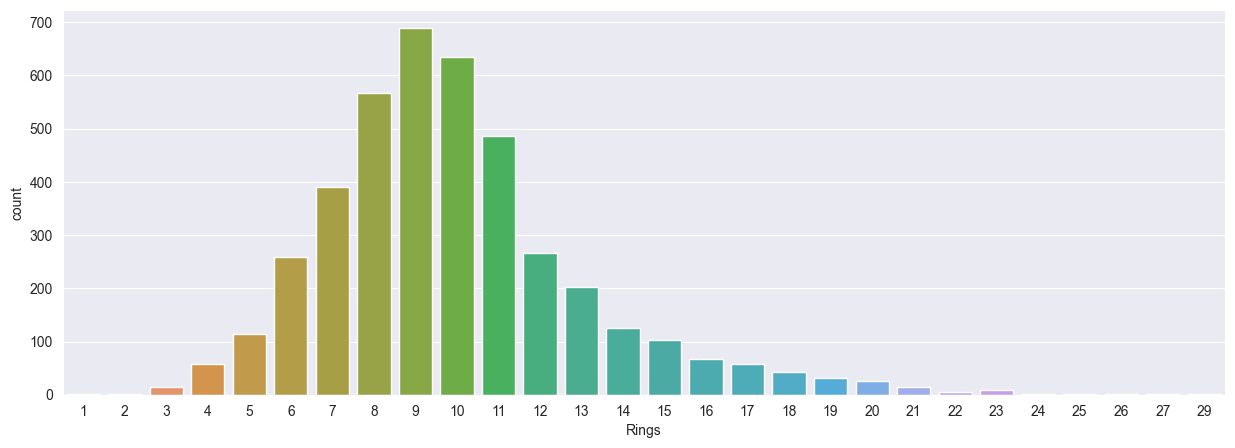

In [11]:
sns.countplot(x=abalone_df["Rings"])

<Axes: xlabel='Rings', ylabel='count'>

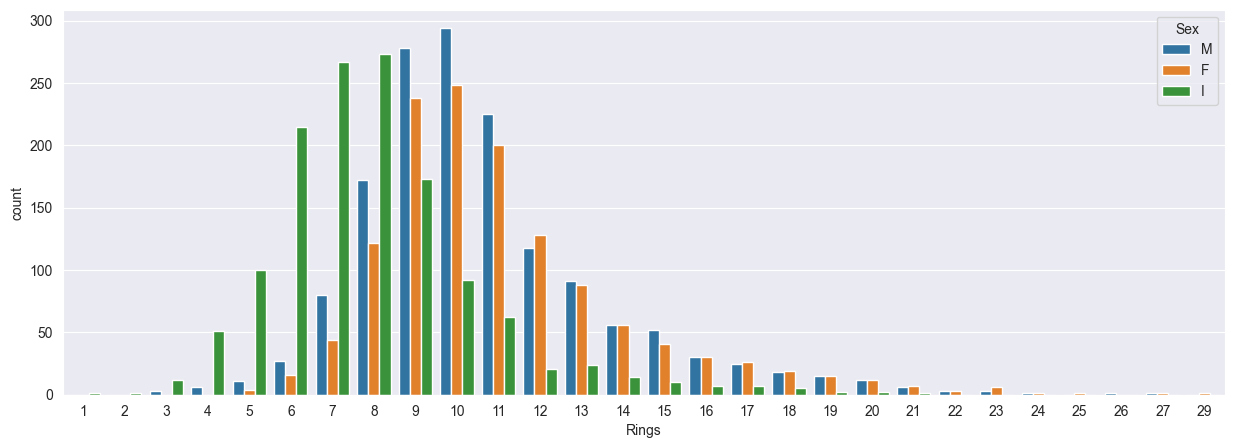

In [12]:
sns.countplot(x=abalone_df["Rings"], hue=abalone_df["Sex"])

<Axes: xlabel='Sex', ylabel='Rings'>

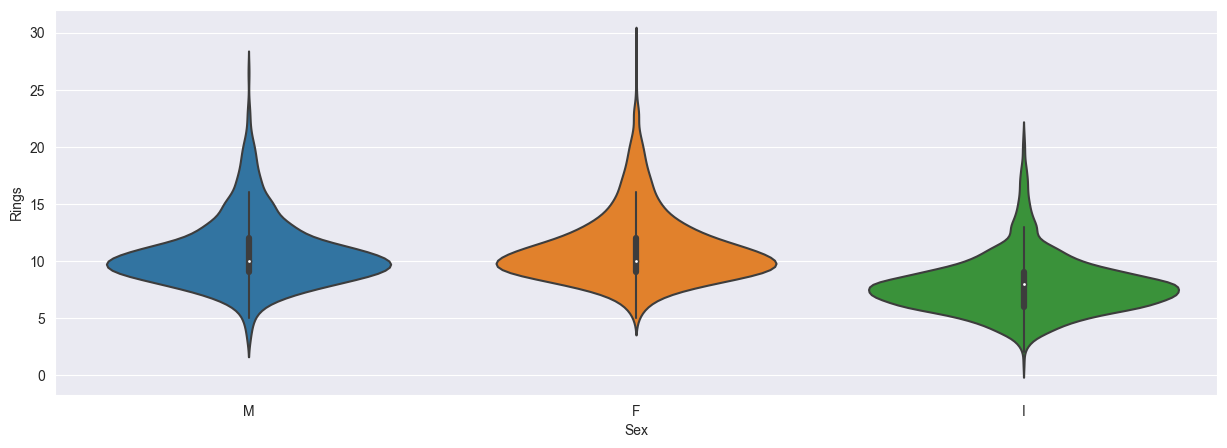

In [13]:
sns.violinplot(x='Sex', y='Rings', data=abalone_df)

# Data Processing - Handling Outliers

Text(0.5, 1.0, 'Abalone Outliers Plot')

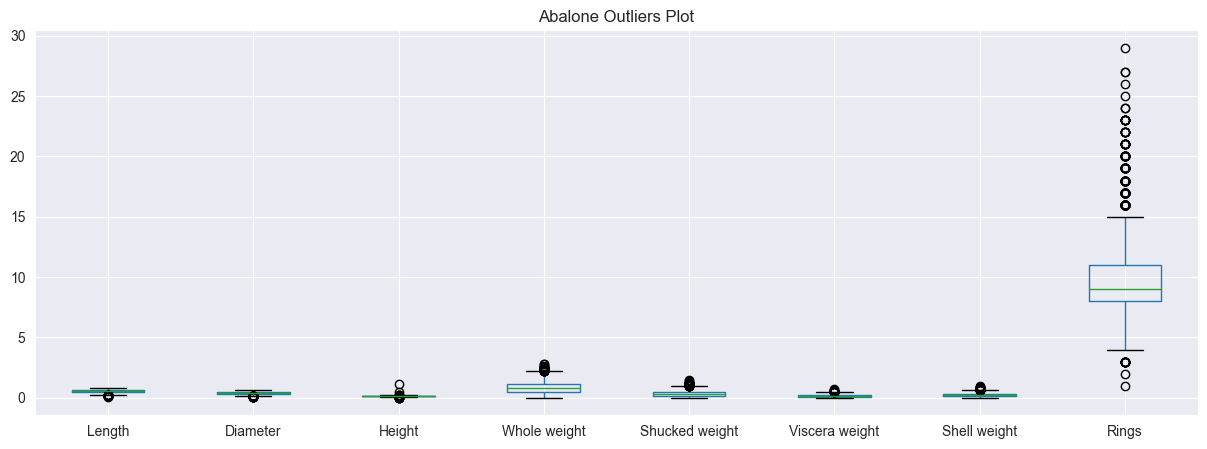

In [14]:
abalone_df.boxplot()
plt.title("Abalone Outliers Plot")

Text(0.5, 1.0, 'Viscera weight vs Rings')

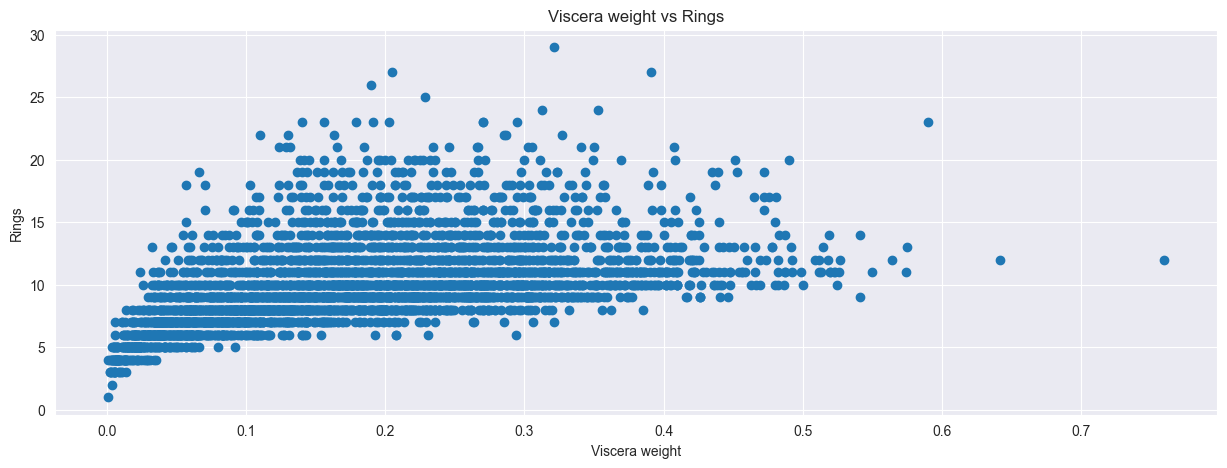

In [15]:
plt.scatter(x = abalone_df["Viscera weight"], y = abalone_df['Rings'],)
plt.grid(True)
plt.xlabel("Viscera weight")
plt.ylabel("Rings")
plt.title("Viscera weight vs Rings")

In [16]:
# Outliers removal
# abalone_df.drop(abalone_df[(abalone_df['Viscera weight']> 0.5) & (abalone_df['Rings'] < 20)].index, inplace=True)
# abalone_df.drop(abalone_df[(abalone_df['Viscera weight']< 0.5) & (abalone_df['Rings'] > 25)].index, inplace=True)

Text(0.5, 1.0, 'Shell weight vs Rings')

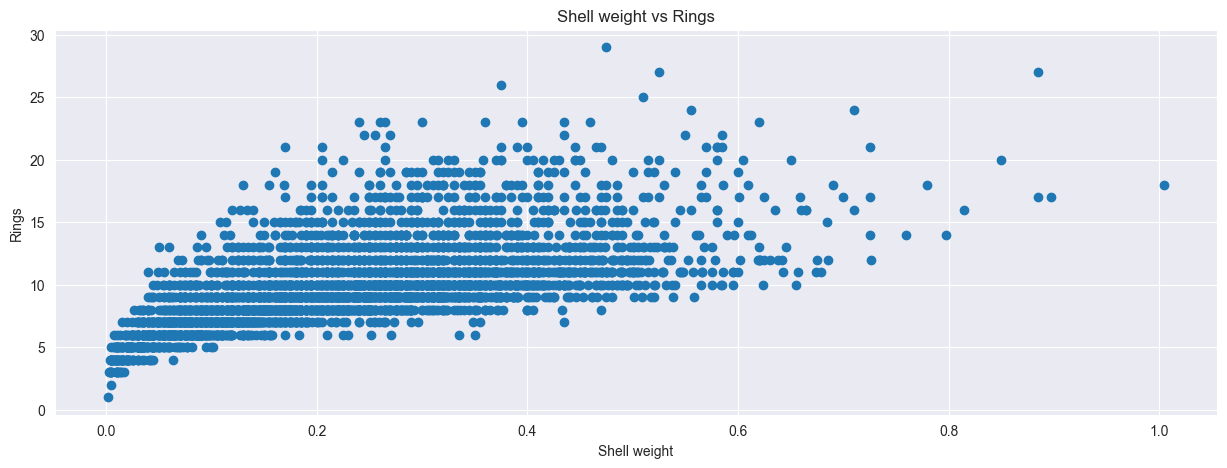

In [17]:
plt.scatter(x = abalone_df['Shell weight'], y = abalone_df['Rings'],)
plt.grid(True)
plt.xlabel("Shell weight")
plt.ylabel("Rings")
plt.title("Shell weight vs Rings")

In [5]:
abalone_df.drop(abalone_df[(abalone_df['Shell weight']> 0.6) & (abalone_df['Rings'] < 25)].index, inplace=True)
abalone_df.drop(abalone_df[(abalone_df['Shell weight']< 0.8) & (abalone_df['Rings'] > 25)].index, inplace=True)

Text(0.5, 1.0, 'Shucked weight vs Rings')

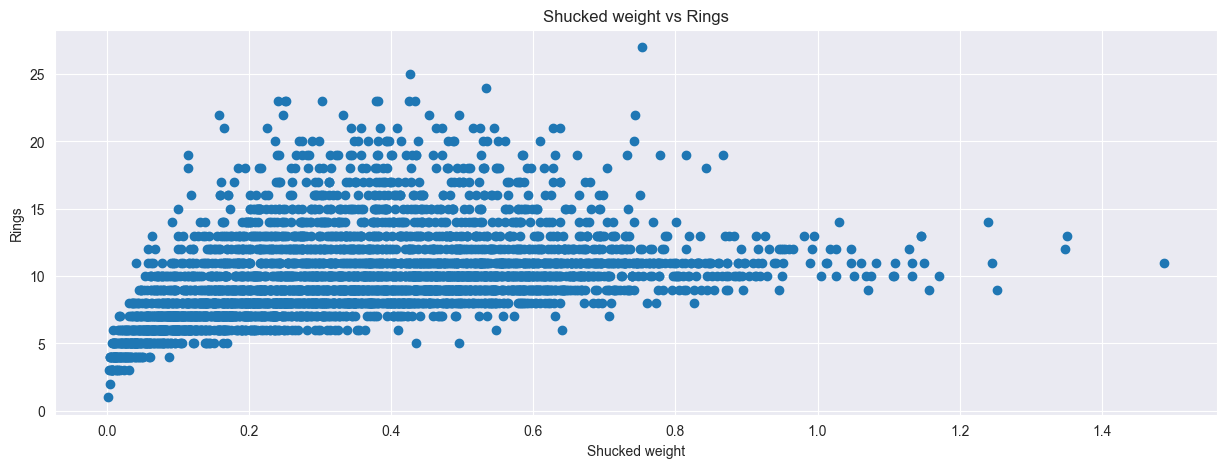

In [19]:
plt.scatter(x = abalone_df['Shucked weight'], y = abalone_df['Rings'],)
plt.grid(True)
plt.xlabel("Shucked weight")
plt.ylabel("Rings")
plt.title("Shucked weight vs Rings")

In [20]:
# abalone_df.drop(abalone_df[(abalone_df['Shucked weight'] >= 1 ) & (abalone_df['Rings'] < 20)].index, inplace=True)
# abalone_df.drop(abalone_df[(abalone_df['Shucked weight'] < 1) & (abalone_df['Rings'] > 20)].index, inplace=True)

Text(0.5, 1.0, 'Whole weight vs Rings')

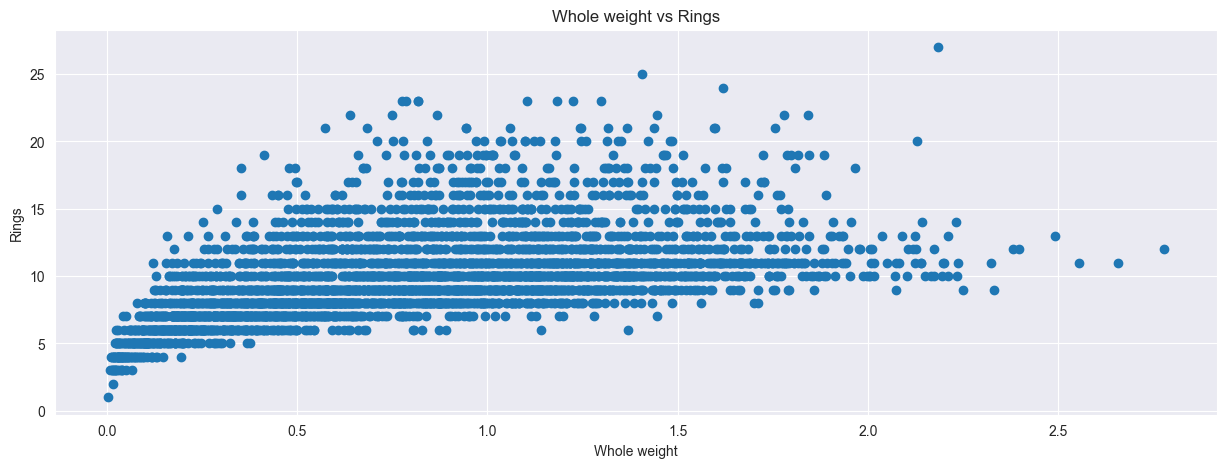

In [21]:
plt.scatter(x = abalone_df["Whole weight"], y = abalone_df['Rings'],)
plt.grid(True)
plt.xlabel("Whole weight")
plt.ylabel("Rings")
plt.title("Whole weight vs Rings")

In [22]:
# Outliers removal
# abalone_df.drop(abalone_df[(abalone_df['Whole weight'] >= 2.5 ) & (abalone_df['Rings'] < 25)].index, inplace=True)
# abalone_df.drop(abalone_df[(abalone_df['Whole weight'] < 2.5) & (abalone_df['Rings'] > 25)].index, inplace=True)

Text(0.5, 1.0, 'Diameter vs Rings')

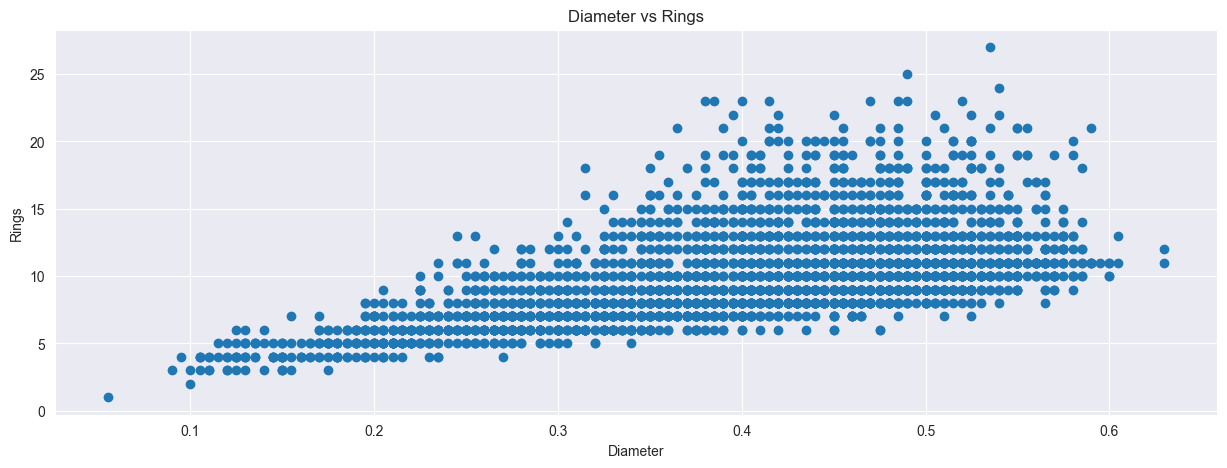

In [23]:
plt.scatter(x = abalone_df["Diameter"], y = abalone_df["Rings"],)
plt.grid(True)
plt.xlabel("Diameter")
plt.ylabel("Rings")
plt.title("Diameter vs Rings")

In [6]:
abalone_df.drop(abalone_df[(abalone_df['Diameter']<0.1) & (abalone_df['Rings'] < 5)].index, inplace=True)
abalone_df.drop(abalone_df[(abalone_df['Diameter']<0.6) & (abalone_df['Rings'] > 25)].index, inplace=True)
abalone_df.drop(abalone_df[(abalone_df['Diameter']>=0.6) & (abalone_df['Rings']< 25)].index, inplace=True)

Text(0.5, 1.0, 'Height vs Rings')

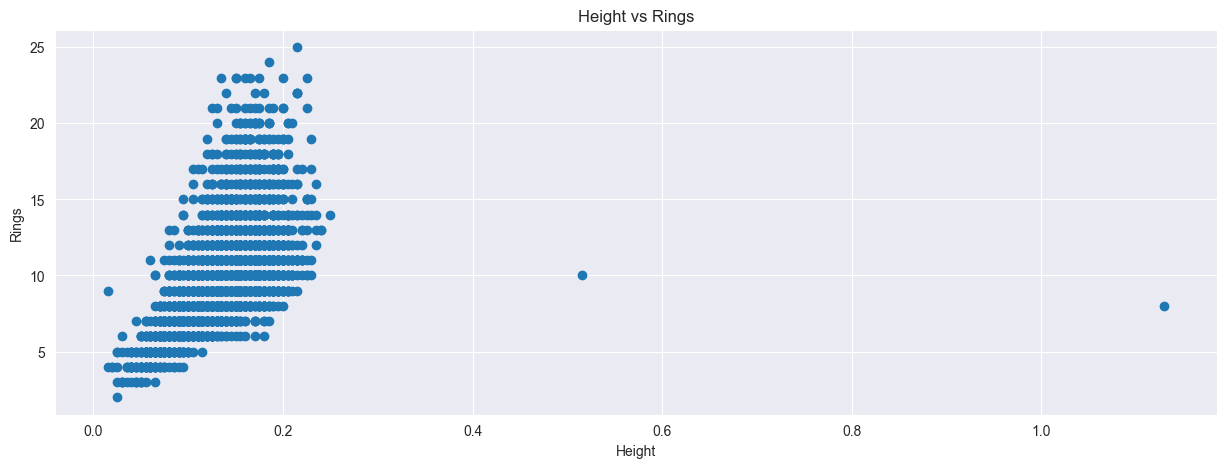

In [25]:
plt.scatter(x = abalone_df["Height"], y = abalone_df['Rings'],)
plt.grid(True)
plt.xlabel("Height")
plt.ylabel("Rings")
plt.title("Height vs Rings")

In [26]:
# abalone_df.drop(abalone_df[(abalone_df['Height']>0.4) & (abalone_df['Rings'] < 15)].index, inplace=True)
# abalone_df.drop(abalone_df[(abalone_df['Height']<0.4) & (abalone_df['Rings'] > 25)].index, inplace=True)

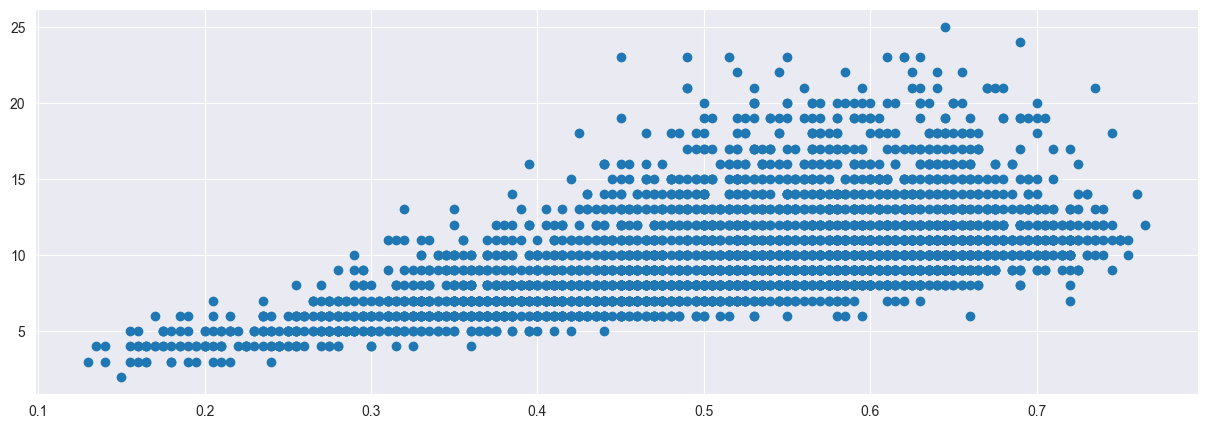

In [27]:
plt.scatter(x = abalone_df["Length"], y = abalone_df['Rings'],)
plt.grid(True)

In [28]:
#Final dataset after removing outliers
abalone_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4111 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4111 non-null   object 
 1   Length          4111 non-null   float64
 2   Diameter        4111 non-null   float64
 3   Height          4111 non-null   float64
 4   Whole weight    4111 non-null   float64
 5   Shucked weight  4111 non-null   float64
 6   Viscera weight  4111 non-null   float64
 7   Shell weight    4111 non-null   float64
 8   Rings           4111 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 321.2+ KB


- Eventhough Random Forest is not sensitive to outliers trimming outliers could be conductive to the success of the project. "Shell weight" and "Diameter" are the most correlated with "Rings" so I decided to only trim their outliers since it yeilds highest accuracy score (for Random Forest) if I do so. 

# Data Preprocessing - Data Preparation

In [7]:
abalone_df = pd.get_dummies(abalone_df)

In [8]:
# X = abalone_df.drop('Rings', axis = 1)
# Y = abalone_df['Rings']
X = abalone_df.loc[:, abalone_df.columns != 'Rings']
Y = abalone_df.loc[:, 'Rings'].values

In [9]:
from sklearn.feature_selection import SelectKBest

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

selectkBest = SelectKBest()
X_KBest = selectkBest.fit_transform(X, Y)

X_KBest = pd.DataFrame(data=X_scaled, columns=X.columns)

X_train, X_test, Y_train, Y_test = train_test_split(X_KBest, Y, test_size = 0.2, random_state=42)

# Decision Tree

In [32]:
from sklearn.tree import DecisionTreeClassifier

# instantiate the DecisionTreeClassifier model with criterion gini index
clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)

# fit the model
clf_gini.fit(X_train, Y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [33]:
# predict the test set results with criterion gini index
y_pred_gini = clf_gini.predict(X_test)

In [34]:
y_pred_train_gini = clf_gini.predict(X_train)
print('Training set score: {:.4f}'.format(clf_gini.score(X_train, Y_train)))
print('Test set score: {:.4f}'.format(clf_gini.score(X_test, Y_test)))

Training set score: 0.2765
Test set score: 0.2321


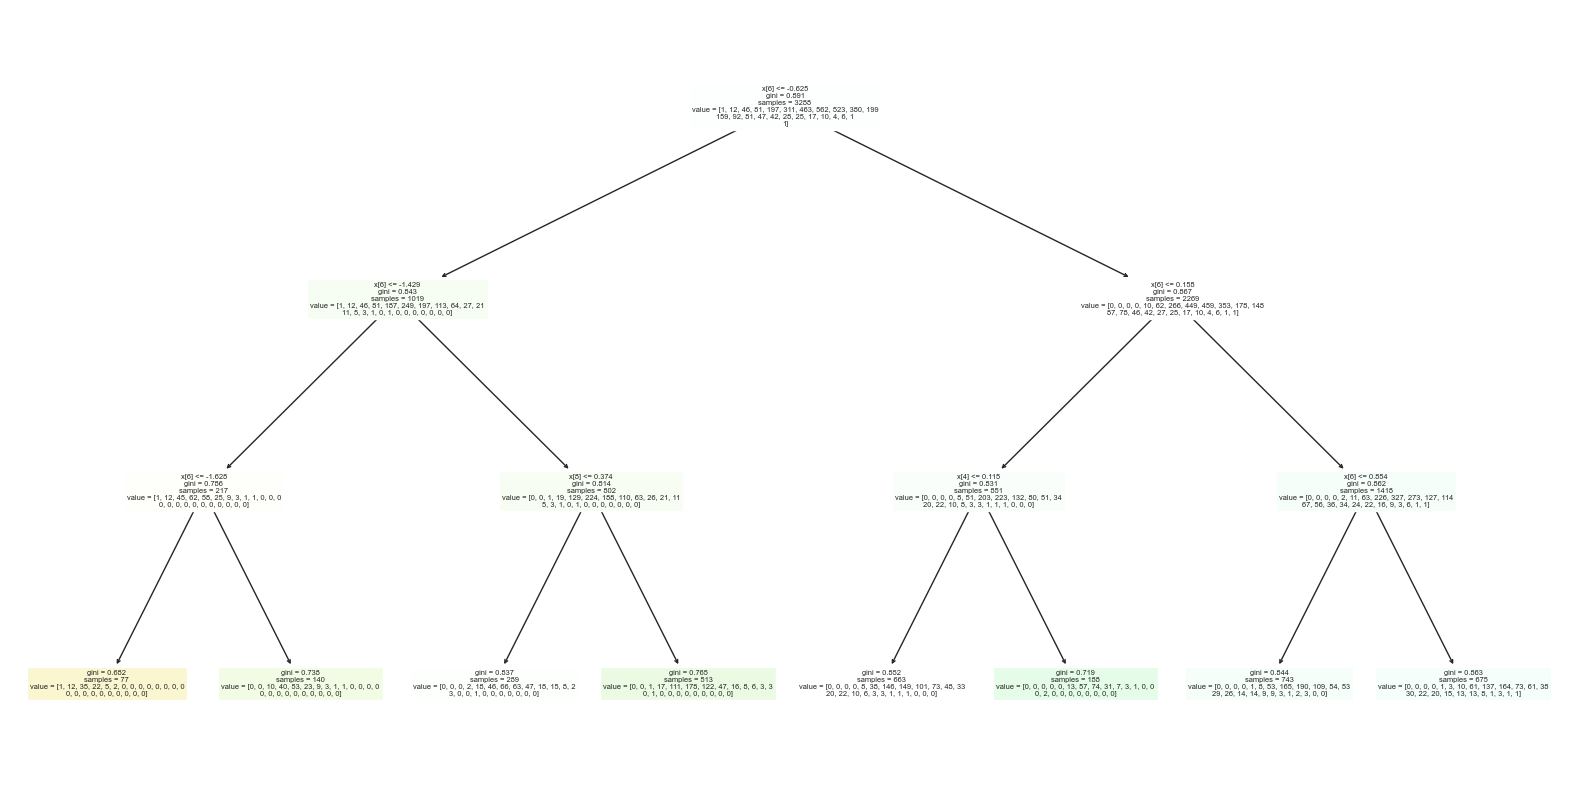

In [35]:
from sklearn import tree

plt.figure(figsize=(20, 10))
tree.plot_tree(clf_gini, filled=True) 
plt.show()

- The training set samples is correctly around 27.65% of the time. The model was able to capture some patterns in the training data, but it may not have captured all of the underlying relationships between the features and the target variable. The test set score of 0.2321 indicates that the model's performance on new, unseen data is worse than its performance on the training set. It may be overfitting to the training data and not generalizing well to new data. The model may be too complex and may have learned to fit to the noise in the training data rather than the underlying patterns that generalize to new data.

# Model Creation - Random Forest

In [10]:
rfc = RandomForestClassifier(n_estimators=1000, criterion="gini", min_samples_leaf=5, max_leaf_nodes=5)
rfc.fit(X_train, Y_train)

RandomForestClassifier(max_leaf_nodes=5, min_samples_leaf=5, n_estimators=1000)

In [11]:
rfc_pred = rfc.predict(X_train)
print('Model train accuracy score: {0:0.4f}'.format(accuracy_score(Y_train, rfc_pred)))

Model train accuracy score: 0.2825


In [12]:
rfc_pred = rfc.predict(X_test)
print('Model test accuracy score 1: {0:0.4f}'.format(accuracy_score(Y_test, rfc_pred)))

Model test accuracy score 1: 0.2673


In [13]:
rfc_pred = rfc.predict(X_test)
print('Model test accuracy score 2: {0:0.4f}'.format(accuracy_score(Y_test, rfc_pred)))

Model test accuracy score 2: 0.2673


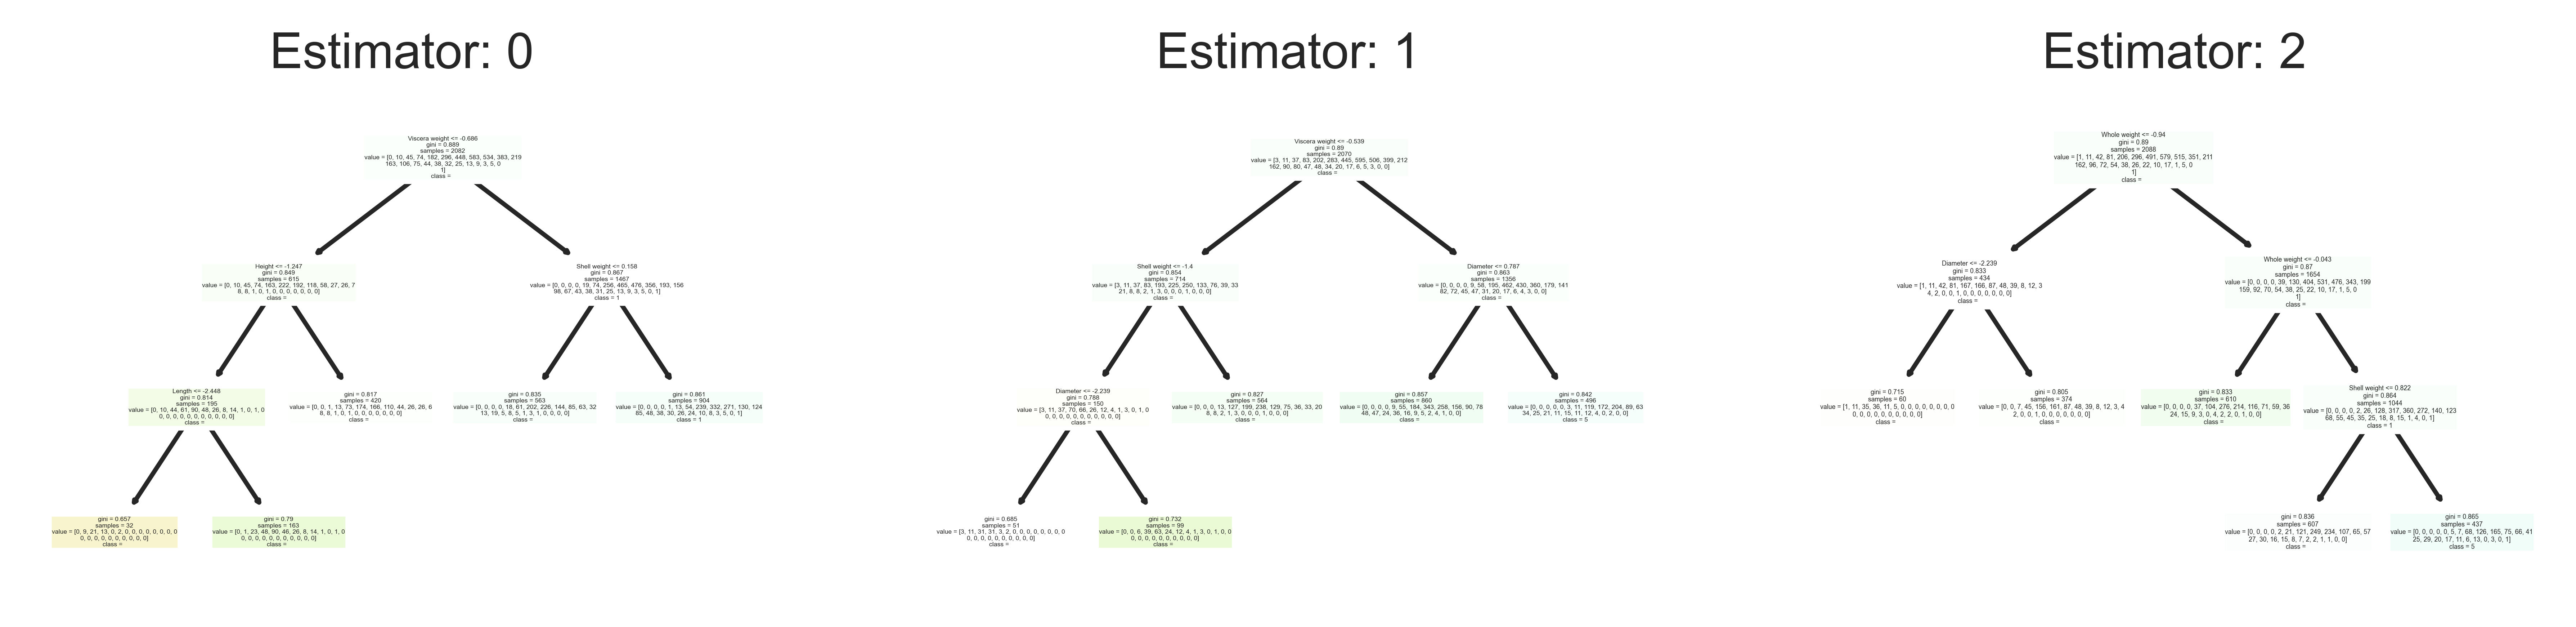

In [14]:
from sklearn.tree import export_graphviz
from sklearn import tree
y=1
fn=abalone_df.columns
cn=abalone_df['Rings']
fig, axes = plt.subplots(nrows = 1,ncols = 3,figsize = (10,2), dpi=900)
for index in range(0, 3):
    tree.plot_tree(rfc.estimators_[index],
                   feature_names = fn, 
                   class_names=str(cn),
                   filled = True,
                   ax = axes[index])
    axes[index].set_title('Estimator: ' + str(index), fontsize = 11)
fig.savefig('rf_5trees.png')

# Model Creation - Neural Network

In [40]:
NN_model = tf.keras.models.Sequential([
  tf.keras.layers.Dense(60, input_shape=(10,), activation='relu', kernel_regularizer=regularizers.l2(0.01)),
  tf.keras.layers.Dense(38, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
  tf.keras.layers.Dense(30, activation = 'softmax')
])

In [41]:
NN_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
NN_model.fit(X_train, Y_train, epochs=100, verbose = 1)

Epoch 1/100
103/103 [==============================] - 0s 451us/step - loss: 3.2861 - accuracy: 0.1983
Epoch 2/100
103/103 [==============================] - 0s 442us/step - loss: 2.6310 - accuracy: 0.2427
Epoch 3/100
103/103 [==============================] - 0s 442us/step - loss: 2.4385 - accuracy: 0.2631
Epoch 4/100
103/103 [==============================] - 0s 442us/step - loss: 2.3357 - accuracy: 0.2631
Epoch 5/100
103/103 [==============================] - 0s 432us/step - loss: 2.2709 - accuracy: 0.2722
Epoch 6/100
103/103 [==============================] - 0s 442us/step - loss: 2.2203 - accuracy: 0.2707
Epoch 7/100
103/103 [==============================] - 0s 432us/step - loss: 2.1830 - accuracy: 0.2722
Epoch 8/100
103/103 [==============================] - 0s 442us/step - loss: 2.1532 - accuracy: 0.2746
Epoch 9/100
103/103 [==============================] - 0s 432us/step - loss: 2.1279 - accuracy: 0.2749
Epoch 10/100
103/103 [==============================] - 0s 432us/step - l

103/103 [==============================] - 0s 451us/step - loss: 1.9478 - accuracy: 0.2926
Epoch 80/100
103/103 [==============================] - 0s 451us/step - loss: 1.9494 - accuracy: 0.2877
Epoch 81/100
103/103 [==============================] - 0s 442us/step - loss: 1.9504 - accuracy: 0.2856
Epoch 82/100
103/103 [==============================] - 0s 442us/step - loss: 1.9455 - accuracy: 0.2883
Epoch 83/100
103/103 [==============================] - 0s 451us/step - loss: 1.9472 - accuracy: 0.2920
Epoch 84/100
103/103 [==============================] - 0s 442us/step - loss: 1.9491 - accuracy: 0.2917
Epoch 85/100
103/103 [==============================] - 0s 442us/step - loss: 1.9461 - accuracy: 0.2880
Epoch 86/100
103/103 [==============================] - 0s 442us/step - loss: 1.9449 - accuracy: 0.2901
Epoch 87/100
103/103 [==============================] - 0s 442us/step - loss: 1.9462 - accuracy: 0.2935
Epoch 88/100
103/103 [==============================] - 0s 432us/step - loss:

In [42]:
loss, accuracy = NN_model.evaluate(X_test, Y_test)

# Print the evaluation results
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

26/26 [==============================] - 0s 440us/step - loss: 2.0455 - accuracy: 0.2552
Test Loss: 2.0455
Test Accuracy: 0.2552


In [43]:
################################################# NN MODEL IMPROVEMENT ######################################################

In [44]:
#Improve NN model using grid search

def create_NN_model(optimizer, activation1, activation2, epochs):
    NN_model = tf.keras.models.Sequential([
      tf.keras.layers.Dense(60, input_shape=(10,), activation=activation1, kernel_regularizer=regularizers.l2(0.01)),
      tf.keras.layers.Dense(38, activation=activation2, kernel_regularizer=regularizers.l2(0.01)),
      tf.keras.layers.Dense(30, activation = 'softmax')
    ])
    
    NN_model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return NN_model

param_grid = {
    'optimizer': ['adam', 'sgd', 'adagrad'],
    'epochs': [50, 100, 200],
    'activation1' : ['relu', 'tanh'],
    'activation2' : ['relu', 'tanh']
}


In [45]:
new_NN_model = KerasClassifier(build_fn=create_NN_model)
grid = GridSearchCV(estimator=new_NN_model, param_grid=param_grid, cv=3)

C:\Users\Phuong Hoang Dinh\AppData\Local\Temp\ipykernel_29576\3301868366.py:1: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  new_NN_model = KerasClassifier(build_fn=create_NN_model)


In [46]:
grid_result = grid.fit(X_train, Y_train)

# Print the best hyperparameters and the corresponding accuracy
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Epoch 1/50
69/69 [==============================] - 0s 515us/step - loss: 3.4348 - accuracy: 0.1756
Epoch 2/50
69/69 [==============================] - 0s 559us/step - loss: 2.8086 - accuracy: 0.2149
Epoch 3/50
69/69 [==============================] - 0s 486us/step - loss: 2.5691 - accuracy: 0.2473
Epoch 4/50
69/69 [==============================] - 0s 486us/step - loss: 2.4400 - accuracy: 0.2509
Epoch 5/50
69/69 [==============================] - 0s 589us/step - loss: 2.3576 - accuracy: 0.2568
Epoch 6/50
69/69 [==============================] - 0s 545us/step - loss: 2.2984 - accuracy: 0.2673
Epoch 7/50
69/69 [==============================] - 0s 471us/step - loss: 2.2539 - accuracy: 0.2619
Epoch 8/50
69/69 [==============================] - 0s 486us/step - loss: 2.2178 - accuracy: 0.2682
Epoch 9/50
69/69 [==============================] - 0s 486us/step - loss: 2.1856 - accuracy: 0.2714
Epoch 10/50
69/69 [==============================] - 0s 500us/step - loss: 2.1623 - accuracy: 0.2733

69/69 [==============================] - 0s 442us/step - loss: 2.0229 - accuracy: 0.2906
Epoch 32/50
69/69 [==============================] - 0s 486us/step - loss: 2.0151 - accuracy: 0.2911
Epoch 33/50
69/69 [==============================] - 0s 456us/step - loss: 2.0156 - accuracy: 0.2815
Epoch 34/50
69/69 [==============================] - 0s 456us/step - loss: 2.0101 - accuracy: 0.2847
Epoch 35/50
69/69 [==============================] - 0s 456us/step - loss: 2.0128 - accuracy: 0.2847
Epoch 36/50
69/69 [==============================] - 0s 471us/step - loss: 2.0082 - accuracy: 0.2851
Epoch 37/50
69/69 [==============================] - 0s 456us/step - loss: 2.0093 - accuracy: 0.2906
Epoch 38/50
69/69 [==============================] - 0s 456us/step - loss: 2.0045 - accuracy: 0.2911
Epoch 39/50
69/69 [==============================] - 0s 456us/step - loss: 2.0110 - accuracy: 0.2860
Epoch 40/50
69/69 [==============================] - 0s 442us/step - loss: 2.0044 - accuracy: 0.2901
Ep

69/69 [==============================] - 0s 412us/step - loss: 2.7821 - accuracy: 0.2587
Epoch 11/50
69/69 [==============================] - 0s 412us/step - loss: 2.7480 - accuracy: 0.2632
Epoch 12/50
69/69 [==============================] - 0s 397us/step - loss: 2.7169 - accuracy: 0.2623
Epoch 13/50
69/69 [==============================] - 0s 412us/step - loss: 2.6887 - accuracy: 0.2578
Epoch 14/50
69/69 [==============================] - 0s 412us/step - loss: 2.6631 - accuracy: 0.2687
Epoch 15/50
69/69 [==============================] - 0s 427us/step - loss: 2.6399 - accuracy: 0.2632
Epoch 16/50
69/69 [==============================] - 0s 412us/step - loss: 2.6186 - accuracy: 0.2724
Epoch 17/50
69/69 [==============================] - 0s 412us/step - loss: 2.5988 - accuracy: 0.2682
Epoch 18/50
69/69 [==============================] - 0s 412us/step - loss: 2.5797 - accuracy: 0.2678
Epoch 19/50
69/69 [==============================] - 0s 412us/step - loss: 2.5625 - accuracy: 0.2701
Ep

69/69 [==============================] - 0s 427us/step - loss: 2.3658 - accuracy: 0.2710
Epoch 41/50
69/69 [==============================] - 0s 397us/step - loss: 2.3574 - accuracy: 0.2687
Epoch 42/50
69/69 [==============================] - 0s 427us/step - loss: 2.3511 - accuracy: 0.2687
Epoch 43/50
69/69 [==============================] - 0s 412us/step - loss: 2.3433 - accuracy: 0.2728
Epoch 44/50
69/69 [==============================] - 0s 427us/step - loss: 2.3365 - accuracy: 0.2746
Epoch 45/50
69/69 [==============================] - 0s 412us/step - loss: 2.3298 - accuracy: 0.2746
Epoch 46/50
69/69 [==============================] - 0s 427us/step - loss: 2.3233 - accuracy: 0.2737
Epoch 47/50
69/69 [==============================] - 0s 427us/step - loss: 2.3166 - accuracy: 0.2719
Epoch 48/50
69/69 [==============================] - 0s 412us/step - loss: 2.3100 - accuracy: 0.2797
Epoch 49/50
69/69 [==============================] - 0s 412us/step - loss: 2.3040 - accuracy: 0.2774
Ep

69/69 [==============================] - 0s 427us/step - loss: 3.4254 - accuracy: 0.2185
Epoch 20/50
69/69 [==============================] - 0s 442us/step - loss: 3.4024 - accuracy: 0.2235
Epoch 21/50
69/69 [==============================] - 0s 427us/step - loss: 3.3803 - accuracy: 0.2167
Epoch 22/50
69/69 [==============================] - 0s 427us/step - loss: 3.3588 - accuracy: 0.2099
Epoch 23/50
69/69 [==============================] - 0s 442us/step - loss: 3.3381 - accuracy: 0.2071
Epoch 24/50
69/69 [==============================] - 0s 456us/step - loss: 3.3181 - accuracy: 0.2062
Epoch 25/50
69/69 [==============================] - 0s 486us/step - loss: 3.2986 - accuracy: 0.2062
Epoch 26/50
69/69 [==============================] - 0s 471us/step - loss: 3.2798 - accuracy: 0.2067
Epoch 27/50
69/69 [==============================] - 0s 442us/step - loss: 3.2615 - accuracy: 0.2071
Epoch 28/50
69/69 [==============================] - 0s 442us/step - loss: 3.2438 - accuracy: 0.2067
Ep

69/69 [==============================] - 0s 427us/step - loss: 2.9480 - accuracy: 0.2509
Epoch 50/50
35/35 [==============================] - 0s 442us/step - loss: 2.9373 - accuracy: 0.2473
Epoch 1/50
69/69 [==============================] - 0s 442us/step - loss: 4.1320 - accuracy: 0.0182
Epoch 2/50
69/69 [==============================] - 0s 442us/step - loss: 4.0606 - accuracy: 0.0429
Epoch 3/50
69/69 [==============================] - 0s 427us/step - loss: 4.0057 - accuracy: 0.0894
Epoch 4/50
69/69 [==============================] - 0s 442us/step - loss: 3.9590 - accuracy: 0.1259
Epoch 5/50
69/69 [==============================] - 0s 427us/step - loss: 3.9176 - accuracy: 0.1437
Epoch 6/50
69/69 [==============================] - 0s 442us/step - loss: 3.8797 - accuracy: 0.1510
Epoch 7/50
69/69 [==============================] - 0s 442us/step - loss: 3.8441 - accuracy: 0.1624
Epoch 8/50
69/69 [==============================] - 0s 442us/step - loss: 3.8103 - accuracy: 0.1724
Epoch 9/50

69/69 [==============================] - 0s 471us/step - loss: 2.0121 - accuracy: 0.2974
Epoch 29/100
69/69 [==============================] - 0s 471us/step - loss: 2.0164 - accuracy: 0.2714
Epoch 30/100
69/69 [==============================] - 0s 456us/step - loss: 2.0089 - accuracy: 0.2897
Epoch 31/100
69/69 [==============================] - 0s 471us/step - loss: 2.0072 - accuracy: 0.2892
Epoch 32/100
69/69 [==============================] - 0s 456us/step - loss: 2.0060 - accuracy: 0.2851
Epoch 33/100
69/69 [==============================] - 0s 471us/step - loss: 2.0040 - accuracy: 0.2810
Epoch 34/100
69/69 [==============================] - 0s 471us/step - loss: 2.0042 - accuracy: 0.2842
Epoch 35/100
69/69 [==============================] - 0s 471us/step - loss: 1.9995 - accuracy: 0.2865
Epoch 36/100
69/69 [==============================] - 0s 456us/step - loss: 2.0051 - accuracy: 0.2842
Epoch 37/100
69/69 [==============================] - 0s 456us/step - loss: 2.0005 - accuracy: 

69/69 [==============================] - 0s 442us/step - loss: 2.2901 - accuracy: 0.2609
Epoch 8/100
69/69 [==============================] - 0s 442us/step - loss: 2.2538 - accuracy: 0.2660
Epoch 9/100
69/69 [==============================] - 0s 456us/step - loss: 2.2258 - accuracy: 0.2509
Epoch 10/100
69/69 [==============================] - 0s 456us/step - loss: 2.2024 - accuracy: 0.2655
Epoch 11/100
69/69 [==============================] - 0s 456us/step - loss: 2.1806 - accuracy: 0.2637
Epoch 12/100
69/69 [==============================] - 0s 442us/step - loss: 2.1619 - accuracy: 0.2705
Epoch 13/100
69/69 [==============================] - 0s 456us/step - loss: 2.1456 - accuracy: 0.2660
Epoch 14/100
69/69 [==============================] - 0s 442us/step - loss: 2.1326 - accuracy: 0.2819
Epoch 15/100
69/69 [==============================] - 0s 442us/step - loss: 2.1161 - accuracy: 0.2719
Epoch 16/100
69/69 [==============================] - 0s 456us/step - loss: 2.1127 - accuracy: 0.

69/69 [==============================] - 0s 500us/step - loss: 1.9640 - accuracy: 0.2906
Epoch 88/100
69/69 [==============================] - 0s 486us/step - loss: 1.9639 - accuracy: 0.2988
Epoch 89/100
69/69 [==============================] - 0s 500us/step - loss: 1.9636 - accuracy: 0.2952
Epoch 90/100
69/69 [==============================] - 0s 500us/step - loss: 1.9660 - accuracy: 0.2929
Epoch 91/100
69/69 [==============================] - 0s 471us/step - loss: 1.9605 - accuracy: 0.2938
Epoch 92/100
69/69 [==============================] - 0s 486us/step - loss: 1.9598 - accuracy: 0.2947
Epoch 93/100
69/69 [==============================] - 0s 486us/step - loss: 1.9586 - accuracy: 0.2828
Epoch 94/100
69/69 [==============================] - 0s 471us/step - loss: 1.9625 - accuracy: 0.2933
Epoch 95/100
69/69 [==============================] - 0s 471us/step - loss: 1.9610 - accuracy: 0.2952
Epoch 96/100
69/69 [==============================] - 0s 456us/step - loss: 1.9596 - accuracy: 

69/69 [==============================] - 0s 456us/step - loss: 1.9652 - accuracy: 0.2984
Epoch 67/100
69/69 [==============================] - 0s 471us/step - loss: 1.9602 - accuracy: 0.2933
Epoch 68/100
69/69 [==============================] - 0s 471us/step - loss: 1.9595 - accuracy: 0.3006
Epoch 69/100
69/69 [==============================] - 0s 486us/step - loss: 1.9551 - accuracy: 0.2979
Epoch 70/100
69/69 [==============================] - 0s 486us/step - loss: 1.9550 - accuracy: 0.3006
Epoch 71/100
69/69 [==============================] - 0s 486us/step - loss: 1.9510 - accuracy: 0.2933
Epoch 72/100
69/69 [==============================] - 0s 442us/step - loss: 1.9546 - accuracy: 0.2993
Epoch 73/100
69/69 [==============================] - 0s 456us/step - loss: 1.9563 - accuracy: 0.2988
Epoch 74/100
69/69 [==============================] - 0s 456us/step - loss: 1.9531 - accuracy: 0.2920
Epoch 75/100
69/69 [==============================] - 0s 456us/step - loss: 1.9516 - accuracy: 

69/69 [==============================] - 0s 427us/step - loss: 2.2879 - accuracy: 0.2792
Epoch 46/100
69/69 [==============================] - 0s 427us/step - loss: 2.2811 - accuracy: 0.2787
Epoch 47/100
69/69 [==============================] - 0s 442us/step - loss: 2.2744 - accuracy: 0.2751
Epoch 48/100
69/69 [==============================] - 0s 427us/step - loss: 2.2682 - accuracy: 0.2765
Epoch 49/100
69/69 [==============================] - 0s 427us/step - loss: 2.2618 - accuracy: 0.2760
Epoch 50/100
69/69 [==============================] - 0s 427us/step - loss: 2.2564 - accuracy: 0.2765
Epoch 51/100
69/69 [==============================] - 0s 442us/step - loss: 2.2499 - accuracy: 0.2787
Epoch 52/100
69/69 [==============================] - 0s 427us/step - loss: 2.2446 - accuracy: 0.2819
Epoch 53/100
69/69 [==============================] - 0s 427us/step - loss: 2.2389 - accuracy: 0.2815
Epoch 54/100
69/69 [==============================] - 0s 427us/step - loss: 2.2335 - accuracy: 

69/69 [==============================] - 0s 412us/step - loss: 2.5292 - accuracy: 0.2605
Epoch 25/100
69/69 [==============================] - 0s 412us/step - loss: 2.5161 - accuracy: 0.2582
Epoch 26/100
69/69 [==============================] - 0s 412us/step - loss: 2.5028 - accuracy: 0.2637
Epoch 27/100
69/69 [==============================] - 0s 412us/step - loss: 2.4901 - accuracy: 0.2669
Epoch 28/100
69/69 [==============================] - 0s 412us/step - loss: 2.4784 - accuracy: 0.2655
Epoch 29/100
69/69 [==============================] - 0s 412us/step - loss: 2.4671 - accuracy: 0.2619
Epoch 30/100
69/69 [==============================] - 0s 412us/step - loss: 2.4559 - accuracy: 0.2651
Epoch 31/100
69/69 [==============================] - 0s 412us/step - loss: 2.4456 - accuracy: 0.2623
Epoch 32/100
69/69 [==============================] - 0s 412us/step - loss: 2.4349 - accuracy: 0.2664
Epoch 33/100
69/69 [==============================] - 0s 412us/step - loss: 2.4251 - accuracy: 

69/69 [==============================] - 0s 412us/step - loss: 3.4433 - accuracy: 0.2518
Epoch 4/100
69/69 [==============================] - 0s 397us/step - loss: 3.2654 - accuracy: 0.2514
Epoch 5/100
69/69 [==============================] - 0s 427us/step - loss: 3.1226 - accuracy: 0.2468
Epoch 6/100
69/69 [==============================] - 0s 427us/step - loss: 3.0184 - accuracy: 0.2486
Epoch 7/100
69/69 [==============================] - 0s 427us/step - loss: 2.9421 - accuracy: 0.2509
Epoch 8/100
69/69 [==============================] - 0s 427us/step - loss: 2.8848 - accuracy: 0.2518
Epoch 9/100
69/69 [==============================] - 0s 427us/step - loss: 2.8396 - accuracy: 0.2523
Epoch 10/100
69/69 [==============================] - 0s 412us/step - loss: 2.8005 - accuracy: 0.2546
Epoch 11/100
69/69 [==============================] - 0s 427us/step - loss: 2.7671 - accuracy: 0.2532
Epoch 12/100
69/69 [==============================] - 0s 427us/step - loss: 2.7373 - accuracy: 0.2559

69/69 [==============================] - 0s 442us/step - loss: 2.1315 - accuracy: 0.2901
Epoch 84/100
69/69 [==============================] - 0s 427us/step - loss: 2.1292 - accuracy: 0.2824
Epoch 85/100
69/69 [==============================] - 0s 427us/step - loss: 2.1257 - accuracy: 0.2879
Epoch 86/100
69/69 [==============================] - 0s 412us/step - loss: 2.1232 - accuracy: 0.2883
Epoch 87/100
69/69 [==============================] - 0s 427us/step - loss: 2.1193 - accuracy: 0.2833
Epoch 88/100
69/69 [==============================] - 0s 442us/step - loss: 2.1181 - accuracy: 0.2851
Epoch 89/100
69/69 [==============================] - 0s 427us/step - loss: 2.1153 - accuracy: 0.2824
Epoch 90/100
69/69 [==============================] - 0s 427us/step - loss: 2.1125 - accuracy: 0.2847
Epoch 91/100
69/69 [==============================] - 0s 442us/step - loss: 2.1106 - accuracy: 0.2860
Epoch 92/100
69/69 [==============================] - 0s 427us/step - loss: 2.1083 - accuracy: 

69/69 [==============================] - 0s 427us/step - loss: 2.8847 - accuracy: 0.2541
Epoch 63/100
69/69 [==============================] - 0s 427us/step - loss: 2.8793 - accuracy: 0.2573
Epoch 64/100
69/69 [==============================] - 0s 412us/step - loss: 2.8741 - accuracy: 0.2578
Epoch 65/100
69/69 [==============================] - 0s 442us/step - loss: 2.8690 - accuracy: 0.2559
Epoch 66/100
69/69 [==============================] - 0s 427us/step - loss: 2.8640 - accuracy: 0.2555
Epoch 67/100
69/69 [==============================] - 0s 456us/step - loss: 2.8591 - accuracy: 0.2559
Epoch 68/100
69/69 [==============================] - 0s 427us/step - loss: 2.8544 - accuracy: 0.2555
Epoch 69/100
69/69 [==============================] - 0s 442us/step - loss: 2.8497 - accuracy: 0.2550
Epoch 70/100
69/69 [==============================] - 0s 412us/step - loss: 2.8452 - accuracy: 0.2546
Epoch 71/100
69/69 [==============================] - 0s 427us/step - loss: 2.8407 - accuracy: 

69/69 [==============================] - 0s 412us/step - loss: 3.1068 - accuracy: 0.2304
Epoch 42/100
69/69 [==============================] - 0s 412us/step - loss: 3.0953 - accuracy: 0.2331
Epoch 43/100
69/69 [==============================] - 0s 412us/step - loss: 3.0841 - accuracy: 0.2313
Epoch 44/100
69/69 [==============================] - 0s 412us/step - loss: 3.0733 - accuracy: 0.2295
Epoch 45/100
69/69 [==============================] - 0s 412us/step - loss: 3.0628 - accuracy: 0.2281
Epoch 46/100
69/69 [==============================] - 0s 412us/step - loss: 3.0525 - accuracy: 0.2290
Epoch 47/100
69/69 [==============================] - 0s 412us/step - loss: 3.0426 - accuracy: 0.2286
Epoch 48/100
69/69 [==============================] - 0s 427us/step - loss: 3.0329 - accuracy: 0.2286
Epoch 49/100
69/69 [==============================] - 0s 412us/step - loss: 3.0236 - accuracy: 0.2272
Epoch 50/100
69/69 [==============================] - 0s 412us/step - loss: 3.0144 - accuracy: 

69/69 [==============================] - 0s 442us/step - loss: 3.3136 - accuracy: 0.2235
Epoch 21/100
69/69 [==============================] - 0s 442us/step - loss: 3.2902 - accuracy: 0.2235
Epoch 22/100
69/69 [==============================] - 0s 427us/step - loss: 3.2679 - accuracy: 0.2231
Epoch 23/100
69/69 [==============================] - 0s 442us/step - loss: 3.2469 - accuracy: 0.2217
Epoch 24/100
69/69 [==============================] - 0s 427us/step - loss: 3.2268 - accuracy: 0.2222
Epoch 25/100
69/69 [==============================] - 0s 442us/step - loss: 3.2077 - accuracy: 0.2226
Epoch 26/100
69/69 [==============================] - 0s 427us/step - loss: 3.1896 - accuracy: 0.2226
Epoch 27/100
69/69 [==============================] - 0s 427us/step - loss: 3.1724 - accuracy: 0.2231
Epoch 28/100
69/69 [==============================] - 0s 500us/step - loss: 3.1559 - accuracy: 0.2226
Epoch 29/100
69/69 [==============================] - 0s 471us/step - loss: 3.1401 - accuracy: 

35/35 [==============================] - 0s 383us/step - loss: 2.7548 - accuracy: 0.2318
Epoch 1/200
69/69 [==============================] - 0s 456us/step - loss: 3.4545 - accuracy: 0.1843
Epoch 2/200
69/69 [==============================] - 0s 456us/step - loss: 2.8001 - accuracy: 0.2477
Epoch 3/200
69/69 [==============================] - 0s 442us/step - loss: 2.5676 - accuracy: 0.2450
Epoch 4/200
69/69 [==============================] - 0s 442us/step - loss: 2.4417 - accuracy: 0.2564
Epoch 5/200
69/69 [==============================] - 0s 442us/step - loss: 2.3598 - accuracy: 0.2587
Epoch 6/200
69/69 [==============================] - 0s 456us/step - loss: 2.3034 - accuracy: 0.2660
Epoch 7/200
69/69 [==============================] - 0s 442us/step - loss: 2.2567 - accuracy: 0.2751
Epoch 8/200
69/69 [==============================] - 0s 442us/step - loss: 2.2236 - accuracy: 0.2673
Epoch 9/200
69/69 [==============================] - 0s 471us/step - loss: 2.1940 - accuracy: 0.2664
Ep

69/69 [==============================] - 0s 442us/step - loss: 1.9637 - accuracy: 0.2860
Epoch 80/200
69/69 [==============================] - 0s 456us/step - loss: 1.9615 - accuracy: 0.2870
Epoch 81/200
69/69 [==============================] - 0s 442us/step - loss: 1.9633 - accuracy: 0.2842
Epoch 82/200
69/69 [==============================] - 0s 456us/step - loss: 1.9603 - accuracy: 0.2801
Epoch 83/200
69/69 [==============================] - 0s 442us/step - loss: 1.9601 - accuracy: 0.2856
Epoch 84/200
69/69 [==============================] - 0s 442us/step - loss: 1.9647 - accuracy: 0.2860
Epoch 85/200
69/69 [==============================] - 0s 427us/step - loss: 1.9599 - accuracy: 0.2806
Epoch 86/200
69/69 [==============================] - 0s 442us/step - loss: 1.9592 - accuracy: 0.2856
Epoch 87/200
69/69 [==============================] - 0s 427us/step - loss: 1.9614 - accuracy: 0.2915
Epoch 88/200
69/69 [==============================] - 0s 427us/step - loss: 1.9543 - accuracy: 

69/69 [==============================] - 0s 442us/step - loss: 1.9324 - accuracy: 0.2810
Epoch 159/200
69/69 [==============================] - 0s 442us/step - loss: 1.9343 - accuracy: 0.2888
Epoch 160/200
69/69 [==============================] - 0s 427us/step - loss: 1.9332 - accuracy: 0.2892
Epoch 161/200
69/69 [==============================] - 0s 442us/step - loss: 1.9342 - accuracy: 0.2943
Epoch 162/200
69/69 [==============================] - 0s 427us/step - loss: 1.9340 - accuracy: 0.2883
Epoch 163/200
69/69 [==============================] - 0s 442us/step - loss: 1.9337 - accuracy: 0.2920
Epoch 164/200
69/69 [==============================] - 0s 427us/step - loss: 1.9327 - accuracy: 0.2838
Epoch 165/200
69/69 [==============================] - 0s 442us/step - loss: 1.9364 - accuracy: 0.2901
Epoch 166/200
69/69 [==============================] - 0s 442us/step - loss: 1.9310 - accuracy: 0.2892
Epoch 167/200
69/69 [==============================] - 0s 471us/step - loss: 1.9306 - a

69/69 [==============================] - 0s 500us/step - loss: 2.0092 - accuracy: 0.2833
Epoch 38/200
69/69 [==============================] - 0s 471us/step - loss: 2.0012 - accuracy: 0.2879
Epoch 39/200
69/69 [==============================] - 0s 471us/step - loss: 2.0025 - accuracy: 0.3002
Epoch 40/200
69/69 [==============================] - 0s 442us/step - loss: 2.0014 - accuracy: 0.2874
Epoch 41/200
69/69 [==============================] - 0s 456us/step - loss: 1.9985 - accuracy: 0.2824
Epoch 42/200
69/69 [==============================] - 0s 471us/step - loss: 1.9935 - accuracy: 0.2842
Epoch 43/200
69/69 [==============================] - 0s 442us/step - loss: 1.9936 - accuracy: 0.2974
Epoch 44/200
69/69 [==============================] - 0s 456us/step - loss: 1.9929 - accuracy: 0.2892
Epoch 45/200
69/69 [==============================] - 0s 456us/step - loss: 1.9918 - accuracy: 0.2947
Epoch 46/200
69/69 [==============================] - 0s 456us/step - loss: 1.9937 - accuracy: 

69/69 [==============================] - 0s 456us/step - loss: 1.9540 - accuracy: 0.2938
Epoch 118/200
69/69 [==============================] - 0s 456us/step - loss: 1.9464 - accuracy: 0.2933
Epoch 119/200
69/69 [==============================] - 0s 456us/step - loss: 1.9477 - accuracy: 0.2879
Epoch 120/200
69/69 [==============================] - 0s 442us/step - loss: 1.9452 - accuracy: 0.3006
Epoch 121/200
69/69 [==============================] - 0s 456us/step - loss: 1.9450 - accuracy: 0.3029
Epoch 122/200
69/69 [==============================] - 0s 456us/step - loss: 1.9459 - accuracy: 0.2956
Epoch 123/200
69/69 [==============================] - 0s 456us/step - loss: 1.9460 - accuracy: 0.2956
Epoch 124/200
69/69 [==============================] - 0s 442us/step - loss: 1.9459 - accuracy: 0.2965
Epoch 125/200
69/69 [==============================] - 0s 456us/step - loss: 1.9406 - accuracy: 0.2901
Epoch 126/200
69/69 [==============================] - 0s 471us/step - loss: 1.9435 - a

69/69 [==============================] - 0s 456us/step - loss: 1.9238 - accuracy: 0.2947
Epoch 197/200
69/69 [==============================] - 0s 471us/step - loss: 1.9327 - accuracy: 0.2792
Epoch 198/200
69/69 [==============================] - 0s 442us/step - loss: 1.9267 - accuracy: 0.2965
Epoch 199/200
69/69 [==============================] - 0s 442us/step - loss: 1.9269 - accuracy: 0.3047
Epoch 200/200
35/35 [==============================] - 0s 412us/step - loss: 1.9682 - accuracy: 0.2792
Epoch 1/200
69/69 [==============================] - 0s 456us/step - loss: 3.4654 - accuracy: 0.1766
Epoch 2/200
69/69 [==============================] - 0s 442us/step - loss: 2.7468 - accuracy: 0.2559
Epoch 3/200
69/69 [==============================] - 0s 456us/step - loss: 2.5355 - accuracy: 0.2523
Epoch 4/200
69/69 [==============================] - 0s 442us/step - loss: 2.4260 - accuracy: 0.2582
Epoch 5/200
69/69 [==============================] - 0s 456us/step - loss: 2.3511 - accuracy: 0

69/69 [==============================] - 0s 442us/step - loss: 1.9528 - accuracy: 0.2888
Epoch 76/200
69/69 [==============================] - 0s 456us/step - loss: 1.9485 - accuracy: 0.2929
Epoch 77/200
69/69 [==============================] - 0s 486us/step - loss: 1.9496 - accuracy: 0.3002
Epoch 78/200
69/69 [==============================] - 0s 471us/step - loss: 1.9508 - accuracy: 0.2915
Epoch 79/200
69/69 [==============================] - 0s 442us/step - loss: 1.9518 - accuracy: 0.2851
Epoch 80/200
69/69 [==============================] - 0s 456us/step - loss: 1.9508 - accuracy: 0.3006
Epoch 81/200
69/69 [==============================] - 0s 456us/step - loss: 1.9454 - accuracy: 0.2993
Epoch 82/200
69/69 [==============================] - 0s 442us/step - loss: 1.9455 - accuracy: 0.2965
Epoch 83/200
69/69 [==============================] - 0s 471us/step - loss: 1.9503 - accuracy: 0.2906
Epoch 84/200
69/69 [==============================] - 0s 442us/step - loss: 1.9505 - accuracy: 

69/69 [==============================] - 0s 471us/step - loss: 1.9183 - accuracy: 0.3084
Epoch 155/200
69/69 [==============================] - 0s 471us/step - loss: 1.9185 - accuracy: 0.2984
Epoch 156/200
69/69 [==============================] - 0s 486us/step - loss: 1.9166 - accuracy: 0.3047
Epoch 157/200
69/69 [==============================] - 0s 471us/step - loss: 1.9165 - accuracy: 0.3002
Epoch 158/200
69/69 [==============================] - 0s 456us/step - loss: 1.9176 - accuracy: 0.3006
Epoch 159/200
69/69 [==============================] - 0s 456us/step - loss: 1.9188 - accuracy: 0.3025
Epoch 160/200
69/69 [==============================] - 0s 456us/step - loss: 1.9176 - accuracy: 0.2988
Epoch 161/200
69/69 [==============================] - 0s 471us/step - loss: 1.9184 - accuracy: 0.3025
Epoch 162/200
69/69 [==============================] - 0s 471us/step - loss: 1.9168 - accuracy: 0.3079
Epoch 163/200
69/69 [==============================] - 0s 456us/step - loss: 1.9156 - a

69/69 [==============================] - 0s 412us/step - loss: 2.4103 - accuracy: 0.2692
Epoch 34/200
69/69 [==============================] - 0s 442us/step - loss: 2.4021 - accuracy: 0.2646
Epoch 35/200
69/69 [==============================] - 0s 442us/step - loss: 2.3926 - accuracy: 0.2651
Epoch 36/200
69/69 [==============================] - 0s 427us/step - loss: 2.3836 - accuracy: 0.2682
Epoch 37/200
69/69 [==============================] - 0s 427us/step - loss: 2.3749 - accuracy: 0.2673
Epoch 38/200
69/69 [==============================] - 0s 427us/step - loss: 2.3675 - accuracy: 0.2728
Epoch 39/200
69/69 [==============================] - 0s 427us/step - loss: 2.3591 - accuracy: 0.2673
Epoch 40/200
69/69 [==============================] - 0s 427us/step - loss: 2.3522 - accuracy: 0.2660
Epoch 41/200
69/69 [==============================] - 0s 427us/step - loss: 2.3440 - accuracy: 0.2714
Epoch 42/200
69/69 [==============================] - 0s 427us/step - loss: 2.3371 - accuracy: 

69/69 [==============================] - 0s 471us/step - loss: 2.0836 - accuracy: 0.2838
Epoch 114/200
69/69 [==============================] - 0s 442us/step - loss: 2.0825 - accuracy: 0.2865
Epoch 115/200
69/69 [==============================] - 0s 427us/step - loss: 2.0804 - accuracy: 0.2838
Epoch 116/200
69/69 [==============================] - 0s 412us/step - loss: 2.0799 - accuracy: 0.2865
Epoch 117/200
69/69 [==============================] - 0s 427us/step - loss: 2.0780 - accuracy: 0.2888
Epoch 118/200
69/69 [==============================] - 0s 412us/step - loss: 2.0765 - accuracy: 0.2860
Epoch 119/200
69/69 [==============================] - 0s 412us/step - loss: 2.0753 - accuracy: 0.2810
Epoch 120/200
69/69 [==============================] - 0s 412us/step - loss: 2.0735 - accuracy: 0.2943
Epoch 121/200
69/69 [==============================] - 0s 412us/step - loss: 2.0726 - accuracy: 0.2851
Epoch 122/200
69/69 [==============================] - 0s 412us/step - loss: 2.0708 - a

69/69 [==============================] - 0s 412us/step - loss: 2.0191 - accuracy: 0.2879
Epoch 193/200
69/69 [==============================] - 0s 383us/step - loss: 2.0192 - accuracy: 0.2860
Epoch 194/200
69/69 [==============================] - 0s 383us/step - loss: 2.0187 - accuracy: 0.2874
Epoch 195/200
69/69 [==============================] - 0s 397us/step - loss: 2.0183 - accuracy: 0.2856
Epoch 196/200
69/69 [==============================] - 0s 397us/step - loss: 2.0175 - accuracy: 0.2874
Epoch 197/200
69/69 [==============================] - 0s 397us/step - loss: 2.0175 - accuracy: 0.2933
Epoch 198/200
69/69 [==============================] - 0s 412us/step - loss: 2.0170 - accuracy: 0.2856
Epoch 199/200
69/69 [==============================] - 0s 397us/step - loss: 2.0159 - accuracy: 0.2965
Epoch 200/200
35/35 [==============================] - 0s 412us/step - loss: 2.0546 - accuracy: 0.2838
Epoch 1/200
69/69 [==============================] - 0s 412us/step - loss: 3.8699 - acc

69/69 [==============================] - 0s 397us/step - loss: 2.1901 - accuracy: 0.2815
Epoch 72/200
69/69 [==============================] - 0s 383us/step - loss: 2.1868 - accuracy: 0.2787
Epoch 73/200
69/69 [==============================] - 0s 397us/step - loss: 2.1830 - accuracy: 0.2824
Epoch 74/200
69/69 [==============================] - 0s 383us/step - loss: 2.1787 - accuracy: 0.2856
Epoch 75/200
69/69 [==============================] - 0s 397us/step - loss: 2.1756 - accuracy: 0.2828
Epoch 76/200
69/69 [==============================] - 0s 397us/step - loss: 2.1721 - accuracy: 0.2901
Epoch 77/200
69/69 [==============================] - 0s 397us/step - loss: 2.1694 - accuracy: 0.2828
Epoch 78/200
69/69 [==============================] - 0s 397us/step - loss: 2.1660 - accuracy: 0.2810
Epoch 79/200
69/69 [==============================] - 0s 383us/step - loss: 2.1628 - accuracy: 0.2806
Epoch 80/200
69/69 [==============================] - 0s 397us/step - loss: 2.1595 - accuracy: 

Epoch 151/200
69/69 [==============================] - 0s 412us/step - loss: 2.0511 - accuracy: 0.2911
Epoch 152/200
69/69 [==============================] - 0s 427us/step - loss: 2.0499 - accuracy: 0.2920
Epoch 153/200
69/69 [==============================] - 0s 427us/step - loss: 2.0496 - accuracy: 0.2938
Epoch 154/200
69/69 [==============================] - 0s 427us/step - loss: 2.0482 - accuracy: 0.2911
Epoch 155/200
69/69 [==============================] - 0s 412us/step - loss: 2.0481 - accuracy: 0.2892
Epoch 156/200
69/69 [==============================] - 0s 427us/step - loss: 2.0475 - accuracy: 0.2920
Epoch 157/200
69/69 [==============================] - 0s 412us/step - loss: 2.0461 - accuracy: 0.2851
Epoch 158/200
69/69 [==============================] - 0s 412us/step - loss: 2.0452 - accuracy: 0.2892
Epoch 159/200
69/69 [==============================] - 0s 412us/step - loss: 2.0450 - accuracy: 0.2920
Epoch 160/200
69/69 [==============================] - 0s 412us/step - lo

69/69 [==============================] - 0s 427us/step - loss: 2.4231 - accuracy: 0.2673
Epoch 31/200
69/69 [==============================] - 0s 427us/step - loss: 2.4123 - accuracy: 0.2787
Epoch 32/200
69/69 [==============================] - 0s 412us/step - loss: 2.4028 - accuracy: 0.2705
Epoch 33/200
69/69 [==============================] - 0s 427us/step - loss: 2.3934 - accuracy: 0.2737
Epoch 34/200
69/69 [==============================] - 0s 427us/step - loss: 2.3842 - accuracy: 0.2728
Epoch 35/200
69/69 [==============================] - 0s 412us/step - loss: 2.3751 - accuracy: 0.2701
Epoch 36/200
69/69 [==============================] - 0s 427us/step - loss: 2.3670 - accuracy: 0.2797
Epoch 37/200
69/69 [==============================] - 0s 427us/step - loss: 2.3583 - accuracy: 0.2746
Epoch 38/200
69/69 [==============================] - 0s 427us/step - loss: 2.3499 - accuracy: 0.2769
Epoch 39/200
69/69 [==============================] - 0s 412us/step - loss: 2.3426 - accuracy: 

69/69 [==============================] - 0s 427us/step - loss: 2.0749 - accuracy: 0.2947
Epoch 111/200
69/69 [==============================] - 0s 427us/step - loss: 2.0738 - accuracy: 0.2915
Epoch 112/200
69/69 [==============================] - 0s 427us/step - loss: 2.0725 - accuracy: 0.2924
Epoch 113/200
69/69 [==============================] - 0s 412us/step - loss: 2.0715 - accuracy: 0.2911
Epoch 114/200
69/69 [==============================] - 0s 427us/step - loss: 2.0698 - accuracy: 0.2933
Epoch 115/200
69/69 [==============================] - 0s 412us/step - loss: 2.0685 - accuracy: 0.2920
Epoch 116/200
69/69 [==============================] - 0s 412us/step - loss: 2.0665 - accuracy: 0.2915
Epoch 117/200
69/69 [==============================] - 0s 427us/step - loss: 2.0653 - accuracy: 0.2924
Epoch 118/200
69/69 [==============================] - 0s 412us/step - loss: 2.0651 - accuracy: 0.2924
Epoch 119/200
69/69 [==============================] - 0s 412us/step - loss: 2.0631 - a

69/69 [==============================] - 0s 412us/step - loss: 2.0104 - accuracy: 0.3006
Epoch 190/200
69/69 [==============================] - 0s 397us/step - loss: 2.0099 - accuracy: 0.3029
Epoch 191/200
69/69 [==============================] - 0s 427us/step - loss: 2.0098 - accuracy: 0.2997
Epoch 192/200
69/69 [==============================] - 0s 427us/step - loss: 2.0087 - accuracy: 0.2952
Epoch 193/200
69/69 [==============================] - 0s 427us/step - loss: 2.0088 - accuracy: 0.3006
Epoch 194/200
69/69 [==============================] - 0s 412us/step - loss: 2.0085 - accuracy: 0.3011
Epoch 195/200
69/69 [==============================] - 0s 412us/step - loss: 2.0079 - accuracy: 0.2965
Epoch 196/200
69/69 [==============================] - 0s 412us/step - loss: 2.0077 - accuracy: 0.3011
Epoch 197/200
69/69 [==============================] - 0s 427us/step - loss: 2.0068 - accuracy: 0.2997
Epoch 198/200
69/69 [==============================] - 0s 412us/step - loss: 2.0066 - a

69/69 [==============================] - 0s 427us/step - loss: 2.8411 - accuracy: 0.2404
Epoch 69/200
69/69 [==============================] - 0s 412us/step - loss: 2.8363 - accuracy: 0.2413
Epoch 70/200
69/69 [==============================] - 0s 427us/step - loss: 2.8317 - accuracy: 0.2418
Epoch 71/200
69/69 [==============================] - 0s 412us/step - loss: 2.8271 - accuracy: 0.2409
Epoch 72/200
69/69 [==============================] - 0s 427us/step - loss: 2.8226 - accuracy: 0.2413
Epoch 73/200
69/69 [==============================] - 0s 412us/step - loss: 2.8182 - accuracy: 0.2418
Epoch 74/200
69/69 [==============================] - 0s 427us/step - loss: 2.8139 - accuracy: 0.2409
Epoch 75/200
69/69 [==============================] - 0s 412us/step - loss: 2.8096 - accuracy: 0.2418
Epoch 76/200
69/69 [==============================] - 0s 427us/step - loss: 2.8054 - accuracy: 0.2427
Epoch 77/200
69/69 [==============================] - 0s 427us/step - loss: 2.8013 - accuracy: 

Epoch 148/200
69/69 [==============================] - 0s 427us/step - loss: 2.6103 - accuracy: 0.2523
Epoch 149/200
69/69 [==============================] - 0s 515us/step - loss: 2.6085 - accuracy: 0.2532
Epoch 150/200
69/69 [==============================] - 0s 456us/step - loss: 2.6068 - accuracy: 0.2518
Epoch 151/200
69/69 [==============================] - 0s 412us/step - loss: 2.6050 - accuracy: 0.2518
Epoch 152/200
69/69 [==============================] - 0s 412us/step - loss: 2.6033 - accuracy: 0.2541
Epoch 153/200
69/69 [==============================] - 0s 412us/step - loss: 2.6016 - accuracy: 0.2541
Epoch 154/200
69/69 [==============================] - 0s 427us/step - loss: 2.5999 - accuracy: 0.2541
Epoch 155/200
69/69 [==============================] - 0s 427us/step - loss: 2.5982 - accuracy: 0.2536
Epoch 156/200
69/69 [==============================] - 0s 397us/step - loss: 2.5965 - accuracy: 0.2532
Epoch 157/200
69/69 [==============================] - 0s 412us/step - lo

69/69 [==============================] - 0s 412us/step - loss: 3.2155 - accuracy: 0.2413
Epoch 28/200
69/69 [==============================] - 0s 412us/step - loss: 3.1985 - accuracy: 0.2354
Epoch 29/200
69/69 [==============================] - 0s 412us/step - loss: 3.1824 - accuracy: 0.2331
Epoch 30/200
69/69 [==============================] - 0s 412us/step - loss: 3.1669 - accuracy: 0.2313
Epoch 31/200
69/69 [==============================] - 0s 397us/step - loss: 3.1522 - accuracy: 0.2354
Epoch 32/200
69/69 [==============================] - 0s 412us/step - loss: 3.1380 - accuracy: 0.2336
Epoch 33/200
69/69 [==============================] - 0s 412us/step - loss: 3.1245 - accuracy: 0.2340
Epoch 34/200
69/69 [==============================] - 0s 412us/step - loss: 3.1116 - accuracy: 0.2322
Epoch 35/200
69/69 [==============================] - 0s 397us/step - loss: 3.0992 - accuracy: 0.2345
Epoch 36/200
69/69 [==============================] - 0s 456us/step - loss: 3.0872 - accuracy: 

69/69 [==============================] - 0s 412us/step - loss: 2.6957 - accuracy: 0.2432
Epoch 108/200
69/69 [==============================] - 0s 412us/step - loss: 2.6930 - accuracy: 0.2427
Epoch 109/200
69/69 [==============================] - 0s 412us/step - loss: 2.6902 - accuracy: 0.2422
Epoch 110/200
69/69 [==============================] - 0s 427us/step - loss: 2.6875 - accuracy: 0.2450
Epoch 111/200
69/69 [==============================] - 0s 412us/step - loss: 2.6849 - accuracy: 0.2432
Epoch 112/200
69/69 [==============================] - 0s 412us/step - loss: 2.6822 - accuracy: 0.2450
Epoch 113/200
69/69 [==============================] - 0s 397us/step - loss: 2.6796 - accuracy: 0.2450
Epoch 114/200
69/69 [==============================] - 0s 427us/step - loss: 2.6770 - accuracy: 0.2432
Epoch 115/200
69/69 [==============================] - 0s 427us/step - loss: 2.6745 - accuracy: 0.2454
Epoch 116/200
69/69 [==============================] - 0s 427us/step - loss: 2.6719 - a

69/69 [==============================] - 0s 412us/step - loss: 2.5442 - accuracy: 0.2509
Epoch 187/200
69/69 [==============================] - 0s 442us/step - loss: 2.5429 - accuracy: 0.2500
Epoch 188/200
69/69 [==============================] - 0s 427us/step - loss: 2.5415 - accuracy: 0.2500
Epoch 189/200
69/69 [==============================] - 0s 456us/step - loss: 2.5402 - accuracy: 0.2518
Epoch 190/200
69/69 [==============================] - 0s 442us/step - loss: 2.5389 - accuracy: 0.2518
Epoch 191/200
69/69 [==============================] - 0s 427us/step - loss: 2.5376 - accuracy: 0.2505
Epoch 192/200
69/69 [==============================] - 0s 486us/step - loss: 2.5364 - accuracy: 0.2523
Epoch 193/200
69/69 [==============================] - 0s 427us/step - loss: 2.5351 - accuracy: 0.2500
Epoch 194/200
69/69 [==============================] - 0s 427us/step - loss: 2.5338 - accuracy: 0.2509
Epoch 195/200
69/69 [==============================] - 0s 427us/step - loss: 2.5326 - a

69/69 [==============================] - 0s 427us/step - loss: 2.8266 - accuracy: 0.2395
Epoch 66/200
69/69 [==============================] - 0s 427us/step - loss: 2.8217 - accuracy: 0.2418
Epoch 67/200
69/69 [==============================] - 0s 427us/step - loss: 2.8168 - accuracy: 0.2441
Epoch 68/200
69/69 [==============================] - 0s 427us/step - loss: 2.8121 - accuracy: 0.2441
Epoch 69/200
69/69 [==============================] - 0s 427us/step - loss: 2.8074 - accuracy: 0.2436
Epoch 70/200
69/69 [==============================] - 0s 427us/step - loss: 2.8028 - accuracy: 0.2427
Epoch 71/200
69/69 [==============================] - 0s 442us/step - loss: 2.7982 - accuracy: 0.2454
Epoch 72/200
69/69 [==============================] - 0s 427us/step - loss: 2.7938 - accuracy: 0.2445
Epoch 73/200
69/69 [==============================] - 0s 427us/step - loss: 2.7894 - accuracy: 0.2459
Epoch 74/200
69/69 [==============================] - 0s 442us/step - loss: 2.7851 - accuracy: 

69/69 [==============================] - 0s 427us/step - loss: 2.5991 - accuracy: 0.2564
Epoch 146/200
69/69 [==============================] - 0s 427us/step - loss: 2.5974 - accuracy: 0.2559
Epoch 147/200
69/69 [==============================] - 0s 427us/step - loss: 2.5957 - accuracy: 0.2568
Epoch 148/200
69/69 [==============================] - 0s 442us/step - loss: 2.5941 - accuracy: 0.2564
Epoch 149/200
69/69 [==============================] - 0s 427us/step - loss: 2.5924 - accuracy: 0.2555
Epoch 150/200
69/69 [==============================] - 0s 427us/step - loss: 2.5908 - accuracy: 0.2559
Epoch 151/200
69/69 [==============================] - 0s 427us/step - loss: 2.5892 - accuracy: 0.2555
Epoch 152/200
69/69 [==============================] - 0s 427us/step - loss: 2.5875 - accuracy: 0.2546
Epoch 153/200
69/69 [==============================] - 0s 427us/step - loss: 2.5859 - accuracy: 0.2568
Epoch 154/200
69/69 [==============================] - 0s 442us/step - loss: 2.5844 - a

69/69 [==============================] - 0s 456us/step - loss: 2.0269 - accuracy: 0.2828
Epoch 25/50
69/69 [==============================] - 0s 456us/step - loss: 2.0239 - accuracy: 0.2828
Epoch 26/50
69/69 [==============================] - 0s 456us/step - loss: 2.0207 - accuracy: 0.2883
Epoch 27/50
69/69 [==============================] - 0s 486us/step - loss: 2.0191 - accuracy: 0.2801
Epoch 28/50
69/69 [==============================] - 0s 442us/step - loss: 2.0180 - accuracy: 0.2801
Epoch 29/50
69/69 [==============================] - 0s 456us/step - loss: 2.0156 - accuracy: 0.2828
Epoch 30/50
69/69 [==============================] - 0s 456us/step - loss: 2.0120 - accuracy: 0.2883
Epoch 31/50
69/69 [==============================] - 0s 456us/step - loss: 2.0113 - accuracy: 0.2810
Epoch 32/50
69/69 [==============================] - 0s 456us/step - loss: 2.0096 - accuracy: 0.2842
Epoch 33/50
69/69 [==============================] - 0s 442us/step - loss: 2.0051 - accuracy: 0.2929
Ep

69/69 [==============================] - 0s 456us/step - loss: 2.5890 - accuracy: 0.2541
Epoch 4/50
69/69 [==============================] - 0s 471us/step - loss: 2.4612 - accuracy: 0.2660
Epoch 5/50
69/69 [==============================] - 0s 471us/step - loss: 2.3747 - accuracy: 0.2550
Epoch 6/50
69/69 [==============================] - 0s 456us/step - loss: 2.3068 - accuracy: 0.2705
Epoch 7/50
69/69 [==============================] - 0s 456us/step - loss: 2.2523 - accuracy: 0.2619
Epoch 8/50
69/69 [==============================] - 0s 456us/step - loss: 2.2141 - accuracy: 0.2765
Epoch 9/50
69/69 [==============================] - 0s 456us/step - loss: 2.1831 - accuracy: 0.2619
Epoch 10/50
69/69 [==============================] - 0s 456us/step - loss: 2.1553 - accuracy: 0.2701
Epoch 11/50
69/69 [==============================] - 0s 456us/step - loss: 2.1325 - accuracy: 0.2819
Epoch 12/50
69/69 [==============================] - 0s 456us/step - loss: 2.1134 - accuracy: 0.2769
Epoch 13

69/69 [==============================] - 0s 397us/step - loss: 2.4226 - accuracy: 0.2682
Epoch 34/50
69/69 [==============================] - 0s 397us/step - loss: 2.4126 - accuracy: 0.2705
Epoch 35/50
69/69 [==============================] - 0s 397us/step - loss: 2.4026 - accuracy: 0.2678
Epoch 36/50
69/69 [==============================] - 0s 397us/step - loss: 2.3936 - accuracy: 0.2724
Epoch 37/50
69/69 [==============================] - 0s 412us/step - loss: 2.3848 - accuracy: 0.2664
Epoch 38/50
69/69 [==============================] - 0s 397us/step - loss: 2.3759 - accuracy: 0.2705
Epoch 39/50
69/69 [==============================] - 0s 397us/step - loss: 2.3672 - accuracy: 0.2678
Epoch 40/50
69/69 [==============================] - 0s 397us/step - loss: 2.3591 - accuracy: 0.2692
Epoch 41/50
69/69 [==============================] - 0s 412us/step - loss: 2.3510 - accuracy: 0.2755
Epoch 42/50
69/69 [==============================] - 0s 412us/step - loss: 2.3431 - accuracy: 0.2724
Ep

69/69 [==============================] - 0s 427us/step - loss: 2.7093 - accuracy: 0.2422
Epoch 13/50
69/69 [==============================] - 0s 427us/step - loss: 2.6847 - accuracy: 0.2546
Epoch 14/50
69/69 [==============================] - 0s 427us/step - loss: 2.6616 - accuracy: 0.2454
Epoch 15/50
69/69 [==============================] - 0s 442us/step - loss: 2.6403 - accuracy: 0.2591
Epoch 16/50
69/69 [==============================] - 0s 427us/step - loss: 2.6208 - accuracy: 0.2500
Epoch 17/50
69/69 [==============================] - 0s 427us/step - loss: 2.6022 - accuracy: 0.2559
Epoch 18/50
69/69 [==============================] - 0s 442us/step - loss: 2.5849 - accuracy: 0.2527
Epoch 19/50
69/69 [==============================] - 0s 412us/step - loss: 2.5686 - accuracy: 0.2614
Epoch 20/50
69/69 [==============================] - 0s 442us/step - loss: 2.5530 - accuracy: 0.2619
Epoch 21/50
69/69 [==============================] - 0s 427us/step - loss: 2.5380 - accuracy: 0.2564
Ep

69/69 [==============================] - 0s 412us/step - loss: 2.9454 - accuracy: 0.2536
Epoch 43/50
69/69 [==============================] - 0s 412us/step - loss: 2.9376 - accuracy: 0.2527
Epoch 44/50
69/69 [==============================] - 0s 412us/step - loss: 2.9301 - accuracy: 0.2523
Epoch 45/50
69/69 [==============================] - 0s 412us/step - loss: 2.9228 - accuracy: 0.2546
Epoch 46/50
69/69 [==============================] - 0s 427us/step - loss: 2.9158 - accuracy: 0.2559
Epoch 47/50
69/69 [==============================] - 0s 412us/step - loss: 2.9089 - accuracy: 0.2573
Epoch 48/50
69/69 [==============================] - 0s 427us/step - loss: 2.9023 - accuracy: 0.2555
Epoch 49/50
69/69 [==============================] - 0s 427us/step - loss: 2.8958 - accuracy: 0.2596
Epoch 50/50
35/35 [==============================] - 0s 412us/step - loss: 2.9394 - accuracy: 0.2245
Epoch 1/50
69/69 [==============================] - 0s 427us/step - loss: 4.0778 - accuracy: 0.0310
Epo

69/69 [==============================] - 0s 427us/step - loss: 3.2166 - accuracy: 0.2404
Epoch 22/50
69/69 [==============================] - 0s 442us/step - loss: 3.1996 - accuracy: 0.2372
Epoch 23/50
69/69 [==============================] - 0s 412us/step - loss: 3.1834 - accuracy: 0.2381
Epoch 24/50
69/69 [==============================] - 0s 427us/step - loss: 3.1680 - accuracy: 0.2395
Epoch 25/50
69/69 [==============================] - 0s 412us/step - loss: 3.1534 - accuracy: 0.2395
Epoch 26/50
69/69 [==============================] - 0s 427us/step - loss: 3.1394 - accuracy: 0.2418
Epoch 27/50
69/69 [==============================] - 0s 412us/step - loss: 3.1261 - accuracy: 0.2413
Epoch 28/50
69/69 [==============================] - 0s 412us/step - loss: 3.1133 - accuracy: 0.2409
Epoch 29/50
69/69 [==============================] - 0s 427us/step - loss: 3.1011 - accuracy: 0.2427
Epoch 30/50
69/69 [==============================] - 0s 427us/step - loss: 3.0894 - accuracy: 0.2454
Ep

Epoch 51/100
69/69 [==============================] - 0s 456us/step - loss: 1.9849 - accuracy: 0.2847
Epoch 52/100
69/69 [==============================] - 0s 456us/step - loss: 1.9823 - accuracy: 0.2915
Epoch 53/100
69/69 [==============================] - 0s 442us/step - loss: 1.9828 - accuracy: 0.2874
Epoch 54/100
69/69 [==============================] - 0s 456us/step - loss: 1.9799 - accuracy: 0.2847
Epoch 55/100
69/69 [==============================] - 0s 456us/step - loss: 1.9788 - accuracy: 0.2874
Epoch 56/100
69/69 [==============================] - 0s 456us/step - loss: 1.9780 - accuracy: 0.2865
Epoch 57/100
69/69 [==============================] - 0s 456us/step - loss: 1.9743 - accuracy: 0.2933
Epoch 58/100
69/69 [==============================] - 0s 442us/step - loss: 1.9759 - accuracy: 0.2792
Epoch 59/100
69/69 [==============================] - 0s 442us/step - loss: 1.9760 - accuracy: 0.2847
Epoch 60/100
69/69 [==============================] - 0s 456us/step - loss: 1.9746

69/69 [==============================] - 0s 456us/step - loss: 2.0245 - accuracy: 0.2897
Epoch 31/100
69/69 [==============================] - 0s 442us/step - loss: 2.0248 - accuracy: 0.2874
Epoch 32/100
69/69 [==============================] - 0s 456us/step - loss: 2.0223 - accuracy: 0.2915
Epoch 33/100
69/69 [==============================] - 0s 456us/step - loss: 2.0205 - accuracy: 0.2870
Epoch 34/100
69/69 [==============================] - 0s 456us/step - loss: 2.0136 - accuracy: 0.2906
Epoch 35/100
69/69 [==============================] - 0s 456us/step - loss: 2.0132 - accuracy: 0.2883
Epoch 36/100
69/69 [==============================] - 0s 471us/step - loss: 2.0137 - accuracy: 0.2851
Epoch 37/100
69/69 [==============================] - 0s 456us/step - loss: 2.0134 - accuracy: 0.2965
Epoch 38/100
69/69 [==============================] - 0s 456us/step - loss: 2.0106 - accuracy: 0.2847
Epoch 39/100
69/69 [==============================] - 0s 456us/step - loss: 2.0056 - accuracy: 

69/69 [==============================] - 0s 471us/step - loss: 2.1753 - accuracy: 0.2714
Epoch 10/100
69/69 [==============================] - 0s 486us/step - loss: 2.1509 - accuracy: 0.2705
Epoch 11/100
69/69 [==============================] - 0s 471us/step - loss: 2.1285 - accuracy: 0.2797
Epoch 12/100
69/69 [==============================] - 0s 471us/step - loss: 2.1148 - accuracy: 0.2728
Epoch 13/100
69/69 [==============================] - 0s 500us/step - loss: 2.0981 - accuracy: 0.2778
Epoch 14/100
69/69 [==============================] - 0s 486us/step - loss: 2.0884 - accuracy: 0.2719
Epoch 15/100
69/69 [==============================] - 0s 486us/step - loss: 2.0799 - accuracy: 0.2797
Epoch 16/100
69/69 [==============================] - 0s 486us/step - loss: 2.0707 - accuracy: 0.2801
Epoch 17/100
69/69 [==============================] - 0s 500us/step - loss: 2.0623 - accuracy: 0.2833
Epoch 18/100
69/69 [==============================] - 0s 471us/step - loss: 2.0555 - accuracy: 

69/69 [==============================] - 0s 456us/step - loss: 1.9470 - accuracy: 0.2943
Epoch 90/100
69/69 [==============================] - 0s 471us/step - loss: 1.9468 - accuracy: 0.2938
Epoch 91/100
69/69 [==============================] - 0s 471us/step - loss: 1.9519 - accuracy: 0.2883
Epoch 92/100
69/69 [==============================] - 0s 471us/step - loss: 1.9463 - accuracy: 0.3016
Epoch 93/100
69/69 [==============================] - 0s 471us/step - loss: 1.9478 - accuracy: 0.2997
Epoch 94/100
69/69 [==============================] - 0s 456us/step - loss: 1.9437 - accuracy: 0.2979
Epoch 95/100
69/69 [==============================] - 0s 471us/step - loss: 1.9454 - accuracy: 0.2965
Epoch 96/100
69/69 [==============================] - 0s 456us/step - loss: 1.9491 - accuracy: 0.2865
Epoch 97/100
69/69 [==============================] - 0s 456us/step - loss: 1.9441 - accuracy: 0.2961
Epoch 98/100
69/69 [==============================] - 0s 456us/step - loss: 1.9427 - accuracy: 

69/69 [==============================] - 0s 397us/step - loss: 2.1748 - accuracy: 0.2856
Epoch 69/100
69/69 [==============================] - 0s 427us/step - loss: 2.1714 - accuracy: 0.2783
Epoch 70/100
69/69 [==============================] - 0s 412us/step - loss: 2.1675 - accuracy: 0.2792
Epoch 71/100
69/69 [==============================] - 0s 412us/step - loss: 2.1634 - accuracy: 0.2815
Epoch 72/100
69/69 [==============================] - 0s 427us/step - loss: 2.1598 - accuracy: 0.2769
Epoch 73/100
69/69 [==============================] - 0s 427us/step - loss: 2.1562 - accuracy: 0.2769
Epoch 74/100
69/69 [==============================] - 0s 427us/step - loss: 2.1522 - accuracy: 0.2801
Epoch 75/100
69/69 [==============================] - 0s 427us/step - loss: 2.1492 - accuracy: 0.2787
Epoch 76/100
69/69 [==============================] - 0s 412us/step - loss: 2.1457 - accuracy: 0.2815
Epoch 77/100
69/69 [==============================] - 0s 427us/step - loss: 2.1427 - accuracy: 

69/69 [==============================] - 0s 412us/step - loss: 2.3106 - accuracy: 0.2737
Epoch 48/100
69/69 [==============================] - 0s 412us/step - loss: 2.3041 - accuracy: 0.2724
Epoch 49/100
69/69 [==============================] - 0s 412us/step - loss: 2.2982 - accuracy: 0.2728
Epoch 50/100
69/69 [==============================] - 0s 412us/step - loss: 2.2917 - accuracy: 0.2737
Epoch 51/100
69/69 [==============================] - 0s 412us/step - loss: 2.2858 - accuracy: 0.2742
Epoch 52/100
69/69 [==============================] - 0s 427us/step - loss: 2.2797 - accuracy: 0.2765
Epoch 53/100
69/69 [==============================] - 0s 397us/step - loss: 2.2739 - accuracy: 0.2728
Epoch 54/100
69/69 [==============================] - 0s 427us/step - loss: 2.2680 - accuracy: 0.2714
Epoch 55/100
69/69 [==============================] - 0s 427us/step - loss: 2.2629 - accuracy: 0.2746
Epoch 56/100
69/69 [==============================] - 0s 412us/step - loss: 2.2573 - accuracy: 

69/69 [==============================] - 0s 427us/step - loss: 2.4889 - accuracy: 0.2778
Epoch 27/100
69/69 [==============================] - 0s 397us/step - loss: 2.4766 - accuracy: 0.2728
Epoch 28/100
69/69 [==============================] - 0s 412us/step - loss: 2.4649 - accuracy: 0.2851
Epoch 29/100
69/69 [==============================] - 0s 412us/step - loss: 2.4535 - accuracy: 0.2765
Epoch 30/100
69/69 [==============================] - 0s 412us/step - loss: 2.4425 - accuracy: 0.2742
Epoch 31/100
69/69 [==============================] - 0s 412us/step - loss: 2.4316 - accuracy: 0.2787
Epoch 32/100
69/69 [==============================] - 0s 427us/step - loss: 2.4214 - accuracy: 0.2774
Epoch 33/100
69/69 [==============================] - 0s 397us/step - loss: 2.4116 - accuracy: 0.2815
Epoch 34/100
69/69 [==============================] - 0s 412us/step - loss: 2.4017 - accuracy: 0.2787
Epoch 35/100
69/69 [==============================] - 0s 412us/step - loss: 2.3923 - accuracy: 

69/69 [==============================] - 0s 427us/step - loss: 3.7619 - accuracy: 0.1223
Epoch 6/100
69/69 [==============================] - 0s 412us/step - loss: 3.7083 - accuracy: 0.1469
Epoch 7/100
69/69 [==============================] - 0s 427us/step - loss: 3.6591 - accuracy: 0.1702
Epoch 8/100
69/69 [==============================] - 0s 397us/step - loss: 3.6133 - accuracy: 0.1843
Epoch 9/100
69/69 [==============================] - 0s 427us/step - loss: 3.5706 - accuracy: 0.1984
Epoch 10/100
69/69 [==============================] - 0s 412us/step - loss: 3.5307 - accuracy: 0.2053
Epoch 11/100
69/69 [==============================] - 0s 427us/step - loss: 3.4930 - accuracy: 0.2108
Epoch 12/100
69/69 [==============================] - 0s 427us/step - loss: 3.4576 - accuracy: 0.2140
Epoch 13/100
69/69 [==============================] - 0s 412us/step - loss: 3.4241 - accuracy: 0.2203
Epoch 14/100
69/69 [==============================] - 0s 412us/step - loss: 3.3924 - accuracy: 0.22

69/69 [==============================] - 0s 486us/step - loss: 2.7273 - accuracy: 0.2578
Epoch 86/100
69/69 [==============================] - 0s 456us/step - loss: 2.7243 - accuracy: 0.2564
Epoch 87/100
69/69 [==============================] - 0s 442us/step - loss: 2.7213 - accuracy: 0.2587
Epoch 88/100
69/69 [==============================] - 0s 442us/step - loss: 2.7184 - accuracy: 0.2568
Epoch 89/100
69/69 [==============================] - 0s 442us/step - loss: 2.7156 - accuracy: 0.2578
Epoch 90/100
69/69 [==============================] - 0s 427us/step - loss: 2.7127 - accuracy: 0.2573
Epoch 91/100
69/69 [==============================] - 0s 442us/step - loss: 2.7099 - accuracy: 0.2573
Epoch 92/100
69/69 [==============================] - 0s 427us/step - loss: 2.7072 - accuracy: 0.2587
Epoch 93/100
69/69 [==============================] - 0s 442us/step - loss: 2.7045 - accuracy: 0.2587
Epoch 94/100
69/69 [==============================] - 0s 442us/step - loss: 2.7018 - accuracy: 

69/69 [==============================] - 0s 427us/step - loss: 2.8198 - accuracy: 0.2628
Epoch 65/100
69/69 [==============================] - 0s 427us/step - loss: 2.8155 - accuracy: 0.2646
Epoch 66/100
69/69 [==============================] - 0s 427us/step - loss: 2.8112 - accuracy: 0.2646
Epoch 67/100
69/69 [==============================] - 0s 427us/step - loss: 2.8069 - accuracy: 0.2619
Epoch 68/100
69/69 [==============================] - 0s 427us/step - loss: 2.8028 - accuracy: 0.2609
Epoch 69/100
69/69 [==============================] - 0s 412us/step - loss: 2.7987 - accuracy: 0.2619
Epoch 70/100
69/69 [==============================] - 0s 427us/step - loss: 2.7948 - accuracy: 0.2619
Epoch 71/100
69/69 [==============================] - 0s 427us/step - loss: 2.7909 - accuracy: 0.2637
Epoch 72/100
69/69 [==============================] - 0s 427us/step - loss: 2.7870 - accuracy: 0.2646
Epoch 73/100
69/69 [==============================] - 0s 427us/step - loss: 2.7832 - accuracy: 

69/69 [==============================] - 0s 412us/step - loss: 2.9783 - accuracy: 0.2582
Epoch 44/100
69/69 [==============================] - 0s 412us/step - loss: 2.9702 - accuracy: 0.2596
Epoch 45/100
69/69 [==============================] - 0s 412us/step - loss: 2.9622 - accuracy: 0.2605
Epoch 46/100
69/69 [==============================] - 0s 427us/step - loss: 2.9546 - accuracy: 0.2614
Epoch 47/100
69/69 [==============================] - 0s 427us/step - loss: 2.9471 - accuracy: 0.2623
Epoch 48/100
69/69 [==============================] - 0s 412us/step - loss: 2.9399 - accuracy: 0.2641
Epoch 49/100
69/69 [==============================] - 0s 427us/step - loss: 2.9328 - accuracy: 0.2651
Epoch 50/100
69/69 [==============================] - 0s 412us/step - loss: 2.9260 - accuracy: 0.2651
Epoch 51/100
69/69 [==============================] - 0s 427us/step - loss: 2.9193 - accuracy: 0.2664
Epoch 52/100
69/69 [==============================] - 0s 412us/step - loss: 2.9128 - accuracy: 

69/69 [==============================] - 0s 442us/step - loss: 2.0383 - accuracy: 0.2769
Epoch 23/200
69/69 [==============================] - 0s 456us/step - loss: 2.0328 - accuracy: 0.2847
Epoch 24/200
69/69 [==============================] - 0s 456us/step - loss: 2.0320 - accuracy: 0.2765
Epoch 25/200
69/69 [==============================] - 0s 456us/step - loss: 2.0274 - accuracy: 0.2901
Epoch 26/200
69/69 [==============================] - 0s 456us/step - loss: 2.0243 - accuracy: 0.2755
Epoch 27/200
69/69 [==============================] - 0s 442us/step - loss: 2.0199 - accuracy: 0.2865
Epoch 28/200
69/69 [==============================] - 0s 456us/step - loss: 2.0175 - accuracy: 0.2783
Epoch 29/200
69/69 [==============================] - 0s 456us/step - loss: 2.0158 - accuracy: 0.2810
Epoch 30/200
69/69 [==============================] - 0s 471us/step - loss: 2.0153 - accuracy: 0.2851
Epoch 31/200
69/69 [==============================] - 0s 442us/step - loss: 2.0172 - accuracy: 

69/69 [==============================] - 0s 442us/step - loss: 1.9534 - accuracy: 0.2874
Epoch 103/200
69/69 [==============================] - 0s 456us/step - loss: 1.9565 - accuracy: 0.2897
Epoch 104/200
69/69 [==============================] - 0s 442us/step - loss: 1.9544 - accuracy: 0.2742
Epoch 105/200
69/69 [==============================] - 0s 456us/step - loss: 1.9552 - accuracy: 0.2806
Epoch 106/200
69/69 [==============================] - 0s 442us/step - loss: 1.9538 - accuracy: 0.2755
Epoch 107/200
69/69 [==============================] - 0s 442us/step - loss: 1.9522 - accuracy: 0.2870
Epoch 108/200
69/69 [==============================] - 0s 456us/step - loss: 1.9569 - accuracy: 0.2883
Epoch 109/200
69/69 [==============================] - 0s 442us/step - loss: 1.9531 - accuracy: 0.2792
Epoch 110/200
69/69 [==============================] - 0s 456us/step - loss: 1.9499 - accuracy: 0.2892
Epoch 111/200
69/69 [==============================] - 0s 442us/step - loss: 1.9502 - a

69/69 [==============================] - 0s 456us/step - loss: 1.9316 - accuracy: 0.2943
Epoch 182/200
69/69 [==============================] - 0s 442us/step - loss: 1.9318 - accuracy: 0.2824
Epoch 183/200
69/69 [==============================] - 0s 456us/step - loss: 1.9342 - accuracy: 0.2765
Epoch 184/200
69/69 [==============================] - 0s 456us/step - loss: 1.9368 - accuracy: 0.2879
Epoch 185/200
69/69 [==============================] - 0s 442us/step - loss: 1.9320 - accuracy: 0.2906
Epoch 186/200
69/69 [==============================] - 0s 456us/step - loss: 1.9338 - accuracy: 0.2760
Epoch 187/200
69/69 [==============================] - 0s 456us/step - loss: 1.9316 - accuracy: 0.2915
Epoch 188/200
69/69 [==============================] - 0s 442us/step - loss: 1.9331 - accuracy: 0.2901
Epoch 189/200
69/69 [==============================] - 0s 442us/step - loss: 1.9302 - accuracy: 0.2888
Epoch 190/200
69/69 [==============================] - 0s 442us/step - loss: 1.9329 - a

69/69 [==============================] - 0s 471us/step - loss: 1.9830 - accuracy: 0.2929
Epoch 61/200
69/69 [==============================] - 0s 471us/step - loss: 1.9845 - accuracy: 0.2943
Epoch 62/200
69/69 [==============================] - 0s 456us/step - loss: 1.9818 - accuracy: 0.2943
Epoch 63/200
69/69 [==============================] - 0s 471us/step - loss: 1.9852 - accuracy: 0.3006
Epoch 64/200
69/69 [==============================] - 0s 486us/step - loss: 1.9829 - accuracy: 0.2879
Epoch 65/200
69/69 [==============================] - 0s 471us/step - loss: 1.9769 - accuracy: 0.3011
Epoch 66/200
69/69 [==============================] - 0s 456us/step - loss: 1.9842 - accuracy: 0.2897
Epoch 67/200
69/69 [==============================] - 0s 471us/step - loss: 1.9769 - accuracy: 0.2874
Epoch 68/200
69/69 [==============================] - 0s 486us/step - loss: 1.9781 - accuracy: 0.2947
Epoch 69/200
69/69 [==============================] - 0s 471us/step - loss: 1.9774 - accuracy: 

69/69 [==============================] - 0s 442us/step - loss: 1.9475 - accuracy: 0.2984
Epoch 141/200
69/69 [==============================] - 0s 456us/step - loss: 1.9511 - accuracy: 0.2920
Epoch 142/200
69/69 [==============================] - 0s 442us/step - loss: 1.9452 - accuracy: 0.2961
Epoch 143/200
69/69 [==============================] - 0s 456us/step - loss: 1.9473 - accuracy: 0.2947
Epoch 144/200
69/69 [==============================] - 0s 442us/step - loss: 1.9465 - accuracy: 0.2979
Epoch 145/200
69/69 [==============================] - 0s 456us/step - loss: 1.9444 - accuracy: 0.2943
Epoch 146/200
69/69 [==============================] - 0s 456us/step - loss: 1.9480 - accuracy: 0.2970
Epoch 147/200
69/69 [==============================] - 0s 456us/step - loss: 1.9449 - accuracy: 0.2965
Epoch 148/200
69/69 [==============================] - 0s 456us/step - loss: 1.9437 - accuracy: 0.2952
Epoch 149/200
69/69 [==============================] - 0s 442us/step - loss: 1.9430 - a

69/69 [==============================] - 0s 442us/step - loss: 2.0477 - accuracy: 0.2856
Epoch 20/200
69/69 [==============================] - 0s 427us/step - loss: 2.0460 - accuracy: 0.2892
Epoch 21/200
69/69 [==============================] - 0s 442us/step - loss: 2.0398 - accuracy: 0.2870
Epoch 22/200
69/69 [==============================] - 0s 442us/step - loss: 2.0362 - accuracy: 0.2874
Epoch 23/200
69/69 [==============================] - 0s 442us/step - loss: 2.0338 - accuracy: 0.2851
Epoch 24/200
69/69 [==============================] - 0s 427us/step - loss: 2.0262 - accuracy: 0.2888
Epoch 25/200
69/69 [==============================] - 0s 442us/step - loss: 2.0215 - accuracy: 0.2874
Epoch 26/200
69/69 [==============================] - 0s 442us/step - loss: 2.0211 - accuracy: 0.2856
Epoch 27/200
69/69 [==============================] - 0s 442us/step - loss: 2.0152 - accuracy: 0.2911
Epoch 28/200
69/69 [==============================] - 0s 427us/step - loss: 2.0140 - accuracy: 

69/69 [==============================] - 0s 456us/step - loss: 1.9426 - accuracy: 0.3002
Epoch 100/200
69/69 [==============================] - 0s 456us/step - loss: 1.9449 - accuracy: 0.2938
Epoch 101/200
69/69 [==============================] - 0s 456us/step - loss: 1.9409 - accuracy: 0.2974
Epoch 102/200
69/69 [==============================] - 0s 456us/step - loss: 1.9408 - accuracy: 0.2924
Epoch 103/200
69/69 [==============================] - 0s 471us/step - loss: 1.9401 - accuracy: 0.2929
Epoch 104/200
69/69 [==============================] - 0s 442us/step - loss: 1.9436 - accuracy: 0.2915
Epoch 105/200
69/69 [==============================] - 0s 456us/step - loss: 1.9409 - accuracy: 0.2915
Epoch 106/200
69/69 [==============================] - 0s 471us/step - loss: 1.9444 - accuracy: 0.2920
Epoch 107/200
69/69 [==============================] - 0s 456us/step - loss: 1.9406 - accuracy: 0.2947
Epoch 108/200
69/69 [==============================] - 0s 456us/step - loss: 1.9416 - a

69/69 [==============================] - 0s 456us/step - loss: 1.9177 - accuracy: 0.3011
Epoch 179/200
69/69 [==============================] - 0s 456us/step - loss: 1.9224 - accuracy: 0.2956
Epoch 180/200
69/69 [==============================] - 0s 456us/step - loss: 1.9190 - accuracy: 0.2984
Epoch 181/200
69/69 [==============================] - 0s 442us/step - loss: 1.9191 - accuracy: 0.2979
Epoch 182/200
69/69 [==============================] - 0s 456us/step - loss: 1.9164 - accuracy: 0.2997
Epoch 183/200
69/69 [==============================] - 0s 442us/step - loss: 1.9197 - accuracy: 0.2920
Epoch 184/200
69/69 [==============================] - 0s 456us/step - loss: 1.9154 - accuracy: 0.2993
Epoch 185/200
69/69 [==============================] - 0s 442us/step - loss: 1.9199 - accuracy: 0.2915
Epoch 186/200
69/69 [==============================] - 0s 456us/step - loss: 1.9134 - accuracy: 0.2952
Epoch 187/200
69/69 [==============================] - 0s 456us/step - loss: 1.9186 - a

69/69 [==============================] - 0s 397us/step - loss: 2.2360 - accuracy: 0.2838
Epoch 58/200
69/69 [==============================] - 0s 412us/step - loss: 2.2312 - accuracy: 0.2810
Epoch 59/200
69/69 [==============================] - 0s 412us/step - loss: 2.2258 - accuracy: 0.2797
Epoch 60/200
69/69 [==============================] - 0s 412us/step - loss: 2.2204 - accuracy: 0.2778
Epoch 61/200
69/69 [==============================] - 0s 412us/step - loss: 2.2158 - accuracy: 0.2797
Epoch 62/200
69/69 [==============================] - 0s 397us/step - loss: 2.2108 - accuracy: 0.2810
Epoch 63/200
69/69 [==============================] - 0s 412us/step - loss: 2.2065 - accuracy: 0.2797
Epoch 64/200
69/69 [==============================] - 0s 397us/step - loss: 2.2015 - accuracy: 0.2801
Epoch 65/200
69/69 [==============================] - 0s 412us/step - loss: 2.1972 - accuracy: 0.2769
Epoch 66/200
69/69 [==============================] - 0s 397us/step - loss: 2.1930 - accuracy: 

69/69 [==============================] - 0s 427us/step - loss: 2.0459 - accuracy: 0.2906
Epoch 138/200
69/69 [==============================] - 0s 412us/step - loss: 2.0453 - accuracy: 0.2883
Epoch 139/200
69/69 [==============================] - 0s 427us/step - loss: 2.0445 - accuracy: 0.2838
Epoch 140/200
69/69 [==============================] - 0s 412us/step - loss: 2.0439 - accuracy: 0.2874
Epoch 141/200
69/69 [==============================] - 0s 442us/step - loss: 2.0431 - accuracy: 0.2961
Epoch 142/200
69/69 [==============================] - 0s 412us/step - loss: 2.0419 - accuracy: 0.2860
Epoch 143/200
69/69 [==============================] - 0s 427us/step - loss: 2.0412 - accuracy: 0.2883
Epoch 144/200
69/69 [==============================] - 0s 427us/step - loss: 2.0404 - accuracy: 0.2901
Epoch 145/200
69/69 [==============================] - 0s 412us/step - loss: 2.0397 - accuracy: 0.2883
Epoch 146/200
69/69 [==============================] - 0s 442us/step - loss: 2.0388 - a

69/69 [==============================] - 0s 412us/step - loss: 2.6595 - accuracy: 0.2546
Epoch 17/200
69/69 [==============================] - 0s 412us/step - loss: 2.6404 - accuracy: 0.2596
Epoch 18/200
69/69 [==============================] - 0s 427us/step - loss: 2.6228 - accuracy: 0.2500
Epoch 19/200
69/69 [==============================] - 0s 412us/step - loss: 2.6057 - accuracy: 0.2541
Epoch 20/200
69/69 [==============================] - 0s 427us/step - loss: 2.5898 - accuracy: 0.2573
Epoch 21/200
69/69 [==============================] - 0s 412us/step - loss: 2.5744 - accuracy: 0.2555
Epoch 22/200
69/69 [==============================] - 0s 412us/step - loss: 2.5594 - accuracy: 0.2559
Epoch 23/200
69/69 [==============================] - 0s 397us/step - loss: 2.5457 - accuracy: 0.2564
Epoch 24/200
69/69 [==============================] - 0s 412us/step - loss: 2.5322 - accuracy: 0.2614
Epoch 25/200
69/69 [==============================] - 0s 412us/step - loss: 2.5192 - accuracy: 

69/69 [==============================] - 0s 427us/step - loss: 2.1221 - accuracy: 0.2824
Epoch 97/200
69/69 [==============================] - 0s 412us/step - loss: 2.1203 - accuracy: 0.2828
Epoch 98/200
69/69 [==============================] - 0s 412us/step - loss: 2.1181 - accuracy: 0.2819
Epoch 99/200
69/69 [==============================] - 0s 412us/step - loss: 2.1161 - accuracy: 0.2865
Epoch 100/200
69/69 [==============================] - 0s 397us/step - loss: 2.1143 - accuracy: 0.2815
Epoch 101/200
69/69 [==============================] - 0s 412us/step - loss: 2.1121 - accuracy: 0.2797
Epoch 102/200
69/69 [==============================] - 0s 412us/step - loss: 2.1103 - accuracy: 0.2847
Epoch 103/200
69/69 [==============================] - 0s 397us/step - loss: 2.1085 - accuracy: 0.2815
Epoch 104/200
69/69 [==============================] - 0s 412us/step - loss: 2.1070 - accuracy: 0.2851
Epoch 105/200
69/69 [==============================] - 0s 397us/step - loss: 2.1045 - accu

69/69 [==============================] - 0s 427us/step - loss: 2.0367 - accuracy: 0.2920
Epoch 176/200
69/69 [==============================] - 0s 412us/step - loss: 2.0364 - accuracy: 0.2856
Epoch 177/200
69/69 [==============================] - 0s 412us/step - loss: 2.0355 - accuracy: 0.2920
Epoch 178/200
69/69 [==============================] - 0s 412us/step - loss: 2.0348 - accuracy: 0.2915
Epoch 179/200
69/69 [==============================] - 0s 427us/step - loss: 2.0346 - accuracy: 0.2906
Epoch 180/200
69/69 [==============================] - 0s 427us/step - loss: 2.0340 - accuracy: 0.2888
Epoch 181/200
69/69 [==============================] - 0s 427us/step - loss: 2.0335 - accuracy: 0.2879
Epoch 182/200
69/69 [==============================] - 0s 412us/step - loss: 2.0329 - accuracy: 0.2874
Epoch 183/200
69/69 [==============================] - 0s 427us/step - loss: 2.0324 - accuracy: 0.2924
Epoch 184/200
69/69 [==============================] - 0s 412us/step - loss: 2.0320 - a

69/69 [==============================] - 0s 412us/step - loss: 2.2784 - accuracy: 0.2710
Epoch 55/200
69/69 [==============================] - 0s 412us/step - loss: 2.2729 - accuracy: 0.2701
Epoch 56/200
69/69 [==============================] - 0s 412us/step - loss: 2.2675 - accuracy: 0.2733
Epoch 57/200
69/69 [==============================] - 0s 397us/step - loss: 2.2616 - accuracy: 0.2728
Epoch 58/200
69/69 [==============================] - 0s 412us/step - loss: 2.2565 - accuracy: 0.2765
Epoch 59/200
69/69 [==============================] - 0s 412us/step - loss: 2.2514 - accuracy: 0.2742
Epoch 60/200
69/69 [==============================] - 0s 397us/step - loss: 2.2463 - accuracy: 0.2792
Epoch 61/200
69/69 [==============================] - 0s 412us/step - loss: 2.2411 - accuracy: 0.2728
Epoch 62/200
69/69 [==============================] - 0s 412us/step - loss: 2.2361 - accuracy: 0.2728
Epoch 63/200
69/69 [==============================] - 0s 397us/step - loss: 2.2312 - accuracy: 

69/69 [==============================] - 0s 412us/step - loss: 2.0540 - accuracy: 0.2970
Epoch 135/200
69/69 [==============================] - 0s 412us/step - loss: 2.0533 - accuracy: 0.2920
Epoch 136/200
69/69 [==============================] - 0s 412us/step - loss: 2.0520 - accuracy: 0.2915
Epoch 137/200
69/69 [==============================] - 0s 412us/step - loss: 2.0512 - accuracy: 0.2961
Epoch 138/200
69/69 [==============================] - 0s 427us/step - loss: 2.0501 - accuracy: 0.2915
Epoch 139/200
69/69 [==============================] - 0s 427us/step - loss: 2.0492 - accuracy: 0.2920
Epoch 140/200
69/69 [==============================] - 0s 427us/step - loss: 2.0482 - accuracy: 0.2865
Epoch 141/200
69/69 [==============================] - 0s 427us/step - loss: 2.0470 - accuracy: 0.2929
Epoch 142/200
69/69 [==============================] - 0s 412us/step - loss: 2.0465 - accuracy: 0.2838
Epoch 143/200
69/69 [==============================] - 0s 412us/step - loss: 2.0455 - a

69/69 [==============================] - 0s 427us/step - loss: 3.3781 - accuracy: 0.2003
Epoch 14/200
69/69 [==============================] - 0s 442us/step - loss: 3.3482 - accuracy: 0.2076
Epoch 15/200
69/69 [==============================] - 0s 442us/step - loss: 3.3202 - accuracy: 0.2162
Epoch 16/200
69/69 [==============================] - 0s 442us/step - loss: 3.2938 - accuracy: 0.2203
Epoch 17/200
69/69 [==============================] - 0s 427us/step - loss: 3.2690 - accuracy: 0.2276
Epoch 18/200
69/69 [==============================] - 0s 442us/step - loss: 3.2456 - accuracy: 0.2308
Epoch 19/200
69/69 [==============================] - 0s 427us/step - loss: 3.2237 - accuracy: 0.2349
Epoch 20/200
69/69 [==============================] - 0s 456us/step - loss: 3.2029 - accuracy: 0.2363
Epoch 21/200
69/69 [==============================] - 0s 442us/step - loss: 3.1833 - accuracy: 0.2381
Epoch 22/200
69/69 [==============================] - 0s 427us/step - loss: 3.1648 - accuracy: 

69/69 [==============================] - 0s 427us/step - loss: 2.7155 - accuracy: 0.2587
Epoch 94/200
69/69 [==============================] - 0s 427us/step - loss: 2.7128 - accuracy: 0.2605
Epoch 95/200
69/69 [==============================] - 0s 427us/step - loss: 2.7102 - accuracy: 0.2596
Epoch 96/200
69/69 [==============================] - 0s 427us/step - loss: 2.7077 - accuracy: 0.2614
Epoch 97/200
69/69 [==============================] - 0s 442us/step - loss: 2.7051 - accuracy: 0.2614
Epoch 98/200
69/69 [==============================] - 0s 427us/step - loss: 2.7027 - accuracy: 0.2605
Epoch 99/200
69/69 [==============================] - 0s 427us/step - loss: 2.7002 - accuracy: 0.2619
Epoch 100/200
69/69 [==============================] - 0s 427us/step - loss: 2.6978 - accuracy: 0.2600
Epoch 101/200
69/69 [==============================] - 0s 427us/step - loss: 2.6953 - accuracy: 0.2619
Epoch 102/200
69/69 [==============================] - 0s 427us/step - loss: 2.6930 - accurac

69/69 [==============================] - 0s 427us/step - loss: 2.5715 - accuracy: 0.2651
Epoch 173/200
69/69 [==============================] - 0s 412us/step - loss: 2.5702 - accuracy: 0.2660
Epoch 174/200
69/69 [==============================] - 0s 412us/step - loss: 2.5689 - accuracy: 0.2655
Epoch 175/200
69/69 [==============================] - 0s 412us/step - loss: 2.5676 - accuracy: 0.2655
Epoch 176/200
69/69 [==============================] - 0s 412us/step - loss: 2.5663 - accuracy: 0.2660
Epoch 177/200
69/69 [==============================] - 0s 412us/step - loss: 2.5650 - accuracy: 0.2660
Epoch 178/200
69/69 [==============================] - 0s 412us/step - loss: 2.5638 - accuracy: 0.2660
Epoch 179/200
69/69 [==============================] - 0s 412us/step - loss: 2.5625 - accuracy: 0.2660
Epoch 180/200
69/69 [==============================] - 0s 427us/step - loss: 2.5612 - accuracy: 0.2660
Epoch 181/200
69/69 [==============================] - 0s 412us/step - loss: 2.5600 - a

69/69 [==============================] - 0s 412us/step - loss: 2.9061 - accuracy: 0.2486
Epoch 52/200
69/69 [==============================] - 0s 427us/step - loss: 2.9004 - accuracy: 0.2473
Epoch 53/200
69/69 [==============================] - 0s 427us/step - loss: 2.8948 - accuracy: 0.2473
Epoch 54/200
69/69 [==============================] - 0s 412us/step - loss: 2.8894 - accuracy: 0.2491
Epoch 55/200
69/69 [==============================] - 0s 427us/step - loss: 2.8841 - accuracy: 0.2482
Epoch 56/200
69/69 [==============================] - 0s 412us/step - loss: 2.8790 - accuracy: 0.2505
Epoch 57/200
69/69 [==============================] - 0s 427us/step - loss: 2.8740 - accuracy: 0.2482
Epoch 58/200
69/69 [==============================] - 0s 412us/step - loss: 2.8691 - accuracy: 0.2454
Epoch 59/200
69/69 [==============================] - 0s 427us/step - loss: 2.8643 - accuracy: 0.2464
Epoch 60/200
69/69 [==============================] - 0s 412us/step - loss: 2.8597 - accuracy: 

69/69 [==============================] - 0s 427us/step - loss: 2.6632 - accuracy: 0.2555
Epoch 132/200
69/69 [==============================] - 0s 427us/step - loss: 2.6614 - accuracy: 0.2559
Epoch 133/200
69/69 [==============================] - 0s 427us/step - loss: 2.6596 - accuracy: 0.2573
Epoch 134/200
69/69 [==============================] - 0s 427us/step - loss: 2.6578 - accuracy: 0.2564
Epoch 135/200
69/69 [==============================] - 0s 427us/step - loss: 2.6561 - accuracy: 0.2555
Epoch 136/200
69/69 [==============================] - 0s 412us/step - loss: 2.6543 - accuracy: 0.2550
Epoch 137/200
69/69 [==============================] - 0s 412us/step - loss: 2.6526 - accuracy: 0.2559
Epoch 138/200
69/69 [==============================] - 0s 412us/step - loss: 2.6509 - accuracy: 0.2555
Epoch 139/200
69/69 [==============================] - 0s 427us/step - loss: 2.6492 - accuracy: 0.2555
Epoch 140/200
69/69 [==============================] - 0s 427us/step - loss: 2.6475 - a

Epoch 10/200
69/69 [==============================] - 0s 427us/step - loss: 3.4578 - accuracy: 0.2053
Epoch 11/200
69/69 [==============================] - 0s 412us/step - loss: 3.4211 - accuracy: 0.2071
Epoch 12/200
69/69 [==============================] - 0s 427us/step - loss: 3.3871 - accuracy: 0.2094
Epoch 13/200
69/69 [==============================] - 0s 412us/step - loss: 3.3556 - accuracy: 0.2094
Epoch 14/200
69/69 [==============================] - 0s 412us/step - loss: 3.3263 - accuracy: 0.2130
Epoch 15/200
69/69 [==============================] - 0s 412us/step - loss: 3.2990 - accuracy: 0.2162
Epoch 16/200
69/69 [==============================] - 0s 412us/step - loss: 3.2734 - accuracy: 0.2130
Epoch 17/200
69/69 [==============================] - 0s 427us/step - loss: 3.2495 - accuracy: 0.2158
Epoch 18/200
69/69 [==============================] - 0s 412us/step - loss: 3.2271 - accuracy: 0.2172
Epoch 19/200
69/69 [==============================] - 0s 412us/step - loss: 3.2060

69/69 [==============================] - 0s 412us/step - loss: 2.7087 - accuracy: 0.2632
Epoch 91/200
69/69 [==============================] - 0s 427us/step - loss: 2.7059 - accuracy: 0.2641
Epoch 92/200
69/69 [==============================] - 0s 442us/step - loss: 2.7032 - accuracy: 0.2619
Epoch 93/200
69/69 [==============================] - 0s 427us/step - loss: 2.7004 - accuracy: 0.2619
Epoch 94/200
69/69 [==============================] - 0s 442us/step - loss: 2.6978 - accuracy: 0.2646
Epoch 95/200
69/69 [==============================] - 0s 442us/step - loss: 2.6951 - accuracy: 0.2628
Epoch 96/200
69/69 [==============================] - 0s 412us/step - loss: 2.6925 - accuracy: 0.2655
Epoch 97/200
69/69 [==============================] - 0s 427us/step - loss: 2.6899 - accuracy: 0.2641
Epoch 98/200
69/69 [==============================] - 0s 427us/step - loss: 2.6874 - accuracy: 0.2660
Epoch 99/200
69/69 [==============================] - 0s 427us/step - loss: 2.6849 - accuracy: 

69/69 [==============================] - 0s 442us/step - loss: 2.5586 - accuracy: 0.2641
Epoch 170/200
69/69 [==============================] - 0s 427us/step - loss: 2.5572 - accuracy: 0.2646
Epoch 171/200
69/69 [==============================] - 0s 412us/step - loss: 2.5559 - accuracy: 0.2655
Epoch 172/200
69/69 [==============================] - 0s 427us/step - loss: 2.5546 - accuracy: 0.2641
Epoch 173/200
69/69 [==============================] - 0s 412us/step - loss: 2.5533 - accuracy: 0.2651
Epoch 174/200
69/69 [==============================] - 0s 412us/step - loss: 2.5520 - accuracy: 0.2664
Epoch 175/200
69/69 [==============================] - 0s 427us/step - loss: 2.5507 - accuracy: 0.2660
Epoch 176/200
69/69 [==============================] - 0s 427us/step - loss: 2.5494 - accuracy: 0.2651
Epoch 177/200
69/69 [==============================] - 0s 427us/step - loss: 2.5481 - accuracy: 0.2646
Epoch 178/200
69/69 [==============================] - 0s 412us/step - loss: 2.5468 - a

69/69 [==============================] - 0s 456us/step - loss: 1.9918 - accuracy: 0.2746
Epoch 49/50
69/69 [==============================] - 0s 442us/step - loss: 1.9865 - accuracy: 0.2888
Epoch 50/50
35/35 [==============================] - 0s 412us/step - loss: 2.0262 - accuracy: 0.2792
Epoch 1/50
69/69 [==============================] - 0s 456us/step - loss: 3.5868 - accuracy: 0.1273
Epoch 2/50
69/69 [==============================] - 0s 442us/step - loss: 2.9012 - accuracy: 0.2299
Epoch 3/50
69/69 [==============================] - 0s 456us/step - loss: 2.6365 - accuracy: 0.2486
Epoch 4/50
69/69 [==============================] - 0s 456us/step - loss: 2.4870 - accuracy: 0.2568
Epoch 5/50
69/69 [==============================] - 0s 442us/step - loss: 2.3870 - accuracy: 0.2605
Epoch 6/50
69/69 [==============================] - 0s 442us/step - loss: 2.3192 - accuracy: 0.2724
Epoch 7/50
69/69 [==============================] - 0s 456us/step - loss: 2.2659 - accuracy: 0.2705
Epoch 8/5

69/69 [==============================] - 0s 442us/step - loss: 2.0208 - accuracy: 0.2860
Epoch 28/50
69/69 [==============================] - 0s 456us/step - loss: 2.0163 - accuracy: 0.2792
Epoch 29/50
69/69 [==============================] - 0s 456us/step - loss: 2.0098 - accuracy: 0.2970
Epoch 30/50
69/69 [==============================] - 0s 456us/step - loss: 2.0089 - accuracy: 0.2828
Epoch 31/50
69/69 [==============================] - 0s 456us/step - loss: 2.0102 - accuracy: 0.2901
Epoch 32/50
69/69 [==============================] - 0s 442us/step - loss: 2.0065 - accuracy: 0.2874
Epoch 33/50
69/69 [==============================] - 0s 442us/step - loss: 2.0040 - accuracy: 0.2883
Epoch 34/50
69/69 [==============================] - 0s 427us/step - loss: 1.9983 - accuracy: 0.3006
Epoch 35/50
69/69 [==============================] - 0s 456us/step - loss: 2.0006 - accuracy: 0.2874
Epoch 36/50
69/69 [==============================] - 0s 456us/step - loss: 1.9975 - accuracy: 0.2838
Ep

69/69 [==============================] - 0s 412us/step - loss: 3.0565 - accuracy: 0.2368
Epoch 7/50
69/69 [==============================] - 0s 412us/step - loss: 2.9786 - accuracy: 0.2377
Epoch 8/50
69/69 [==============================] - 0s 427us/step - loss: 2.9185 - accuracy: 0.2441
Epoch 9/50
69/69 [==============================] - 0s 397us/step - loss: 2.8686 - accuracy: 0.2418
Epoch 10/50
69/69 [==============================] - 0s 427us/step - loss: 2.8261 - accuracy: 0.2514
Epoch 11/50
69/69 [==============================] - 0s 412us/step - loss: 2.7886 - accuracy: 0.2536
Epoch 12/50
69/69 [==============================] - 0s 412us/step - loss: 2.7554 - accuracy: 0.2500
Epoch 13/50
69/69 [==============================] - 0s 412us/step - loss: 2.7260 - accuracy: 0.2523
Epoch 14/50
69/69 [==============================] - 0s 427us/step - loss: 2.6990 - accuracy: 0.2559
Epoch 15/50
69/69 [==============================] - 0s 412us/step - loss: 2.6743 - accuracy: 0.2464
Epoch

69/69 [==============================] - 0s 397us/step - loss: 2.3763 - accuracy: 0.2742
Epoch 37/50
69/69 [==============================] - 0s 412us/step - loss: 2.3670 - accuracy: 0.2755
Epoch 38/50
69/69 [==============================] - 0s 412us/step - loss: 2.3577 - accuracy: 0.2778
Epoch 39/50
69/69 [==============================] - 0s 397us/step - loss: 2.3488 - accuracy: 0.2724
Epoch 40/50
69/69 [==============================] - 0s 397us/step - loss: 2.3405 - accuracy: 0.2714
Epoch 41/50
69/69 [==============================] - 0s 397us/step - loss: 2.3320 - accuracy: 0.2769
Epoch 42/50
69/69 [==============================] - 0s 412us/step - loss: 2.3232 - accuracy: 0.2778
Epoch 43/50
69/69 [==============================] - 0s 397us/step - loss: 2.3154 - accuracy: 0.2760
Epoch 44/50
69/69 [==============================] - 0s 412us/step - loss: 2.3076 - accuracy: 0.2742
Epoch 45/50
69/69 [==============================] - 0s 397us/step - loss: 2.3003 - accuracy: 0.2797
Ep

69/69 [==============================] - 0s 412us/step - loss: 3.4613 - accuracy: 0.1934
Epoch 16/50
69/69 [==============================] - 0s 397us/step - loss: 3.4348 - accuracy: 0.1934
Epoch 17/50
69/69 [==============================] - 0s 412us/step - loss: 3.4096 - accuracy: 0.1943
Epoch 18/50
69/69 [==============================] - 0s 397us/step - loss: 3.3856 - accuracy: 0.1980
Epoch 19/50
69/69 [==============================] - 0s 397us/step - loss: 3.3627 - accuracy: 0.1994
Epoch 20/50
69/69 [==============================] - 0s 412us/step - loss: 3.3409 - accuracy: 0.2003
Epoch 21/50
69/69 [==============================] - 0s 397us/step - loss: 3.3201 - accuracy: 0.2007
Epoch 22/50
69/69 [==============================] - 0s 412us/step - loss: 3.3002 - accuracy: 0.2039
Epoch 23/50
69/69 [==============================] - 0s 412us/step - loss: 3.2814 - accuracy: 0.2039
Epoch 24/50
69/69 [==============================] - 0s 412us/step - loss: 3.2636 - accuracy: 0.2085
Ep

69/69 [==============================] - 0s 412us/step - loss: 3.1199 - accuracy: 0.2057
Epoch 46/50
69/69 [==============================] - 0s 397us/step - loss: 3.1095 - accuracy: 0.2030
Epoch 47/50
69/69 [==============================] - 0s 412us/step - loss: 3.0993 - accuracy: 0.2048
Epoch 48/50
69/69 [==============================] - 0s 412us/step - loss: 3.0894 - accuracy: 0.2089
Epoch 49/50
69/69 [==============================] - 0s 412us/step - loss: 3.0798 - accuracy: 0.2108
Epoch 50/50
35/35 [==============================] - 0s 412us/step - loss: 3.0969 - accuracy: 0.2117
Epoch 1/100
69/69 [==============================] - 0s 456us/step - loss: 3.5140 - accuracy: 0.1825
Epoch 2/100
69/69 [==============================] - 0s 471us/step - loss: 2.8665 - accuracy: 0.2518
Epoch 3/100
69/69 [==============================] - 0s 442us/step - loss: 2.6501 - accuracy: 0.2536
Epoch 4/100
69/69 [==============================] - 0s 456us/step - loss: 2.5117 - accuracy: 0.2632
Ep

69/69 [==============================] - 0s 456us/step - loss: 1.9694 - accuracy: 0.2924
Epoch 75/100
69/69 [==============================] - 0s 456us/step - loss: 1.9667 - accuracy: 0.2911
Epoch 76/100
69/69 [==============================] - 0s 471us/step - loss: 1.9701 - accuracy: 0.2797
Epoch 77/100
69/69 [==============================] - 0s 442us/step - loss: 1.9669 - accuracy: 0.2769
Epoch 78/100
69/69 [==============================] - 0s 471us/step - loss: 1.9665 - accuracy: 0.2888
Epoch 79/100
69/69 [==============================] - 0s 456us/step - loss: 1.9670 - accuracy: 0.2842
Epoch 80/100
69/69 [==============================] - 0s 442us/step - loss: 1.9667 - accuracy: 0.2838
Epoch 81/100
69/69 [==============================] - 0s 471us/step - loss: 1.9678 - accuracy: 0.2874
Epoch 82/100
69/69 [==============================] - 0s 456us/step - loss: 1.9681 - accuracy: 0.2742
Epoch 83/100
69/69 [==============================] - 0s 471us/step - loss: 1.9630 - accuracy: 

69/69 [==============================] - 0s 471us/step - loss: 1.9899 - accuracy: 0.2897
Epoch 54/100
69/69 [==============================] - 0s 456us/step - loss: 1.9918 - accuracy: 0.2851
Epoch 55/100
69/69 [==============================] - 0s 471us/step - loss: 1.9889 - accuracy: 0.2933
Epoch 56/100
69/69 [==============================] - 0s 456us/step - loss: 1.9863 - accuracy: 0.2901
Epoch 57/100
69/69 [==============================] - 0s 456us/step - loss: 1.9883 - accuracy: 0.2838
Epoch 58/100
69/69 [==============================] - 0s 456us/step - loss: 1.9896 - accuracy: 0.2874
Epoch 59/100
69/69 [==============================] - 0s 456us/step - loss: 1.9869 - accuracy: 0.2819
Epoch 60/100
69/69 [==============================] - 0s 456us/step - loss: 1.9853 - accuracy: 0.2819
Epoch 61/100
69/69 [==============================] - 0s 456us/step - loss: 1.9837 - accuracy: 0.2888
Epoch 62/100
69/69 [==============================] - 0s 471us/step - loss: 1.9790 - accuracy: 

69/69 [==============================] - 0s 456us/step - loss: 2.0051 - accuracy: 0.2920
Epoch 33/100
69/69 [==============================] - 0s 456us/step - loss: 2.0063 - accuracy: 0.2901
Epoch 34/100
69/69 [==============================] - 0s 442us/step - loss: 2.0024 - accuracy: 0.2865
Epoch 35/100
69/69 [==============================] - 0s 442us/step - loss: 1.9998 - accuracy: 0.2911
Epoch 36/100
69/69 [==============================] - 0s 456us/step - loss: 1.9992 - accuracy: 0.2906
Epoch 37/100
69/69 [==============================] - 0s 442us/step - loss: 1.9974 - accuracy: 0.2879
Epoch 38/100
69/69 [==============================] - 0s 456us/step - loss: 1.9957 - accuracy: 0.2879
Epoch 39/100
69/69 [==============================] - 0s 456us/step - loss: 1.9935 - accuracy: 0.2870
Epoch 40/100
69/69 [==============================] - 0s 456us/step - loss: 1.9920 - accuracy: 0.2943
Epoch 41/100
69/69 [==============================] - 0s 456us/step - loss: 1.9959 - accuracy: 

69/69 [==============================] - 0s 412us/step - loss: 2.8066 - accuracy: 0.2568
Epoch 12/100
69/69 [==============================] - 0s 427us/step - loss: 2.7743 - accuracy: 0.2591
Epoch 13/100
69/69 [==============================] - 0s 412us/step - loss: 2.7450 - accuracy: 0.2573
Epoch 14/100
69/69 [==============================] - 0s 427us/step - loss: 2.7185 - accuracy: 0.2637
Epoch 15/100
69/69 [==============================] - 0s 427us/step - loss: 2.6937 - accuracy: 0.2605
Epoch 16/100
69/69 [==============================] - 0s 412us/step - loss: 2.6715 - accuracy: 0.2587
Epoch 17/100
69/69 [==============================] - 0s 412us/step - loss: 2.6505 - accuracy: 0.2651
Epoch 18/100
69/69 [==============================] - 0s 412us/step - loss: 2.6309 - accuracy: 0.2596
Epoch 19/100
69/69 [==============================] - 0s 412us/step - loss: 2.6123 - accuracy: 0.2660
Epoch 20/100
69/69 [==============================] - 0s 397us/step - loss: 2.5951 - accuracy: 

69/69 [==============================] - 0s 397us/step - loss: 2.1143 - accuracy: 0.2833
Epoch 92/100
69/69 [==============================] - 0s 397us/step - loss: 2.1115 - accuracy: 0.2833
Epoch 93/100
69/69 [==============================] - 0s 427us/step - loss: 2.1093 - accuracy: 0.2874
Epoch 94/100
69/69 [==============================] - 0s 397us/step - loss: 2.1079 - accuracy: 0.2833
Epoch 95/100
69/69 [==============================] - 0s 397us/step - loss: 2.1052 - accuracy: 0.2819
Epoch 96/100
69/69 [==============================] - 0s 397us/step - loss: 2.1028 - accuracy: 0.2851
Epoch 97/100
69/69 [==============================] - 0s 397us/step - loss: 2.1015 - accuracy: 0.2851
Epoch 98/100
69/69 [==============================] - 0s 383us/step - loss: 2.0992 - accuracy: 0.2870
Epoch 99/100
69/69 [==============================] - 0s 412us/step - loss: 2.0971 - accuracy: 0.2792
Epoch 100/100
35/35 [==============================] - 0s 383us/step - loss: 2.1344 - accuracy:

69/69 [==============================] - 0s 412us/step - loss: 2.1818 - accuracy: 0.2733
Epoch 71/100
69/69 [==============================] - 0s 412us/step - loss: 2.1784 - accuracy: 0.2774
Epoch 72/100
69/69 [==============================] - 0s 427us/step - loss: 2.1752 - accuracy: 0.2778
Epoch 73/100
69/69 [==============================] - 0s 442us/step - loss: 2.1717 - accuracy: 0.2797
Epoch 74/100
69/69 [==============================] - 0s 412us/step - loss: 2.1685 - accuracy: 0.2783
Epoch 75/100
69/69 [==============================] - 0s 397us/step - loss: 2.1653 - accuracy: 0.2760
Epoch 76/100
69/69 [==============================] - 0s 412us/step - loss: 2.1624 - accuracy: 0.2824
Epoch 77/100
69/69 [==============================] - 0s 412us/step - loss: 2.1592 - accuracy: 0.2856
Epoch 78/100
69/69 [==============================] - 0s 397us/step - loss: 2.1563 - accuracy: 0.2787
Epoch 79/100
69/69 [==============================] - 0s 427us/step - loss: 2.1533 - accuracy: 

69/69 [==============================] - 0s 427us/step - loss: 2.2599 - accuracy: 0.2746
Epoch 50/100
69/69 [==============================] - 0s 427us/step - loss: 2.2540 - accuracy: 0.2746
Epoch 51/100
69/69 [==============================] - 0s 427us/step - loss: 2.2479 - accuracy: 0.2751
Epoch 52/100
69/69 [==============================] - 0s 427us/step - loss: 2.2427 - accuracy: 0.2760
Epoch 53/100
69/69 [==============================] - 0s 427us/step - loss: 2.2361 - accuracy: 0.2755
Epoch 54/100
69/69 [==============================] - 0s 427us/step - loss: 2.2319 - accuracy: 0.2742
Epoch 55/100
69/69 [==============================] - 0s 427us/step - loss: 2.2264 - accuracy: 0.2705
Epoch 56/100
69/69 [==============================] - 0s 427us/step - loss: 2.2218 - accuracy: 0.2755
Epoch 57/100
69/69 [==============================] - 0s 427us/step - loss: 2.2167 - accuracy: 0.2765
Epoch 58/100
69/69 [==============================] - 0s 427us/step - loss: 2.2112 - accuracy: 

69/69 [==============================] - 0s 442us/step - loss: 3.1852 - accuracy: 0.2377
Epoch 29/100
69/69 [==============================] - 0s 442us/step - loss: 3.1711 - accuracy: 0.2372
Epoch 30/100
69/69 [==============================] - 0s 442us/step - loss: 3.1576 - accuracy: 0.2372
Epoch 31/100
69/69 [==============================] - 0s 442us/step - loss: 3.1447 - accuracy: 0.2372
Epoch 32/100
69/69 [==============================] - 0s 442us/step - loss: 3.1324 - accuracy: 0.2386
Epoch 33/100
69/69 [==============================] - 0s 427us/step - loss: 3.1207 - accuracy: 0.2404
Epoch 34/100
69/69 [==============================] - 0s 427us/step - loss: 3.1095 - accuracy: 0.2418
Epoch 35/100
69/69 [==============================] - 0s 427us/step - loss: 3.0987 - accuracy: 0.2427
Epoch 36/100
69/69 [==============================] - 0s 442us/step - loss: 3.0883 - accuracy: 0.2482
Epoch 37/100
69/69 [==============================] - 0s 442us/step - loss: 3.0783 - accuracy: 

69/69 [==============================] - 0s 442us/step - loss: 3.7514 - accuracy: 0.1337
Epoch 8/100
69/69 [==============================] - 0s 412us/step - loss: 3.7152 - accuracy: 0.1428
Epoch 9/100
69/69 [==============================] - 0s 427us/step - loss: 3.6814 - accuracy: 0.1455
Epoch 10/100
69/69 [==============================] - 0s 442us/step - loss: 3.6492 - accuracy: 0.1556
Epoch 11/100
69/69 [==============================] - 0s 427us/step - loss: 3.6182 - accuracy: 0.1656
Epoch 12/100
69/69 [==============================] - 0s 427us/step - loss: 3.5884 - accuracy: 0.1852
Epoch 13/100
69/69 [==============================] - 0s 442us/step - loss: 3.5598 - accuracy: 0.1921
Epoch 14/100
69/69 [==============================] - 0s 442us/step - loss: 3.5322 - accuracy: 0.1948
Epoch 15/100
69/69 [==============================] - 0s 442us/step - loss: 3.5054 - accuracy: 0.1930
Epoch 16/100
69/69 [==============================] - 0s 427us/step - loss: 3.4793 - accuracy: 0.

69/69 [==============================] - 0s 442us/step - loss: 2.8420 - accuracy: 0.2240
Epoch 88/100
69/69 [==============================] - 0s 442us/step - loss: 2.8388 - accuracy: 0.2235
Epoch 89/100
69/69 [==============================] - 0s 442us/step - loss: 2.8357 - accuracy: 0.2231
Epoch 90/100
69/69 [==============================] - 0s 442us/step - loss: 2.8326 - accuracy: 0.2245
Epoch 91/100
69/69 [==============================] - 0s 442us/step - loss: 2.8295 - accuracy: 0.2235
Epoch 92/100
69/69 [==============================] - 0s 442us/step - loss: 2.8265 - accuracy: 0.2235
Epoch 93/100
69/69 [==============================] - 0s 442us/step - loss: 2.8235 - accuracy: 0.2245
Epoch 94/100
69/69 [==============================] - 0s 456us/step - loss: 2.8205 - accuracy: 0.2254
Epoch 95/100
69/69 [==============================] - 0s 456us/step - loss: 2.8176 - accuracy: 0.2258
Epoch 96/100
69/69 [==============================] - 0s 442us/step - loss: 2.8147 - accuracy: 

69/69 [==============================] - 0s 427us/step - loss: 2.9750 - accuracy: 0.2085
Epoch 67/100
69/69 [==============================] - 0s 412us/step - loss: 2.9694 - accuracy: 0.2076
Epoch 68/100
69/69 [==============================] - 0s 412us/step - loss: 2.9640 - accuracy: 0.2076
Epoch 69/100
69/69 [==============================] - 0s 427us/step - loss: 2.9586 - accuracy: 0.2085
Epoch 70/100
69/69 [==============================] - 0s 427us/step - loss: 2.9534 - accuracy: 0.2071
Epoch 71/100
69/69 [==============================] - 0s 442us/step - loss: 2.9482 - accuracy: 0.2057
Epoch 72/100
69/69 [==============================] - 0s 442us/step - loss: 2.9432 - accuracy: 0.2062
Epoch 73/100
69/69 [==============================] - 0s 442us/step - loss: 2.9383 - accuracy: 0.2071
Epoch 74/100
69/69 [==============================] - 0s 442us/step - loss: 2.9334 - accuracy: 0.2089
Epoch 75/100
69/69 [==============================] - 0s 427us/step - loss: 2.9287 - accuracy: 

69/69 [==============================] - 0s 456us/step - loss: 1.9919 - accuracy: 0.2883
Epoch 46/200
69/69 [==============================] - 0s 471us/step - loss: 1.9862 - accuracy: 0.2838
Epoch 47/200
69/69 [==============================] - 0s 442us/step - loss: 1.9869 - accuracy: 0.2860
Epoch 48/200
69/69 [==============================] - 0s 456us/step - loss: 1.9911 - accuracy: 0.2833
Epoch 49/200
69/69 [==============================] - 0s 442us/step - loss: 1.9828 - accuracy: 0.2883
Epoch 50/200
69/69 [==============================] - 0s 442us/step - loss: 1.9853 - accuracy: 0.2888
Epoch 51/200
69/69 [==============================] - 0s 442us/step - loss: 1.9813 - accuracy: 0.2915
Epoch 52/200
69/69 [==============================] - 0s 442us/step - loss: 1.9804 - accuracy: 0.2860
Epoch 53/200
69/69 [==============================] - 0s 456us/step - loss: 1.9824 - accuracy: 0.2797
Epoch 54/200
69/69 [==============================] - 0s 456us/step - loss: 1.9815 - accuracy: 

69/69 [==============================] - 0s 442us/step - loss: 1.9433 - accuracy: 0.2810
Epoch 126/200
69/69 [==============================] - 0s 442us/step - loss: 1.9423 - accuracy: 0.2911
Epoch 127/200
69/69 [==============================] - 0s 456us/step - loss: 1.9456 - accuracy: 0.2851
Epoch 128/200
69/69 [==============================] - 0s 442us/step - loss: 1.9458 - accuracy: 0.2938
Epoch 129/200
69/69 [==============================] - 0s 442us/step - loss: 1.9483 - accuracy: 0.2842
Epoch 130/200
69/69 [==============================] - 0s 456us/step - loss: 1.9433 - accuracy: 0.2947
Epoch 131/200
69/69 [==============================] - 0s 442us/step - loss: 1.9467 - accuracy: 0.2883
Epoch 132/200
69/69 [==============================] - 0s 442us/step - loss: 1.9422 - accuracy: 0.2920
Epoch 133/200
69/69 [==============================] - 0s 456us/step - loss: 1.9426 - accuracy: 0.2792
Epoch 134/200
69/69 [==============================] - 0s 456us/step - loss: 1.9409 - a

69/69 [==============================] - 0s 442us/step - loss: 2.6800 - accuracy: 0.2450
Epoch 4/200
69/69 [==============================] - 0s 442us/step - loss: 2.5370 - accuracy: 0.2445
Epoch 5/200
69/69 [==============================] - 0s 442us/step - loss: 2.4339 - accuracy: 0.2568
Epoch 6/200
69/69 [==============================] - 0s 456us/step - loss: 2.3578 - accuracy: 0.2491
Epoch 7/200
69/69 [==============================] - 0s 456us/step - loss: 2.3033 - accuracy: 0.2632
Epoch 8/200
69/69 [==============================] - 0s 442us/step - loss: 2.2572 - accuracy: 0.2669
Epoch 9/200
69/69 [==============================] - 0s 442us/step - loss: 2.2210 - accuracy: 0.2673
Epoch 10/200
69/69 [==============================] - 0s 456us/step - loss: 2.1908 - accuracy: 0.2669
Epoch 11/200
69/69 [==============================] - 0s 456us/step - loss: 2.1654 - accuracy: 0.2769
Epoch 12/200
69/69 [==============================] - 0s 442us/step - loss: 2.1478 - accuracy: 0.2678

69/69 [==============================] - 0s 442us/step - loss: 1.9733 - accuracy: 0.2906
Epoch 84/200
69/69 [==============================] - 0s 442us/step - loss: 1.9726 - accuracy: 0.2952
Epoch 85/200
69/69 [==============================] - 0s 456us/step - loss: 1.9711 - accuracy: 0.2810
Epoch 86/200
69/69 [==============================] - 0s 442us/step - loss: 1.9708 - accuracy: 0.2806
Epoch 87/200
69/69 [==============================] - 0s 442us/step - loss: 1.9685 - accuracy: 0.2901
Epoch 88/200
69/69 [==============================] - 0s 442us/step - loss: 1.9690 - accuracy: 0.2920
Epoch 89/200
69/69 [==============================] - 0s 442us/step - loss: 1.9660 - accuracy: 0.2961
Epoch 90/200
69/69 [==============================] - 0s 456us/step - loss: 1.9651 - accuracy: 0.2892
Epoch 91/200
69/69 [==============================] - 0s 442us/step - loss: 1.9658 - accuracy: 0.2874
Epoch 92/200
69/69 [==============================] - 0s 442us/step - loss: 1.9687 - accuracy: 

69/69 [==============================] - 0s 471us/step - loss: 1.9425 - accuracy: 0.2947
Epoch 163/200
69/69 [==============================] - 0s 471us/step - loss: 1.9407 - accuracy: 0.2970
Epoch 164/200
69/69 [==============================] - 0s 456us/step - loss: 1.9418 - accuracy: 0.2952
Epoch 165/200
69/69 [==============================] - 0s 471us/step - loss: 1.9388 - accuracy: 0.2924
Epoch 166/200
69/69 [==============================] - 0s 456us/step - loss: 1.9395 - accuracy: 0.2860
Epoch 167/200
69/69 [==============================] - 0s 456us/step - loss: 1.9434 - accuracy: 0.2920
Epoch 168/200
69/69 [==============================] - 0s 471us/step - loss: 1.9374 - accuracy: 0.2933
Epoch 169/200
69/69 [==============================] - 0s 456us/step - loss: 1.9375 - accuracy: 0.2961
Epoch 170/200
69/69 [==============================] - 0s 442us/step - loss: 1.9359 - accuracy: 0.2906
Epoch 171/200
69/69 [==============================] - 0s 456us/step - loss: 1.9395 - a

69/69 [==============================] - 0s 471us/step - loss: 1.9949 - accuracy: 0.2997
Epoch 42/200
69/69 [==============================] - 0s 486us/step - loss: 1.9935 - accuracy: 0.2974
Epoch 43/200
69/69 [==============================] - 0s 471us/step - loss: 1.9892 - accuracy: 0.2924
Epoch 44/200
69/69 [==============================] - 0s 471us/step - loss: 1.9892 - accuracy: 0.2870
Epoch 45/200
69/69 [==============================] - 0s 456us/step - loss: 1.9860 - accuracy: 0.2952
Epoch 46/200
69/69 [==============================] - 0s 471us/step - loss: 1.9855 - accuracy: 0.2970
Epoch 47/200
69/69 [==============================] - 0s 456us/step - loss: 1.9839 - accuracy: 0.2888
Epoch 48/200
69/69 [==============================] - 0s 456us/step - loss: 1.9812 - accuracy: 0.3016
Epoch 49/200
69/69 [==============================] - 0s 456us/step - loss: 1.9795 - accuracy: 0.2952
Epoch 50/200
69/69 [==============================] - 0s 471us/step - loss: 1.9765 - accuracy: 

69/69 [==============================] - 0s 456us/step - loss: 1.9336 - accuracy: 0.3034
Epoch 122/200
69/69 [==============================] - 0s 442us/step - loss: 1.9352 - accuracy: 0.2988
Epoch 123/200
69/69 [==============================] - 0s 442us/step - loss: 1.9358 - accuracy: 0.3011
Epoch 124/200
69/69 [==============================] - 0s 442us/step - loss: 1.9321 - accuracy: 0.3043
Epoch 125/200
69/69 [==============================] - 0s 442us/step - loss: 1.9360 - accuracy: 0.2961
Epoch 126/200
69/69 [==============================] - 0s 456us/step - loss: 1.9330 - accuracy: 0.2979
Epoch 127/200
69/69 [==============================] - 0s 456us/step - loss: 1.9330 - accuracy: 0.3047
Epoch 128/200
69/69 [==============================] - 0s 442us/step - loss: 1.9311 - accuracy: 0.2997
Epoch 129/200
69/69 [==============================] - 0s 456us/step - loss: 1.9324 - accuracy: 0.3016
Epoch 130/200
69/69 [==============================] - 0s 442us/step - loss: 1.9305 - a

35/35 [==============================] - 0s 412us/step - loss: 2.0064 - accuracy: 0.2755
Epoch 1/200
69/69 [==============================] - 0s 442us/step - loss: 3.8830 - accuracy: 0.0963
Epoch 2/200
69/69 [==============================] - 0s 412us/step - loss: 3.6311 - accuracy: 0.1907
Epoch 3/200
69/69 [==============================] - 0s 412us/step - loss: 3.4199 - accuracy: 0.2276
Epoch 4/200
69/69 [==============================] - 0s 412us/step - loss: 3.2507 - accuracy: 0.2418
Epoch 5/200
69/69 [==============================] - 0s 412us/step - loss: 3.1257 - accuracy: 0.2491
Epoch 6/200
69/69 [==============================] - 0s 397us/step - loss: 3.0363 - accuracy: 0.2568
Epoch 7/200
69/69 [==============================] - 0s 412us/step - loss: 2.9681 - accuracy: 0.2623
Epoch 8/200
69/69 [==============================] - 0s 427us/step - loss: 2.9130 - accuracy: 0.2555
Epoch 9/200
69/69 [==============================] - 0s 412us/step - loss: 2.8661 - accuracy: 0.2564
Ep

69/69 [==============================] - 0s 412us/step - loss: 2.1397 - accuracy: 0.2760
Epoch 80/200
69/69 [==============================] - 0s 397us/step - loss: 2.1368 - accuracy: 0.2819
Epoch 81/200
69/69 [==============================] - 0s 427us/step - loss: 2.1342 - accuracy: 0.2751
Epoch 82/200
69/69 [==============================] - 0s 397us/step - loss: 2.1316 - accuracy: 0.2797
Epoch 83/200
69/69 [==============================] - 0s 412us/step - loss: 2.1291 - accuracy: 0.2765
Epoch 84/200
69/69 [==============================] - 0s 412us/step - loss: 2.1265 - accuracy: 0.2801
Epoch 85/200
69/69 [==============================] - 0s 397us/step - loss: 2.1245 - accuracy: 0.2801
Epoch 86/200
69/69 [==============================] - 0s 412us/step - loss: 2.1226 - accuracy: 0.2815
Epoch 87/200
69/69 [==============================] - 0s 412us/step - loss: 2.1193 - accuracy: 0.2851
Epoch 88/200
69/69 [==============================] - 0s 412us/step - loss: 2.1178 - accuracy: 

69/69 [==============================] - 0s 412us/step - loss: 2.0390 - accuracy: 0.2842
Epoch 159/200
69/69 [==============================] - 0s 427us/step - loss: 2.0389 - accuracy: 0.2883
Epoch 160/200
69/69 [==============================] - 0s 412us/step - loss: 2.0382 - accuracy: 0.2815
Epoch 161/200
69/69 [==============================] - 0s 412us/step - loss: 2.0375 - accuracy: 0.2838
Epoch 162/200
69/69 [==============================] - 0s 427us/step - loss: 2.0370 - accuracy: 0.2897
Epoch 163/200
69/69 [==============================] - 0s 412us/step - loss: 2.0356 - accuracy: 0.2819
Epoch 164/200
69/69 [==============================] - 0s 412us/step - loss: 2.0365 - accuracy: 0.2797
Epoch 165/200
69/69 [==============================] - 0s 412us/step - loss: 2.0357 - accuracy: 0.2833
Epoch 166/200
69/69 [==============================] - 0s 412us/step - loss: 2.0351 - accuracy: 0.2824
Epoch 167/200
69/69 [==============================] - 0s 412us/step - loss: 2.0346 - a

69/69 [==============================] - 0s 412us/step - loss: 2.3861 - accuracy: 0.2815
Epoch 38/200
69/69 [==============================] - 0s 412us/step - loss: 2.3774 - accuracy: 0.2687
Epoch 39/200
69/69 [==============================] - 0s 412us/step - loss: 2.3686 - accuracy: 0.2751
Epoch 40/200
69/69 [==============================] - 0s 427us/step - loss: 2.3600 - accuracy: 0.2696
Epoch 41/200
69/69 [==============================] - 0s 412us/step - loss: 2.3518 - accuracy: 0.2692
Epoch 42/200
69/69 [==============================] - 0s 412us/step - loss: 2.3439 - accuracy: 0.2733
Epoch 43/200
69/69 [==============================] - 0s 427us/step - loss: 2.3355 - accuracy: 0.2714
Epoch 44/200
69/69 [==============================] - 0s 412us/step - loss: 2.3280 - accuracy: 0.2765
Epoch 45/200
69/69 [==============================] - 0s 412us/step - loss: 2.3208 - accuracy: 0.2701
Epoch 46/200
69/69 [==============================] - 0s 427us/step - loss: 2.3134 - accuracy: 

69/69 [==============================] - 0s 412us/step - loss: 2.0807 - accuracy: 0.2833
Epoch 118/200
69/69 [==============================] - 0s 412us/step - loss: 2.0795 - accuracy: 0.2819
Epoch 119/200
69/69 [==============================] - 0s 412us/step - loss: 2.0789 - accuracy: 0.2819
Epoch 120/200
69/69 [==============================] - 0s 412us/step - loss: 2.0769 - accuracy: 0.2806
Epoch 121/200
69/69 [==============================] - 0s 412us/step - loss: 2.0756 - accuracy: 0.2897
Epoch 122/200
69/69 [==============================] - 0s 427us/step - loss: 2.0750 - accuracy: 0.2847
Epoch 123/200
69/69 [==============================] - 0s 427us/step - loss: 2.0738 - accuracy: 0.2879
Epoch 124/200
69/69 [==============================] - 0s 412us/step - loss: 2.0724 - accuracy: 0.2792
Epoch 125/200
69/69 [==============================] - 0s 442us/step - loss: 2.0714 - accuracy: 0.2865
Epoch 126/200
69/69 [==============================] - 0s 412us/step - loss: 2.0707 - a

69/69 [==============================] - 0s 397us/step - loss: 2.0285 - accuracy: 0.2906
Epoch 197/200
69/69 [==============================] - 0s 427us/step - loss: 2.0282 - accuracy: 0.2860
Epoch 198/200
69/69 [==============================] - 0s 412us/step - loss: 2.0274 - accuracy: 0.2856
Epoch 199/200
69/69 [==============================] - 0s 412us/step - loss: 2.0273 - accuracy: 0.2920
Epoch 200/200
35/35 [==============================] - 0s 412us/step - loss: 2.0223 - accuracy: 0.2828
Epoch 1/200
69/69 [==============================] - 0s 427us/step - loss: 3.9724 - accuracy: 0.1305
Epoch 2/200
69/69 [==============================] - 0s 412us/step - loss: 3.6640 - accuracy: 0.2112
Epoch 3/200
69/69 [==============================] - 0s 412us/step - loss: 3.4395 - accuracy: 0.2208
Epoch 4/200
69/69 [==============================] - 0s 427us/step - loss: 3.2649 - accuracy: 0.2304
Epoch 5/200
69/69 [==============================] - 0s 427us/step - loss: 3.1334 - accuracy: 0

69/69 [==============================] - 0s 427us/step - loss: 2.1519 - accuracy: 0.2801
Epoch 76/200
69/69 [==============================] - 0s 427us/step - loss: 2.1487 - accuracy: 0.2833
Epoch 77/200
69/69 [==============================] - 0s 397us/step - loss: 2.1457 - accuracy: 0.2824
Epoch 78/200
69/69 [==============================] - 0s 412us/step - loss: 2.1421 - accuracy: 0.2879
Epoch 79/200
69/69 [==============================] - 0s 397us/step - loss: 2.1399 - accuracy: 0.2838
Epoch 80/200
69/69 [==============================] - 0s 412us/step - loss: 2.1368 - accuracy: 0.2783
Epoch 81/200
69/69 [==============================] - 0s 427us/step - loss: 2.1334 - accuracy: 0.2787
Epoch 82/200
69/69 [==============================] - 0s 427us/step - loss: 2.1313 - accuracy: 0.2870
Epoch 83/200
69/69 [==============================] - 0s 427us/step - loss: 2.1283 - accuracy: 0.2865
Epoch 84/200
69/69 [==============================] - 0s 412us/step - loss: 2.1257 - accuracy: 

69/69 [==============================] - 0s 442us/step - loss: 2.0315 - accuracy: 0.2965
Epoch 155/200
69/69 [==============================] - 0s 427us/step - loss: 2.0308 - accuracy: 0.2924
Epoch 156/200
69/69 [==============================] - 0s 412us/step - loss: 2.0301 - accuracy: 0.2929
Epoch 157/200
69/69 [==============================] - 0s 427us/step - loss: 2.0297 - accuracy: 0.3016
Epoch 158/200
69/69 [==============================] - 0s 412us/step - loss: 2.0288 - accuracy: 0.2938
Epoch 159/200
69/69 [==============================] - 0s 412us/step - loss: 2.0287 - accuracy: 0.2965
Epoch 160/200
69/69 [==============================] - 0s 412us/step - loss: 2.0277 - accuracy: 0.2911
Epoch 161/200
69/69 [==============================] - 0s 427us/step - loss: 2.0275 - accuracy: 0.2961
Epoch 162/200
69/69 [==============================] - 0s 412us/step - loss: 2.0274 - accuracy: 0.2947
Epoch 163/200
69/69 [==============================] - 0s 412us/step - loss: 2.0263 - a

69/69 [==============================] - 0s 427us/step - loss: 3.1365 - accuracy: 0.2413
Epoch 34/200
69/69 [==============================] - 0s 412us/step - loss: 3.1246 - accuracy: 0.2413
Epoch 35/200
69/69 [==============================] - 0s 427us/step - loss: 3.1131 - accuracy: 0.2418
Epoch 36/200
69/69 [==============================] - 0s 427us/step - loss: 3.1020 - accuracy: 0.2418
Epoch 37/200
69/69 [==============================] - 0s 427us/step - loss: 3.0912 - accuracy: 0.2427
Epoch 38/200
69/69 [==============================] - 0s 427us/step - loss: 3.0807 - accuracy: 0.2422
Epoch 39/200
69/69 [==============================] - 0s 427us/step - loss: 3.0706 - accuracy: 0.2418
Epoch 40/200
69/69 [==============================] - 0s 412us/step - loss: 3.0608 - accuracy: 0.2418
Epoch 41/200
69/69 [==============================] - 0s 412us/step - loss: 3.0512 - accuracy: 0.2413
Epoch 42/200
69/69 [==============================] - 0s 427us/step - loss: 3.0420 - accuracy: 

69/69 [==============================] - 0s 427us/step - loss: 2.7299 - accuracy: 0.2591
Epoch 114/200
69/69 [==============================] - 0s 427us/step - loss: 2.7276 - accuracy: 0.2596
Epoch 115/200
69/69 [==============================] - 0s 427us/step - loss: 2.7253 - accuracy: 0.2600
Epoch 116/200
69/69 [==============================] - 0s 442us/step - loss: 2.7231 - accuracy: 0.2600
Epoch 117/200
69/69 [==============================] - 0s 427us/step - loss: 2.7208 - accuracy: 0.2596
Epoch 118/200
69/69 [==============================] - 0s 427us/step - loss: 2.7186 - accuracy: 0.2600
Epoch 119/200
69/69 [==============================] - 0s 427us/step - loss: 2.7164 - accuracy: 0.2600
Epoch 120/200
69/69 [==============================] - 0s 442us/step - loss: 2.7142 - accuracy: 0.2600
Epoch 121/200
69/69 [==============================] - 0s 442us/step - loss: 2.7121 - accuracy: 0.2600
Epoch 122/200
69/69 [==============================] - 0s 427us/step - loss: 2.7099 - a

69/69 [==============================] - 0s 427us/step - loss: 2.5967 - accuracy: 0.2600
Epoch 193/200
69/69 [==============================] - 0s 412us/step - loss: 2.5955 - accuracy: 0.2591
Epoch 194/200
69/69 [==============================] - 0s 442us/step - loss: 2.5942 - accuracy: 0.2596
Epoch 195/200
69/69 [==============================] - 0s 427us/step - loss: 2.5930 - accuracy: 0.2600
Epoch 196/200
69/69 [==============================] - 0s 427us/step - loss: 2.5917 - accuracy: 0.2605
Epoch 197/200
69/69 [==============================] - 0s 412us/step - loss: 2.5905 - accuracy: 0.2600
Epoch 198/200
69/69 [==============================] - 0s 427us/step - loss: 2.5893 - accuracy: 0.2596
Epoch 199/200
69/69 [==============================] - 0s 427us/step - loss: 2.5881 - accuracy: 0.2591
Epoch 200/200
35/35 [==============================] - 0s 442us/step - loss: 2.6268 - accuracy: 0.2372
Epoch 1/200
69/69 [==============================] - 0s 427us/step - loss: 3.9937 - acc

69/69 [==============================] - 0s 442us/step - loss: 2.8226 - accuracy: 0.2541
Epoch 72/200
69/69 [==============================] - 0s 427us/step - loss: 2.8188 - accuracy: 0.2550
Epoch 73/200
69/69 [==============================] - 0s 427us/step - loss: 2.8151 - accuracy: 0.2559
Epoch 74/200
69/69 [==============================] - 0s 442us/step - loss: 2.8114 - accuracy: 0.2546
Epoch 75/200
69/69 [==============================] - 0s 427us/step - loss: 2.8078 - accuracy: 0.2568
Epoch 76/200
69/69 [==============================] - 0s 442us/step - loss: 2.8042 - accuracy: 0.2559
Epoch 77/200
69/69 [==============================] - 0s 412us/step - loss: 2.8007 - accuracy: 0.2559
Epoch 78/200
69/69 [==============================] - 0s 442us/step - loss: 2.7972 - accuracy: 0.2541
Epoch 79/200
69/69 [==============================] - 0s 427us/step - loss: 2.7938 - accuracy: 0.2555
Epoch 80/200
69/69 [==============================] - 0s 427us/step - loss: 2.7904 - accuracy: 

Epoch 151/200
69/69 [==============================] - 0s 427us/step - loss: 2.6258 - accuracy: 0.2619
Epoch 152/200
69/69 [==============================] - 0s 412us/step - loss: 2.6242 - accuracy: 0.2623
Epoch 153/200
69/69 [==============================] - 0s 412us/step - loss: 2.6225 - accuracy: 0.2619
Epoch 154/200
69/69 [==============================] - 0s 427us/step - loss: 2.6209 - accuracy: 0.2623
Epoch 155/200
69/69 [==============================] - 0s 427us/step - loss: 2.6193 - accuracy: 0.2619
Epoch 156/200
69/69 [==============================] - 0s 412us/step - loss: 2.6178 - accuracy: 0.2614
Epoch 157/200
69/69 [==============================] - 0s 412us/step - loss: 2.6162 - accuracy: 0.2632
Epoch 158/200
69/69 [==============================] - 0s 427us/step - loss: 2.6146 - accuracy: 0.2623
Epoch 159/200
69/69 [==============================] - 0s 412us/step - loss: 2.6131 - accuracy: 0.2609
Epoch 160/200
69/69 [==============================] - 0s 427us/step - lo

69/69 [==============================] - 0s 427us/step - loss: 3.1637 - accuracy: 0.2062
Epoch 31/200
69/69 [==============================] - 0s 412us/step - loss: 3.1513 - accuracy: 0.2048
Epoch 32/200
69/69 [==============================] - 0s 427us/step - loss: 3.1395 - accuracy: 0.2039
Epoch 33/200
69/69 [==============================] - 0s 427us/step - loss: 3.1282 - accuracy: 0.2026
Epoch 34/200
69/69 [==============================] - 0s 427us/step - loss: 3.1174 - accuracy: 0.2035
Epoch 35/200
69/69 [==============================] - 0s 412us/step - loss: 3.1070 - accuracy: 0.2030
Epoch 36/200
69/69 [==============================] - 0s 427us/step - loss: 3.0972 - accuracy: 0.2007
Epoch 37/200
69/69 [==============================] - 0s 412us/step - loss: 3.0877 - accuracy: 0.2003
Epoch 38/200
69/69 [==============================] - 0s 427us/step - loss: 3.0785 - accuracy: 0.2044
Epoch 39/200
69/69 [==============================] - 0s 442us/step - loss: 3.0697 - accuracy: 

69/69 [==============================] - 0s 427us/step - loss: 2.7509 - accuracy: 0.2413
Epoch 111/200
69/69 [==============================] - 0s 427us/step - loss: 2.7483 - accuracy: 0.2404
Epoch 112/200
69/69 [==============================] - 0s 427us/step - loss: 2.7457 - accuracy: 0.2413
Epoch 113/200
69/69 [==============================] - 0s 427us/step - loss: 2.7432 - accuracy: 0.2400
Epoch 114/200
69/69 [==============================] - 0s 412us/step - loss: 2.7406 - accuracy: 0.2409
Epoch 115/200
69/69 [==============================] - 0s 427us/step - loss: 2.7382 - accuracy: 0.2409
Epoch 116/200
69/69 [==============================] - 0s 427us/step - loss: 2.7357 - accuracy: 0.2400
Epoch 117/200
69/69 [==============================] - 0s 442us/step - loss: 2.7332 - accuracy: 0.2395
Epoch 118/200
69/69 [==============================] - 0s 412us/step - loss: 2.7308 - accuracy: 0.2409
Epoch 119/200
69/69 [==============================] - 0s 427us/step - loss: 2.7283 - a

69/69 [==============================] - 0s 442us/step - loss: 2.5997 - accuracy: 0.2514
Epoch 190/200
69/69 [==============================] - 0s 442us/step - loss: 2.5982 - accuracy: 0.2523
Epoch 191/200
69/69 [==============================] - 0s 427us/step - loss: 2.5968 - accuracy: 0.2536
Epoch 192/200
69/69 [==============================] - 0s 442us/step - loss: 2.5954 - accuracy: 0.2546
Epoch 193/200
69/69 [==============================] - 0s 427us/step - loss: 2.5940 - accuracy: 0.2536
Epoch 194/200
69/69 [==============================] - 0s 442us/step - loss: 2.5926 - accuracy: 0.2523
Epoch 195/200
69/69 [==============================] - 0s 427us/step - loss: 2.5912 - accuracy: 0.2518
Epoch 196/200
69/69 [==============================] - 0s 442us/step - loss: 2.5898 - accuracy: 0.2532
Epoch 197/200
69/69 [==============================] - 0s 427us/step - loss: 2.5885 - accuracy: 0.2527
Epoch 198/200
69/69 [==============================] - 0s 427us/step - loss: 2.5871 - a

69/69 [==============================] - 0s 456us/step - loss: 2.0640 - accuracy: 0.2783
Epoch 19/50
69/69 [==============================] - 0s 442us/step - loss: 2.0588 - accuracy: 0.2733
Epoch 20/50
69/69 [==============================] - 0s 456us/step - loss: 2.0543 - accuracy: 0.2860
Epoch 21/50
69/69 [==============================] - 0s 456us/step - loss: 2.0554 - accuracy: 0.2724
Epoch 22/50
69/69 [==============================] - 0s 456us/step - loss: 2.0455 - accuracy: 0.2828
Epoch 23/50
69/69 [==============================] - 0s 456us/step - loss: 2.0430 - accuracy: 0.2810
Epoch 24/50
69/69 [==============================] - 0s 456us/step - loss: 2.0412 - accuracy: 0.2801
Epoch 25/50
69/69 [==============================] - 0s 442us/step - loss: 2.0412 - accuracy: 0.2783
Epoch 26/50
69/69 [==============================] - 0s 442us/step - loss: 2.0393 - accuracy: 0.2760
Epoch 27/50
69/69 [==============================] - 0s 442us/step - loss: 2.0381 - accuracy: 0.2778
Ep

69/69 [==============================] - 0s 456us/step - loss: 1.9916 - accuracy: 0.2901
Epoch 49/50
69/69 [==============================] - 0s 442us/step - loss: 1.9906 - accuracy: 0.2828
Epoch 50/50
35/35 [==============================] - 0s 412us/step - loss: 2.0361 - accuracy: 0.2582
Epoch 1/50
69/69 [==============================] - 0s 427us/step - loss: 3.9298 - accuracy: 0.1077
Epoch 2/50
69/69 [==============================] - 0s 412us/step - loss: 3.6046 - accuracy: 0.2003
Epoch 3/50
69/69 [==============================] - 0s 427us/step - loss: 3.4277 - accuracy: 0.2099
Epoch 4/50
69/69 [==============================] - 0s 427us/step - loss: 3.2948 - accuracy: 0.2222
Epoch 5/50
69/69 [==============================] - 0s 427us/step - loss: 3.1794 - accuracy: 0.2391
Epoch 6/50
69/69 [==============================] - 0s 412us/step - loss: 3.0772 - accuracy: 0.2600
Epoch 7/50
69/69 [==============================] - 0s 427us/step - loss: 2.9874 - accuracy: 0.2614
Epoch 8/5

69/69 [==============================] - 0s 412us/step - loss: 2.4299 - accuracy: 0.2651
Epoch 28/50
69/69 [==============================] - 0s 427us/step - loss: 2.4187 - accuracy: 0.2651
Epoch 29/50
69/69 [==============================] - 0s 412us/step - loss: 2.4075 - accuracy: 0.2673
Epoch 30/50
69/69 [==============================] - 0s 412us/step - loss: 2.3969 - accuracy: 0.2710
Epoch 31/50
69/69 [==============================] - 0s 427us/step - loss: 2.3866 - accuracy: 0.2701
Epoch 32/50
69/69 [==============================] - 0s 412us/step - loss: 2.3765 - accuracy: 0.2687
Epoch 33/50
69/69 [==============================] - 0s 412us/step - loss: 2.3672 - accuracy: 0.2714
Epoch 34/50
69/69 [==============================] - 0s 412us/step - loss: 2.3581 - accuracy: 0.2696
Epoch 35/50
69/69 [==============================] - 0s 427us/step - loss: 2.3495 - accuracy: 0.2696
Epoch 36/50
69/69 [==============================] - 0s 412us/step - loss: 2.3409 - accuracy: 0.2696
Ep

69/69 [==============================] - 0s 456us/step - loss: 3.7486 - accuracy: 0.1410
Epoch 7/50
69/69 [==============================] - 0s 456us/step - loss: 3.7161 - accuracy: 0.1528
Epoch 8/50
69/69 [==============================] - 0s 442us/step - loss: 3.6866 - accuracy: 0.1597
Epoch 9/50
69/69 [==============================] - 0s 456us/step - loss: 3.6596 - accuracy: 0.1638
Epoch 10/50
69/69 [==============================] - 0s 442us/step - loss: 3.6347 - accuracy: 0.1661
Epoch 11/50
69/69 [==============================] - 0s 456us/step - loss: 3.6114 - accuracy: 0.1724
Epoch 12/50
69/69 [==============================] - 0s 442us/step - loss: 3.5895 - accuracy: 0.1788
Epoch 13/50
69/69 [==============================] - 0s 456us/step - loss: 3.5690 - accuracy: 0.1829
Epoch 14/50
69/69 [==============================] - 0s 442us/step - loss: 3.5494 - accuracy: 0.1907
Epoch 15/50
69/69 [==============================] - 0s 456us/step - loss: 3.5308 - accuracy: 0.1948
Epoch

69/69 [==============================] - 0s 500us/step - loss: 3.2069 - accuracy: 0.2372
Epoch 37/50
69/69 [==============================] - 0s 471us/step - loss: 3.1966 - accuracy: 0.2377
Epoch 38/50
69/69 [==============================] - 0s 456us/step - loss: 3.1863 - accuracy: 0.2422
Epoch 39/50
69/69 [==============================] - 0s 471us/step - loss: 3.1762 - accuracy: 0.2441
Epoch 40/50
69/69 [==============================] - 0s 427us/step - loss: 3.1662 - accuracy: 0.2436
Epoch 41/50
69/69 [==============================] - 0s 456us/step - loss: 3.1562 - accuracy: 0.2441
Epoch 42/50
69/69 [==============================] - 0s 530us/step - loss: 3.1464 - accuracy: 0.2459
Epoch 43/50
69/69 [==============================] - 0s 530us/step - loss: 3.1366 - accuracy: 0.2441
Epoch 44/50
69/69 [==============================] - 0s 471us/step - loss: 3.1270 - accuracy: 0.2445
Epoch 45/50
69/69 [==============================] - 0s 442us/step - loss: 3.1174 - accuracy: 0.2450
Ep

69/69 [==============================] - 0s 456us/step - loss: 2.0709 - accuracy: 0.2664
Epoch 16/100
69/69 [==============================] - 0s 471us/step - loss: 2.0637 - accuracy: 0.2724
Epoch 17/100
69/69 [==============================] - 0s 456us/step - loss: 2.0573 - accuracy: 0.2719
Epoch 18/100
69/69 [==============================] - 0s 456us/step - loss: 2.0527 - accuracy: 0.2724
Epoch 19/100
69/69 [==============================] - 0s 471us/step - loss: 2.0473 - accuracy: 0.2765
Epoch 20/100
69/69 [==============================] - 0s 456us/step - loss: 2.0426 - accuracy: 0.2819
Epoch 21/100
69/69 [==============================] - 0s 456us/step - loss: 2.0405 - accuracy: 0.2687
Epoch 22/100
69/69 [==============================] - 0s 456us/step - loss: 2.0389 - accuracy: 0.2678
Epoch 23/100
69/69 [==============================] - 0s 471us/step - loss: 2.0368 - accuracy: 0.2705
Epoch 24/100
69/69 [==============================] - 0s 471us/step - loss: 2.0346 - accuracy: 

69/69 [==============================] - 0s 471us/step - loss: 1.9760 - accuracy: 0.2778
Epoch 96/100
69/69 [==============================] - 0s 456us/step - loss: 1.9750 - accuracy: 0.2787
Epoch 97/100
69/69 [==============================] - 0s 456us/step - loss: 1.9763 - accuracy: 0.2737
Epoch 98/100
69/69 [==============================] - 0s 471us/step - loss: 1.9700 - accuracy: 0.2797
Epoch 99/100
69/69 [==============================] - 0s 456us/step - loss: 1.9770 - accuracy: 0.2856
Epoch 100/100
35/35 [==============================] - 0s 412us/step - loss: 1.9946 - accuracy: 0.2828
Epoch 1/100
69/69 [==============================] - 0s 442us/step - loss: 3.6753 - accuracy: 0.1620
Epoch 2/100
69/69 [==============================] - 0s 456us/step - loss: 3.0241 - accuracy: 0.2400
Epoch 3/100
69/69 [==============================] - 0s 456us/step - loss: 2.6261 - accuracy: 0.2541
Epoch 4/100
69/69 [==============================] - 0s 456us/step - loss: 2.4593 - accuracy: 0.2

69/69 [==============================] - 0s 442us/step - loss: 1.9912 - accuracy: 0.2906
Epoch 75/100
69/69 [==============================] - 0s 442us/step - loss: 1.9895 - accuracy: 0.2870
Epoch 76/100
69/69 [==============================] - 0s 456us/step - loss: 1.9886 - accuracy: 0.2801
Epoch 77/100
69/69 [==============================] - 0s 442us/step - loss: 1.9900 - accuracy: 0.2883
Epoch 78/100
69/69 [==============================] - 0s 442us/step - loss: 1.9901 - accuracy: 0.2824
Epoch 79/100
69/69 [==============================] - 0s 442us/step - loss: 1.9884 - accuracy: 0.2901
Epoch 80/100
69/69 [==============================] - 0s 442us/step - loss: 1.9868 - accuracy: 0.2792
Epoch 81/100
69/69 [==============================] - 0s 427us/step - loss: 1.9850 - accuracy: 0.2970
Epoch 82/100
69/69 [==============================] - 0s 456us/step - loss: 1.9865 - accuracy: 0.2897
Epoch 83/100
69/69 [==============================] - 0s 442us/step - loss: 1.9854 - accuracy: 

69/69 [==============================] - 0s 471us/step - loss: 1.9832 - accuracy: 0.2847
Epoch 54/100
69/69 [==============================] - 0s 456us/step - loss: 1.9825 - accuracy: 0.2883
Epoch 55/100
69/69 [==============================] - 0s 456us/step - loss: 1.9835 - accuracy: 0.2984
Epoch 56/100
69/69 [==============================] - 0s 456us/step - loss: 1.9818 - accuracy: 0.2879
Epoch 57/100
69/69 [==============================] - 0s 471us/step - loss: 1.9831 - accuracy: 0.2892
Epoch 58/100
69/69 [==============================] - 0s 456us/step - loss: 1.9851 - accuracy: 0.2870
Epoch 59/100
69/69 [==============================] - 0s 456us/step - loss: 1.9831 - accuracy: 0.2847
Epoch 60/100
69/69 [==============================] - 0s 471us/step - loss: 1.9770 - accuracy: 0.2952
Epoch 61/100
69/69 [==============================] - 0s 456us/step - loss: 1.9766 - accuracy: 0.2870
Epoch 62/100
69/69 [==============================] - 0s 486us/step - loss: 1.9780 - accuracy: 

69/69 [==============================] - 0s 427us/step - loss: 2.3792 - accuracy: 0.2673
Epoch 33/100
69/69 [==============================] - 0s 427us/step - loss: 2.3697 - accuracy: 0.2678
Epoch 34/100
69/69 [==============================] - 0s 442us/step - loss: 2.3602 - accuracy: 0.2710
Epoch 35/100
69/69 [==============================] - 0s 442us/step - loss: 2.3516 - accuracy: 0.2673
Epoch 36/100
69/69 [==============================] - 0s 427us/step - loss: 2.3427 - accuracy: 0.2687
Epoch 37/100
69/69 [==============================] - 0s 427us/step - loss: 2.3343 - accuracy: 0.2737
Epoch 38/100
69/69 [==============================] - 0s 427us/step - loss: 2.3264 - accuracy: 0.2687
Epoch 39/100
69/69 [==============================] - 0s 412us/step - loss: 2.3184 - accuracy: 0.2710
Epoch 40/100
69/69 [==============================] - 0s 412us/step - loss: 2.3110 - accuracy: 0.2660
Epoch 41/100
69/69 [==============================] - 0s 412us/step - loss: 2.3035 - accuracy: 

69/69 [==============================] - 0s 412us/step - loss: 2.7288 - accuracy: 0.2564
Epoch 12/100
69/69 [==============================] - 0s 427us/step - loss: 2.6973 - accuracy: 0.2660
Epoch 13/100
69/69 [==============================] - 0s 486us/step - loss: 2.6698 - accuracy: 0.2596
Epoch 14/100
69/69 [==============================] - 0s 456us/step - loss: 2.6453 - accuracy: 0.2605
Epoch 15/100
69/69 [==============================] - 0s 427us/step - loss: 2.6225 - accuracy: 0.2623
Epoch 16/100
69/69 [==============================] - 0s 427us/step - loss: 2.6019 - accuracy: 0.2623
Epoch 17/100
69/69 [==============================] - 0s 427us/step - loss: 2.5827 - accuracy: 0.2632
Epoch 18/100
69/69 [==============================] - 0s 412us/step - loss: 2.5645 - accuracy: 0.2637
Epoch 19/100
69/69 [==============================] - 0s 412us/step - loss: 2.5473 - accuracy: 0.2614
Epoch 20/100
69/69 [==============================] - 0s 427us/step - loss: 2.5310 - accuracy: 

69/69 [==============================] - 0s 412us/step - loss: 2.1119 - accuracy: 0.2806
Epoch 92/100
69/69 [==============================] - 0s 427us/step - loss: 2.1099 - accuracy: 0.2828
Epoch 93/100
69/69 [==============================] - 0s 427us/step - loss: 2.1084 - accuracy: 0.2824
Epoch 94/100
69/69 [==============================] - 0s 427us/step - loss: 2.1064 - accuracy: 0.2828
Epoch 95/100
69/69 [==============================] - 0s 412us/step - loss: 2.1049 - accuracy: 0.2819
Epoch 96/100
69/69 [==============================] - 0s 412us/step - loss: 2.1033 - accuracy: 0.2797
Epoch 97/100
69/69 [==============================] - 0s 412us/step - loss: 2.1012 - accuracy: 0.2842
Epoch 98/100
69/69 [==============================] - 0s 412us/step - loss: 2.0997 - accuracy: 0.2842
Epoch 99/100
69/69 [==============================] - 0s 412us/step - loss: 2.0981 - accuracy: 0.2851
Epoch 100/100
35/35 [==============================] - 0s 412us/step - loss: 2.0936 - accuracy:

69/69 [==============================] - 0s 427us/step - loss: 2.1453 - accuracy: 0.2883
Epoch 71/100
69/69 [==============================] - 0s 442us/step - loss: 2.1420 - accuracy: 0.2883
Epoch 72/100
69/69 [==============================] - 0s 427us/step - loss: 2.1394 - accuracy: 0.2879
Epoch 73/100
69/69 [==============================] - 0s 427us/step - loss: 2.1361 - accuracy: 0.2915
Epoch 74/100
69/69 [==============================] - 0s 427us/step - loss: 2.1333 - accuracy: 0.2860
Epoch 75/100
69/69 [==============================] - 0s 412us/step - loss: 2.1306 - accuracy: 0.2933
Epoch 76/100
69/69 [==============================] - 0s 427us/step - loss: 2.1278 - accuracy: 0.2929
Epoch 77/100
69/69 [==============================] - 0s 442us/step - loss: 2.1252 - accuracy: 0.2943
Epoch 78/100
69/69 [==============================] - 0s 412us/step - loss: 2.1222 - accuracy: 0.2911
Epoch 79/100
69/69 [==============================] - 0s 442us/step - loss: 2.1203 - accuracy: 

69/69 [==============================] - 0s 427us/step - loss: 3.0514 - accuracy: 0.2381
Epoch 50/100
69/69 [==============================] - 0s 427us/step - loss: 3.0415 - accuracy: 0.2400
Epoch 51/100
69/69 [==============================] - 0s 427us/step - loss: 3.0319 - accuracy: 0.2381
Epoch 52/100
69/69 [==============================] - 0s 427us/step - loss: 3.0224 - accuracy: 0.2395
Epoch 53/100
69/69 [==============================] - 0s 427us/step - loss: 3.0130 - accuracy: 0.2391
Epoch 54/100
69/69 [==============================] - 0s 427us/step - loss: 3.0037 - accuracy: 0.2395
Epoch 55/100
69/69 [==============================] - 0s 412us/step - loss: 2.9946 - accuracy: 0.2386
Epoch 56/100
69/69 [==============================] - 0s 427us/step - loss: 2.9855 - accuracy: 0.2400
Epoch 57/100
69/69 [==============================] - 0s 412us/step - loss: 2.9767 - accuracy: 0.2400
Epoch 58/100
69/69 [==============================] - 0s 427us/step - loss: 2.9680 - accuracy: 

69/69 [==============================] - 0s 427us/step - loss: 3.3246 - accuracy: 0.2286
Epoch 29/100
69/69 [==============================] - 0s 442us/step - loss: 3.3143 - accuracy: 0.2286
Epoch 30/100
69/69 [==============================] - 0s 427us/step - loss: 3.3043 - accuracy: 0.2286
Epoch 31/100
69/69 [==============================] - 0s 427us/step - loss: 3.2945 - accuracy: 0.2290
Epoch 32/100
69/69 [==============================] - 0s 427us/step - loss: 3.2848 - accuracy: 0.2276
Epoch 33/100
69/69 [==============================] - 0s 442us/step - loss: 3.2754 - accuracy: 0.2313
Epoch 34/100
69/69 [==============================] - 0s 427us/step - loss: 3.2660 - accuracy: 0.2290
Epoch 35/100
69/69 [==============================] - 0s 442us/step - loss: 3.2568 - accuracy: 0.2290
Epoch 36/100
69/69 [==============================] - 0s 427us/step - loss: 3.2477 - accuracy: 0.2322
Epoch 37/100
69/69 [==============================] - 0s 442us/step - loss: 3.2388 - accuracy: 

69/69 [==============================] - 0s 442us/step - loss: 3.7120 - accuracy: 0.1779
Epoch 8/100
69/69 [==============================] - 0s 427us/step - loss: 3.6840 - accuracy: 0.1829
Epoch 9/100
69/69 [==============================] - 0s 412us/step - loss: 3.6586 - accuracy: 0.1902
Epoch 10/100
69/69 [==============================] - 0s 412us/step - loss: 3.6352 - accuracy: 0.1966
Epoch 11/100
69/69 [==============================] - 0s 427us/step - loss: 3.6134 - accuracy: 0.1994
Epoch 12/100
69/69 [==============================] - 0s 427us/step - loss: 3.5930 - accuracy: 0.2026
Epoch 13/100
69/69 [==============================] - 0s 412us/step - loss: 3.5740 - accuracy: 0.2048
Epoch 14/100
69/69 [==============================] - 0s 442us/step - loss: 3.5559 - accuracy: 0.2089
Epoch 15/100
69/69 [==============================] - 0s 427us/step - loss: 3.5388 - accuracy: 0.2126
Epoch 16/100
69/69 [==============================] - 0s 442us/step - loss: 3.5225 - accuracy: 0.

69/69 [==============================] - 0s 456us/step - loss: 2.8883 - accuracy: 0.2637
Epoch 88/100
69/69 [==============================] - 0s 456us/step - loss: 2.8824 - accuracy: 0.2646
Epoch 89/100
69/69 [==============================] - 0s 442us/step - loss: 2.8765 - accuracy: 0.2651
Epoch 90/100
69/69 [==============================] - 0s 456us/step - loss: 2.8706 - accuracy: 0.2651
Epoch 91/100
69/69 [==============================] - 0s 456us/step - loss: 2.8649 - accuracy: 0.2651
Epoch 92/100
69/69 [==============================] - 0s 471us/step - loss: 2.8593 - accuracy: 0.2655
Epoch 93/100
69/69 [==============================] - 0s 442us/step - loss: 2.8537 - accuracy: 0.2655
Epoch 94/100
69/69 [==============================] - 0s 456us/step - loss: 2.8482 - accuracy: 0.2664
Epoch 95/100
69/69 [==============================] - 0s 442us/step - loss: 2.8428 - accuracy: 0.2655
Epoch 96/100
69/69 [==============================] - 0s 456us/step - loss: 2.8374 - accuracy: 

69/69 [==============================] - 0s 456us/step - loss: 1.9877 - accuracy: 0.2751
Epoch 67/200
69/69 [==============================] - 0s 456us/step - loss: 1.9887 - accuracy: 0.2792
Epoch 68/200
69/69 [==============================] - 0s 456us/step - loss: 1.9842 - accuracy: 0.2692
Epoch 69/200
69/69 [==============================] - 0s 456us/step - loss: 1.9868 - accuracy: 0.2929
Epoch 70/200
69/69 [==============================] - 0s 471us/step - loss: 1.9867 - accuracy: 0.2787
Epoch 71/200
69/69 [==============================] - 0s 471us/step - loss: 1.9822 - accuracy: 0.2838
Epoch 72/200
69/69 [==============================] - 0s 456us/step - loss: 1.9855 - accuracy: 0.2728
Epoch 73/200
69/69 [==============================] - 0s 456us/step - loss: 1.9839 - accuracy: 0.2737
Epoch 74/200
69/69 [==============================] - 0s 471us/step - loss: 1.9830 - accuracy: 0.2797
Epoch 75/200
69/69 [==============================] - 0s 471us/step - loss: 1.9857 - accuracy: 

Epoch 146/200
69/69 [==============================] - 0s 471us/step - loss: 1.9567 - accuracy: 0.2801
Epoch 147/200
69/69 [==============================] - 0s 456us/step - loss: 1.9571 - accuracy: 0.2797
Epoch 148/200
69/69 [==============================] - 0s 456us/step - loss: 1.9565 - accuracy: 0.2915
Epoch 149/200
69/69 [==============================] - 0s 471us/step - loss: 1.9574 - accuracy: 0.2801
Epoch 150/200
69/69 [==============================] - 0s 471us/step - loss: 1.9538 - accuracy: 0.2847
Epoch 151/200
69/69 [==============================] - 0s 471us/step - loss: 1.9538 - accuracy: 0.2774
Epoch 152/200
69/69 [==============================] - 0s 456us/step - loss: 1.9584 - accuracy: 0.2819
Epoch 153/200
69/69 [==============================] - 0s 456us/step - loss: 1.9530 - accuracy: 0.2824
Epoch 154/200
69/69 [==============================] - 0s 486us/step - loss: 1.9538 - accuracy: 0.2838
Epoch 155/200
69/69 [==============================] - 0s 456us/step - lo

Epoch 25/200
69/69 [==============================] - 0s 456us/step - loss: 2.0378 - accuracy: 0.2870
Epoch 26/200
69/69 [==============================] - 0s 456us/step - loss: 2.0381 - accuracy: 0.2751
Epoch 27/200
69/69 [==============================] - 0s 442us/step - loss: 2.0377 - accuracy: 0.2824
Epoch 28/200
69/69 [==============================] - 0s 456us/step - loss: 2.0335 - accuracy: 0.2742
Epoch 29/200
69/69 [==============================] - 0s 456us/step - loss: 2.0303 - accuracy: 0.2824
Epoch 30/200
69/69 [==============================] - 0s 456us/step - loss: 2.0298 - accuracy: 0.2865
Epoch 31/200
69/69 [==============================] - 0s 456us/step - loss: 2.0292 - accuracy: 0.2797
Epoch 32/200
69/69 [==============================] - 0s 456us/step - loss: 2.0275 - accuracy: 0.2797
Epoch 33/200
69/69 [==============================] - 0s 456us/step - loss: 2.0228 - accuracy: 0.2769
Epoch 34/200
69/69 [==============================] - 0s 442us/step - loss: 2.0251

69/69 [==============================] - 0s 486us/step - loss: 1.9740 - accuracy: 0.2879
Epoch 106/200
69/69 [==============================] - 0s 486us/step - loss: 1.9770 - accuracy: 0.2952
Epoch 107/200
69/69 [==============================] - 0s 471us/step - loss: 1.9724 - accuracy: 0.2929
Epoch 108/200
69/69 [==============================] - 0s 500us/step - loss: 1.9725 - accuracy: 0.2915
Epoch 109/200
69/69 [==============================] - 0s 486us/step - loss: 1.9722 - accuracy: 0.2874
Epoch 110/200
69/69 [==============================] - 0s 486us/step - loss: 1.9736 - accuracy: 0.2920
Epoch 111/200
69/69 [==============================] - 0s 471us/step - loss: 1.9760 - accuracy: 0.2956
Epoch 112/200
69/69 [==============================] - 0s 471us/step - loss: 1.9768 - accuracy: 0.2879
Epoch 113/200
69/69 [==============================] - 0s 471us/step - loss: 1.9739 - accuracy: 0.2906
Epoch 114/200
69/69 [==============================] - 0s 486us/step - loss: 1.9718 - a

69/69 [==============================] - 0s 486us/step - loss: 1.9530 - accuracy: 0.2874
Epoch 185/200
69/69 [==============================] - 0s 486us/step - loss: 1.9503 - accuracy: 0.2897
Epoch 186/200
69/69 [==============================] - 0s 559us/step - loss: 1.9525 - accuracy: 0.2870
Epoch 187/200
69/69 [==============================] - 0s 486us/step - loss: 1.9530 - accuracy: 0.2933
Epoch 188/200
69/69 [==============================] - 0s 471us/step - loss: 1.9514 - accuracy: 0.2870
Epoch 189/200
69/69 [==============================] - 0s 471us/step - loss: 1.9494 - accuracy: 0.2920
Epoch 190/200
69/69 [==============================] - 0s 486us/step - loss: 1.9553 - accuracy: 0.2892
Epoch 191/200
69/69 [==============================] - 0s 471us/step - loss: 1.9511 - accuracy: 0.2897
Epoch 192/200
69/69 [==============================] - 0s 471us/step - loss: 1.9531 - accuracy: 0.3029
Epoch 193/200
69/69 [==============================] - 0s 456us/step - loss: 1.9514 - a

69/69 [==============================] - 0s 471us/step - loss: 1.9817 - accuracy: 0.2806
Epoch 64/200
69/69 [==============================] - 0s 456us/step - loss: 1.9831 - accuracy: 0.2856
Epoch 65/200
69/69 [==============================] - 0s 456us/step - loss: 1.9799 - accuracy: 0.2888
Epoch 66/200
69/69 [==============================] - 0s 456us/step - loss: 1.9778 - accuracy: 0.2851
Epoch 67/200
69/69 [==============================] - 0s 456us/step - loss: 1.9793 - accuracy: 0.2815
Epoch 68/200
69/69 [==============================] - 0s 442us/step - loss: 1.9760 - accuracy: 0.2915
Epoch 69/200
69/69 [==============================] - 0s 471us/step - loss: 1.9811 - accuracy: 0.2851
Epoch 70/200
69/69 [==============================] - 0s 456us/step - loss: 1.9783 - accuracy: 0.2888
Epoch 71/200
69/69 [==============================] - 0s 456us/step - loss: 1.9771 - accuracy: 0.2897
Epoch 72/200
69/69 [==============================] - 0s 456us/step - loss: 1.9769 - accuracy: 

69/69 [==============================] - 0s 456us/step - loss: 1.9537 - accuracy: 0.2965
Epoch 144/200
69/69 [==============================] - 0s 456us/step - loss: 1.9478 - accuracy: 0.2901
Epoch 145/200
69/69 [==============================] - 0s 456us/step - loss: 1.9510 - accuracy: 0.2929
Epoch 146/200
69/69 [==============================] - 0s 456us/step - loss: 1.9516 - accuracy: 0.2911
Epoch 147/200
69/69 [==============================] - 0s 456us/step - loss: 1.9481 - accuracy: 0.2856
Epoch 148/200
69/69 [==============================] - 0s 456us/step - loss: 1.9466 - accuracy: 0.2892
Epoch 149/200
69/69 [==============================] - 0s 456us/step - loss: 1.9488 - accuracy: 0.2915
Epoch 150/200
69/69 [==============================] - 0s 456us/step - loss: 1.9473 - accuracy: 0.2870
Epoch 151/200
69/69 [==============================] - 0s 456us/step - loss: 1.9467 - accuracy: 0.2851
Epoch 152/200
69/69 [==============================] - 0s 456us/step - loss: 1.9435 - a

69/69 [==============================] - 0s 442us/step - loss: 2.4980 - accuracy: 0.2733
Epoch 23/200
69/69 [==============================] - 0s 427us/step - loss: 2.4833 - accuracy: 0.2673
Epoch 24/200
69/69 [==============================] - 0s 442us/step - loss: 2.4698 - accuracy: 0.2678
Epoch 25/200
69/69 [==============================] - 0s 442us/step - loss: 2.4566 - accuracy: 0.2737
Epoch 26/200
69/69 [==============================] - 0s 427us/step - loss: 2.4438 - accuracy: 0.2701
Epoch 27/200
69/69 [==============================] - 0s 427us/step - loss: 2.4317 - accuracy: 0.2774
Epoch 28/200
69/69 [==============================] - 0s 427us/step - loss: 2.4199 - accuracy: 0.2742
Epoch 29/200
69/69 [==============================] - 0s 456us/step - loss: 2.4090 - accuracy: 0.2778
Epoch 30/200
69/69 [==============================] - 0s 442us/step - loss: 2.3980 - accuracy: 0.2774
Epoch 31/200
69/69 [==============================] - 0s 442us/step - loss: 2.3877 - accuracy: 

69/69 [==============================] - 0s 427us/step - loss: 2.0877 - accuracy: 0.2806
Epoch 103/200
69/69 [==============================] - 0s 412us/step - loss: 2.0862 - accuracy: 0.2774
Epoch 104/200
69/69 [==============================] - 0s 427us/step - loss: 2.0850 - accuracy: 0.2742
Epoch 105/200
69/69 [==============================] - 0s 412us/step - loss: 2.0832 - accuracy: 0.2769
Epoch 106/200
69/69 [==============================] - 0s 427us/step - loss: 2.0817 - accuracy: 0.2838
Epoch 107/200
69/69 [==============================] - 0s 427us/step - loss: 2.0809 - accuracy: 0.2778
Epoch 108/200
69/69 [==============================] - 0s 427us/step - loss: 2.0793 - accuracy: 0.2797
Epoch 109/200
69/69 [==============================] - 0s 412us/step - loss: 2.0780 - accuracy: 0.2801
Epoch 110/200
69/69 [==============================] - 0s 412us/step - loss: 2.0770 - accuracy: 0.2801
Epoch 111/200
69/69 [==============================] - 0s 412us/step - loss: 2.0758 - a

69/69 [==============================] - 0s 412us/step - loss: 2.0284 - accuracy: 0.2851
Epoch 182/200
69/69 [==============================] - 0s 427us/step - loss: 2.0279 - accuracy: 0.2842
Epoch 183/200
69/69 [==============================] - 0s 412us/step - loss: 2.0275 - accuracy: 0.2897
Epoch 184/200
69/69 [==============================] - 0s 427us/step - loss: 2.0272 - accuracy: 0.2851
Epoch 185/200
69/69 [==============================] - 0s 397us/step - loss: 2.0267 - accuracy: 0.2824
Epoch 186/200
69/69 [==============================] - 0s 397us/step - loss: 2.0266 - accuracy: 0.2828
Epoch 187/200
69/69 [==============================] - 0s 412us/step - loss: 2.0261 - accuracy: 0.2847
Epoch 188/200
69/69 [==============================] - 0s 412us/step - loss: 2.0257 - accuracy: 0.2879
Epoch 189/200
69/69 [==============================] - 0s 397us/step - loss: 2.0252 - accuracy: 0.2833
Epoch 190/200
69/69 [==============================] - 0s 412us/step - loss: 2.0249 - a

69/69 [==============================] - 0s 427us/step - loss: 2.2029 - accuracy: 0.2765
Epoch 61/200
69/69 [==============================] - 0s 412us/step - loss: 2.1987 - accuracy: 0.2774
Epoch 62/200
69/69 [==============================] - 0s 427us/step - loss: 2.1949 - accuracy: 0.2724
Epoch 63/200
69/69 [==============================] - 0s 412us/step - loss: 2.1905 - accuracy: 0.2787
Epoch 64/200
69/69 [==============================] - 0s 412us/step - loss: 2.1868 - accuracy: 0.2778
Epoch 65/200
69/69 [==============================] - 0s 412us/step - loss: 2.1830 - accuracy: 0.2792
Epoch 66/200
69/69 [==============================] - 0s 397us/step - loss: 2.1793 - accuracy: 0.2792
Epoch 67/200
69/69 [==============================] - 0s 412us/step - loss: 2.1759 - accuracy: 0.2760
Epoch 68/200
69/69 [==============================] - 0s 383us/step - loss: 2.1720 - accuracy: 0.2801
Epoch 69/200
69/69 [==============================] - 0s 397us/step - loss: 2.1690 - accuracy: 

69/69 [==============================] - 0s 412us/step - loss: 2.0560 - accuracy: 0.2874
Epoch 141/200
69/69 [==============================] - 0s 383us/step - loss: 2.0554 - accuracy: 0.2828
Epoch 142/200
69/69 [==============================] - 0s 397us/step - loss: 2.0549 - accuracy: 0.2879
Epoch 143/200
69/69 [==============================] - 0s 412us/step - loss: 2.0537 - accuracy: 0.2892
Epoch 144/200
69/69 [==============================] - 0s 397us/step - loss: 2.0530 - accuracy: 0.2892
Epoch 145/200
69/69 [==============================] - 0s 397us/step - loss: 2.0525 - accuracy: 0.2933
Epoch 146/200
69/69 [==============================] - 0s 383us/step - loss: 2.0521 - accuracy: 0.2874
Epoch 147/200
69/69 [==============================] - 0s 397us/step - loss: 2.0514 - accuracy: 0.2860
Epoch 148/200
69/69 [==============================] - 0s 397us/step - loss: 2.0510 - accuracy: 0.2874
Epoch 149/200
69/69 [==============================] - 0s 412us/step - loss: 2.0504 - a

69/69 [==============================] - 0s 412us/step - loss: 2.5291 - accuracy: 0.2646
Epoch 20/200
69/69 [==============================] - 0s 412us/step - loss: 2.5132 - accuracy: 0.2651
Epoch 21/200
69/69 [==============================] - 0s 412us/step - loss: 2.4981 - accuracy: 0.2651
Epoch 22/200
69/69 [==============================] - 0s 412us/step - loss: 2.4828 - accuracy: 0.2701
Epoch 23/200
69/69 [==============================] - 0s 412us/step - loss: 2.4689 - accuracy: 0.2660
Epoch 24/200
69/69 [==============================] - 0s 412us/step - loss: 2.4555 - accuracy: 0.2746
Epoch 25/200
69/69 [==============================] - 0s 412us/step - loss: 2.4430 - accuracy: 0.2687
Epoch 26/200
69/69 [==============================] - 0s 412us/step - loss: 2.4303 - accuracy: 0.2692
Epoch 27/200
69/69 [==============================] - 0s 412us/step - loss: 2.4188 - accuracy: 0.2701
Epoch 28/200
69/69 [==============================] - 0s 412us/step - loss: 2.4074 - accuracy: 

69/69 [==============================] - 0s 427us/step - loss: 2.0858 - accuracy: 0.2815
Epoch 100/200
69/69 [==============================] - 0s 427us/step - loss: 2.0847 - accuracy: 0.2842
Epoch 101/200
69/69 [==============================] - 0s 397us/step - loss: 2.0828 - accuracy: 0.2856
Epoch 102/200
69/69 [==============================] - 0s 427us/step - loss: 2.0813 - accuracy: 0.2911
Epoch 103/200
69/69 [==============================] - 0s 412us/step - loss: 2.0803 - accuracy: 0.2879
Epoch 104/200
69/69 [==============================] - 0s 412us/step - loss: 2.0787 - accuracy: 0.2860
Epoch 105/200
69/69 [==============================] - 0s 412us/step - loss: 2.0772 - accuracy: 0.2847
Epoch 106/200
69/69 [==============================] - 0s 412us/step - loss: 2.0757 - accuracy: 0.2883
Epoch 107/200
69/69 [==============================] - 0s 427us/step - loss: 2.0744 - accuracy: 0.2838
Epoch 108/200
69/69 [==============================] - 0s 397us/step - loss: 2.0731 - a

69/69 [==============================] - 0s 397us/step - loss: 2.0223 - accuracy: 0.2956
Epoch 179/200
69/69 [==============================] - 0s 412us/step - loss: 2.0225 - accuracy: 0.2879
Epoch 180/200
69/69 [==============================] - 0s 412us/step - loss: 2.0221 - accuracy: 0.2783
Epoch 181/200
69/69 [==============================] - 0s 397us/step - loss: 2.0216 - accuracy: 0.2879
Epoch 182/200
69/69 [==============================] - 0s 412us/step - loss: 2.0213 - accuracy: 0.2883
Epoch 183/200
69/69 [==============================] - 0s 397us/step - loss: 2.0209 - accuracy: 0.2870
Epoch 184/200
69/69 [==============================] - 0s 427us/step - loss: 2.0205 - accuracy: 0.2901
Epoch 185/200
69/69 [==============================] - 0s 412us/step - loss: 2.0199 - accuracy: 0.2874
Epoch 186/200
69/69 [==============================] - 0s 412us/step - loss: 2.0196 - accuracy: 0.2879
Epoch 187/200
69/69 [==============================] - 0s 412us/step - loss: 2.0191 - a

69/69 [==============================] - 0s 427us/step - loss: 3.0023 - accuracy: 0.2418
Epoch 58/200
69/69 [==============================] - 0s 427us/step - loss: 2.9934 - accuracy: 0.2441
Epoch 59/200
69/69 [==============================] - 0s 427us/step - loss: 2.9846 - accuracy: 0.2432
Epoch 60/200
69/69 [==============================] - 0s 427us/step - loss: 2.9759 - accuracy: 0.2445
Epoch 61/200
69/69 [==============================] - 0s 412us/step - loss: 2.9674 - accuracy: 0.2450
Epoch 62/200
69/69 [==============================] - 0s 442us/step - loss: 2.9589 - accuracy: 0.2441
Epoch 63/200
69/69 [==============================] - 0s 412us/step - loss: 2.9506 - accuracy: 0.2450
Epoch 64/200
69/69 [==============================] - 0s 427us/step - loss: 2.9424 - accuracy: 0.2454
Epoch 65/200
69/69 [==============================] - 0s 412us/step - loss: 2.9343 - accuracy: 0.2445
Epoch 66/200
69/69 [==============================] - 0s 427us/step - loss: 2.9264 - accuracy: 

69/69 [==============================] - 0s 442us/step - loss: 2.6076 - accuracy: 0.2600
Epoch 138/200
69/69 [==============================] - 0s 456us/step - loss: 2.6053 - accuracy: 0.2605
Epoch 139/200
69/69 [==============================] - 0s 456us/step - loss: 2.6030 - accuracy: 0.2600
Epoch 140/200
69/69 [==============================] - 0s 456us/step - loss: 2.6007 - accuracy: 0.2605
Epoch 141/200
69/69 [==============================] - 0s 442us/step - loss: 2.5985 - accuracy: 0.2605
Epoch 142/200
69/69 [==============================] - 0s 456us/step - loss: 2.5963 - accuracy: 0.2600
Epoch 143/200
69/69 [==============================] - 0s 442us/step - loss: 2.5941 - accuracy: 0.2600
Epoch 144/200
69/69 [==============================] - 0s 442us/step - loss: 2.5920 - accuracy: 0.2614
Epoch 145/200
69/69 [==============================] - 0s 442us/step - loss: 2.5899 - accuracy: 0.2605
Epoch 146/200
69/69 [==============================] - 0s 442us/step - loss: 2.5878 - a

69/69 [==============================] - 0s 412us/step - loss: 3.4710 - accuracy: 0.2245
Epoch 17/200
69/69 [==============================] - 0s 427us/step - loss: 3.4534 - accuracy: 0.2254
Epoch 18/200
69/69 [==============================] - 0s 427us/step - loss: 3.4366 - accuracy: 0.2254
Epoch 19/200
69/69 [==============================] - 0s 427us/step - loss: 3.4205 - accuracy: 0.2245
Epoch 20/200
69/69 [==============================] - 0s 427us/step - loss: 3.4050 - accuracy: 0.2254
Epoch 21/200
69/69 [==============================] - 0s 427us/step - loss: 3.3901 - accuracy: 0.2267
Epoch 22/200
69/69 [==============================] - 0s 427us/step - loss: 3.3757 - accuracy: 0.2286
Epoch 23/200
69/69 [==============================] - 0s 427us/step - loss: 3.3618 - accuracy: 0.2286
Epoch 24/200
69/69 [==============================] - 0s 427us/step - loss: 3.3484 - accuracy: 0.2290
Epoch 25/200
69/69 [==============================] - 0s 412us/step - loss: 3.3352 - accuracy: 

69/69 [==============================] - 0s 427us/step - loss: 2.7752 - accuracy: 0.2587
Epoch 97/200
69/69 [==============================] - 0s 427us/step - loss: 2.7707 - accuracy: 0.2587
Epoch 98/200
69/69 [==============================] - 0s 412us/step - loss: 2.7663 - accuracy: 0.2591
Epoch 99/200
69/69 [==============================] - 0s 412us/step - loss: 2.7620 - accuracy: 0.2582
Epoch 100/200
69/69 [==============================] - 0s 427us/step - loss: 2.7578 - accuracy: 0.2582
Epoch 101/200
69/69 [==============================] - 0s 427us/step - loss: 2.7537 - accuracy: 0.2578
Epoch 102/200
69/69 [==============================] - 0s 427us/step - loss: 2.7496 - accuracy: 0.2582
Epoch 103/200
69/69 [==============================] - 0s 427us/step - loss: 2.7455 - accuracy: 0.2582
Epoch 104/200
69/69 [==============================] - 0s 427us/step - loss: 2.7416 - accuracy: 0.2582
Epoch 105/200
69/69 [==============================] - 0s 427us/step - loss: 2.7377 - accu

69/69 [==============================] - 0s 486us/step - loss: 2.5639 - accuracy: 0.2623
Epoch 176/200
69/69 [==============================] - 0s 471us/step - loss: 2.5622 - accuracy: 0.2628
Epoch 177/200
69/69 [==============================] - 0s 412us/step - loss: 2.5606 - accuracy: 0.2632
Epoch 178/200
69/69 [==============================] - 0s 427us/step - loss: 2.5590 - accuracy: 0.2632
Epoch 179/200
69/69 [==============================] - 0s 397us/step - loss: 2.5574 - accuracy: 0.2632
Epoch 180/200
69/69 [==============================] - 0s 427us/step - loss: 2.5558 - accuracy: 0.2628
Epoch 181/200
69/69 [==============================] - 0s 412us/step - loss: 2.5543 - accuracy: 0.2632
Epoch 182/200
69/69 [==============================] - 0s 427us/step - loss: 2.5527 - accuracy: 0.2637
Epoch 183/200
69/69 [==============================] - 0s 412us/step - loss: 2.5512 - accuracy: 0.2641
Epoch 184/200
69/69 [==============================] - 0s 427us/step - loss: 2.5496 - a

69/69 [==============================] - 0s 427us/step - loss: 3.0172 - accuracy: 0.2240
Epoch 55/200
69/69 [==============================] - 0s 427us/step - loss: 3.0083 - accuracy: 0.2263
Epoch 56/200
69/69 [==============================] - 0s 412us/step - loss: 2.9995 - accuracy: 0.2258
Epoch 57/200
69/69 [==============================] - 0s 427us/step - loss: 2.9908 - accuracy: 0.2267
Epoch 58/200
69/69 [==============================] - 0s 427us/step - loss: 2.9823 - accuracy: 0.2281
Epoch 59/200
69/69 [==============================] - 0s 412us/step - loss: 2.9739 - accuracy: 0.2286
Epoch 60/200
69/69 [==============================] - 0s 427us/step - loss: 2.9656 - accuracy: 0.2286
Epoch 61/200
69/69 [==============================] - 0s 427us/step - loss: 2.9575 - accuracy: 0.2318
Epoch 62/200
69/69 [==============================] - 0s 427us/step - loss: 2.9495 - accuracy: 0.2349
Epoch 63/200
69/69 [==============================] - 0s 427us/step - loss: 2.9416 - accuracy: 

69/69 [==============================] - 0s 456us/step - loss: 2.6235 - accuracy: 0.2509
Epoch 135/200
69/69 [==============================] - 0s 456us/step - loss: 2.6210 - accuracy: 0.2495
Epoch 136/200
69/69 [==============================] - 0s 456us/step - loss: 2.6186 - accuracy: 0.2500
Epoch 137/200
69/69 [==============================] - 0s 456us/step - loss: 2.6162 - accuracy: 0.2495
Epoch 138/200
69/69 [==============================] - 0s 442us/step - loss: 2.6139 - accuracy: 0.2482
Epoch 139/200
69/69 [==============================] - 0s 456us/step - loss: 2.6115 - accuracy: 0.2486
Epoch 140/200
69/69 [==============================] - 0s 442us/step - loss: 2.6092 - accuracy: 0.2482
Epoch 141/200
69/69 [==============================] - 0s 442us/step - loss: 2.6070 - accuracy: 0.2486
Epoch 142/200
69/69 [==============================] - 0s 442us/step - loss: 2.6047 - accuracy: 0.2482
Epoch 143/200
69/69 [==============================] - 0s 456us/step - loss: 2.6025 - a

103/103 [==============================] - 0s 500us/step - loss: 2.0732 - accuracy: 0.2807
Epoch 13/100
103/103 [==============================] - 0s 510us/step - loss: 2.0637 - accuracy: 0.2792
Epoch 14/100
103/103 [==============================] - 0s 510us/step - loss: 2.0574 - accuracy: 0.2762
Epoch 15/100
103/103 [==============================] - 0s 540us/step - loss: 2.0510 - accuracy: 0.2801
Epoch 16/100
103/103 [==============================] - 0s 500us/step - loss: 2.0404 - accuracy: 0.2835
Epoch 17/100
103/103 [==============================] - 0s 520us/step - loss: 2.0351 - accuracy: 0.2898
Epoch 18/100
103/103 [==============================] - 0s 491us/step - loss: 2.0273 - accuracy: 0.2892
Epoch 19/100
103/103 [==============================] - 0s 471us/step - loss: 2.0270 - accuracy: 0.2795
Epoch 20/100
103/103 [==============================] - 0s 471us/step - loss: 2.0211 - accuracy: 0.2862
Epoch 21/100
103/103 [==============================] - 0s 481us/step - loss:

103/103 [==============================] - 0s 461us/step - loss: 1.9477 - accuracy: 0.2865
Epoch 91/100
103/103 [==============================] - 0s 461us/step - loss: 1.9415 - accuracy: 0.2971
Epoch 92/100
103/103 [==============================] - 0s 451us/step - loss: 1.9448 - accuracy: 0.2877
Epoch 93/100
103/103 [==============================] - 0s 461us/step - loss: 1.9454 - accuracy: 0.2956
Epoch 94/100
103/103 [==============================] - 0s 471us/step - loss: 1.9427 - accuracy: 0.2929
Epoch 95/100
103/103 [==============================] - 0s 461us/step - loss: 1.9417 - accuracy: 0.2898
Epoch 96/100
103/103 [==============================] - 0s 461us/step - loss: 1.9399 - accuracy: 0.2892
Epoch 97/100
103/103 [==============================] - 0s 451us/step - loss: 1.9442 - accuracy: 0.2856
Epoch 98/100
103/103 [==============================] - 0s 461us/step - loss: 1.9418 - accuracy: 0.2877
Epoch 99/100
103/103 [==============================] - 0s 461us/step - loss:

In [47]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.285888 using {'activation1': 'relu', 'activation2': 'relu', 'epochs': 100, 'optimizer': 'adam'}


In [48]:
updated_NN_model = tf.keras.models.Sequential([
  tf.keras.layers.Dense(60, input_shape=(10,), activation='relu', kernel_regularizer=regularizers.l2(0.01)),
  tf.keras.layers.Dense(38, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
  tf.keras.layers.Dense(30, activation = 'softmax')
])

In [49]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir='./logs', histogram_freq=1)
updated_NN_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
updated_NN_model.fit(X_train, Y_train, epochs=100, verbose = 1, callbacks=[tensorboard_callback])

Epoch 1/100
103/103 [==============================] - 1s 716us/step - loss: 3.3048 - accuracy: 0.1764
Epoch 2/100
103/103 [==============================] - 0s 638us/step - loss: 2.5909 - accuracy: 0.2491
Epoch 3/100
103/103 [==============================] - 0s 648us/step - loss: 2.4074 - accuracy: 0.2543
Epoch 4/100
103/103 [==============================] - 0s 648us/step - loss: 2.3096 - accuracy: 0.2667
Epoch 5/100
103/103 [==============================] - 0s 1ms/step - loss: 2.2469 - accuracy: 0.2664
Epoch 6/100
103/103 [==============================] - 0s 608us/step - loss: 2.1969 - accuracy: 0.2679
Epoch 7/100
103/103 [==============================] - 0s 608us/step - loss: 2.1591 - accuracy: 0.2689
Epoch 8/100
103/103 [==============================] - 0s 616us/step - loss: 2.1340 - accuracy: 0.2801
Epoch 9/100
103/103 [==============================] - 0s 618us/step - loss: 2.1106 - accuracy: 0.2765
Epoch 10/100
103/103 [==============================] - 0s 628us/step - los

103/103 [==============================] - 0s 648us/step - loss: 1.9530 - accuracy: 0.2856
Epoch 80/100
103/103 [==============================] - 0s 653us/step - loss: 1.9483 - accuracy: 0.2914
Epoch 81/100
103/103 [==============================] - 0s 648us/step - loss: 1.9509 - accuracy: 0.2883
Epoch 82/100
103/103 [==============================] - 0s 648us/step - loss: 1.9512 - accuracy: 0.2905
Epoch 83/100
103/103 [==============================] - 0s 657us/step - loss: 1.9489 - accuracy: 0.2886
Epoch 84/100
103/103 [==============================] - 0s 648us/step - loss: 1.9515 - accuracy: 0.2883
Epoch 85/100
103/103 [==============================] - 0s 657us/step - loss: 1.9494 - accuracy: 0.2865
Epoch 86/100
103/103 [==============================] - 0s 654us/step - loss: 1.9450 - accuracy: 0.2892
Epoch 87/100
103/103 [==============================] - 0s 785us/step - loss: 1.9470 - accuracy: 0.2895
Epoch 88/100
103/103 [==============================] - 0s 648us/step - loss:

In [50]:
updated_loss, updated_accuracy = updated_NN_model.evaluate(X_test, Y_test)

# Print the evaluation results
print(f"Test Loss: {updated_loss:.4f}")
print(f"Test Accuracy: {updated_accuracy:.4f}")

26/26 [==============================] - 0s 440us/step - loss: 2.0334 - accuracy: 0.2612
Test Loss: 2.0334
Test Accuracy: 0.2612
